In [ ]:
ROOT_DIR = '/content/Doctors prescriptions handwriting.v1i.yolov8.zip'

In [ ]:
!pip install ultralytics
!pip install paddlepaddle-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 14.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
!pip install "paddleocr>=2.0.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.0/780.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 80.9 MB/s

In [ ]:
import os
from ultralytics import YOLO
model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 177MB/s]


In [ ]:
import zipfile

def extract_zip(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

extract_to = 'datasets/'
extract_zip(ROOT_DIR, extract_to)
results = model.train(data=os.path.join(extract_to, "data.yaml"), epochs=15, batch=8, amp=True)

Ultralytics YOLOv8.2.1 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/My Drive/Doctors prescriptions handwriting.v1i.yolov8/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save

100%|██████████| 755k/755k [00:00<00:00, 26.2MB/s]


Overriding model.yaml nc=80 with nc=60

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 123MB/s]


AMP: checks passed ✅


train: Scanning /content/gdrive/My Drive/Doctors prescriptions handwriting.v1i.yolov8/train/labels.cache... 515 images, 22 backgrounds, 0 corrupt: 100%|██████████| 515/515 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 4173, len(boxes) = 4745. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/gdrive/My Drive/Doctors prescriptions handwriting.v1i.yolov8/valid/labels.cache... 100 images, 2 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 817, len(boxes) = 950. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000156, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15      7.37G      2.287       4.95      1.901         35        640: 100%|██████████| 33/33 [00:29<00:00,  1.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all        100        950      0.354     0.0646    0.00939    0.00393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15      7.47G      1.732      3.562      1.529         49        640: 100%|██████████| 33/33 [00:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]


                   all        100        950      0.414      0.145     0.0746     0.0418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15      7.52G      1.643      3.046      1.495         35        640: 100%|██████████| 33/33 [00:19<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.61it/s]


                   all        100        950      0.513      0.173      0.145     0.0853

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15      7.55G      1.611      2.788      1.477         33        640: 100%|██████████| 33/33 [00:20<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]


                   all        100        950      0.378      0.234      0.191       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15      7.51G      1.511      2.583      1.431         17        640: 100%|██████████| 33/33 [00:19<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]


                   all        100        950      0.345      0.295      0.237       0.14
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15      7.49G      1.454      2.298      1.478         24        640: 100%|██████████| 33/33 [00:26<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]


                   all        100        950      0.482      0.274      0.276      0.171

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15      7.53G      1.454      2.147      1.507         16        640: 100%|██████████| 33/33 [00:18<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]


                   all        100        950      0.506      0.325       0.31      0.192

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15      7.52G      1.377      1.915      1.449         36        640: 100%|██████████| 33/33 [00:18<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]


                   all        100        950      0.496      0.353      0.336       0.21

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15      7.48G       1.32      1.787      1.408         30        640: 100%|██████████| 33/33 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]


                   all        100        950      0.496      0.363      0.356      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15       7.5G      1.295      1.668      1.381         32        640: 100%|██████████| 33/33 [00:18<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]


                   all        100        950       0.53      0.367      0.385      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15      7.54G      1.275      1.584      1.372         36        640: 100%|██████████| 33/33 [00:19<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]


                   all        100        950      0.601      0.371      0.411      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15      7.54G      1.259      1.503      1.355         33        640: 100%|██████████| 33/33 [00:18<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]


                   all        100        950      0.588      0.389      0.423      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15      7.51G       1.23      1.437      1.345         13        640: 100%|██████████| 33/33 [00:19<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]


                   all        100        950      0.573      0.402      0.423      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15      7.53G       1.19      1.371      1.295         24        640: 100%|██████████| 33/33 [00:18<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        100        950      0.623      0.382      0.445      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15      7.59G      1.179      1.319      1.307         33        640: 100%|██████████| 33/33 [00:18<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.91it/s]


                   all        100        950       0.62       0.38      0.474      0.304

15 epochs completed in 0.107 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.1 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25874500 parameters, 0 gradients, 78.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.16s/it]


                   all        100        950      0.618      0.381      0.474      0.304
                     0        100         52      0.657      0.615      0.607      0.341
                     1        100         14      0.525      0.357      0.536      0.205
                     2        100         23      0.519      0.565      0.551      0.376
                     3        100          2      0.669        0.5      0.586      0.483
                     4        100          6          1          0      0.527      0.419
                     5        100         26      0.706      0.462      0.584      0.385
                     6        100          3          1          0      0.363      0.287
                     7        100          1          1          0      0.995      0.697
                     8        100          3          1          0       0.17      0.136
                     9        100          1          0          0          0          0
                     

In [1]:
# model.save()
from paddleocr import PaddleOCR,draw_ocr
ocr = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False)


/usr/local/lib/python3.10/dist-packages/paddle/base/framework.py:688: UserWarning: You are using GPU version Paddle, but your CUDA device is not set properly. CPU device will be used by default.
  warnings.warn(


[2024/09/14 15:41:40] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

In [2]:
from ultralytics import YOLO

# Now you can use the YOLO class

infer = YOLO("/content/runs/detect/train8/weights/best.pt")

In [3]:
infer.predict("/content/datasets/test/images",save=True,save_txt = True)


image 1/50 /content/datasets/test/images/20230314_201442-5-_jpg.rf.01e0e8cb82ade91a129cadf4b920a3c4.jpg: 640x640 1 l, 1 o, 586.4ms
image 2/50 /content/datasets/test/images/20230314_201612-4-_jpg.rf.a45d0c9c55660917301533d51541411b.jpg: 640x640 1 2, 3 5s, 1 a, 1 d, 1 g, 1 o, 1 r, 1 x, 546.1ms
image 3/50 /content/datasets/test/images/274610921_1749841078684575_7548508255602123747_n-5-_jpg.rf.8b0edaba72a4bc627541fbe0bb5d0fc3.jpg: 640x640 1 5, 1 a, 2 is, 1 t, 1 x, 567.5ms
image 4/50 /content/datasets/test/images/280119519_1343766579472393_2195751068597739040_n-3-_jpg.rf.0de2956026b338ebb5bfa61edebcefbf.jpg: 640x640 1 0, 1 n, 1 x, 562.7ms
image 5/50 /content/datasets/test/images/280119519_1343766579472393_2195751068597739040_n-4-_jpg.rf.a1661f905833e6c25e17f5d5a99de827.jpg: 640x640 1 5, 4 as, 1 e, 577.2ms
image 6/50 /content/datasets/test/images/282149547_3255697671332323_5718310896827673305_n-3-_jpg.rf.d144a675d1122ce5aa2d6d6a96f81edf.jpg: 640x640 1 A, 1 C, 585.8ms
image 7/50 /content/dat

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'K', 20: 'L', 21: 'M', 22: 'N', 23: 'O', 24: 'P', 25: 'Q', 26: 'R', 27: 'S', 28: 'T', 29: 'U', 30: 'V', 31: 'X', 32: 'Y', 33: 'Z', 34: 'a', 35: 'b', 36: 'c', 37: 'd', 38: 'e', 39: 'f', 40: 'g', 41: 'h', 42: 'i', 43: 'j', 44: 'k', 45: 'l', 46: 'm', 47: 'n', 48: 'o', 49: 'p', 50: 'q', 51: 'r', 52: 's', 53: 't', 54: 'u', 55: 'v', 56: 'w', 57: 'x', 58: 'y', 59: 'z'}
 obb: None
 orig_img: array([[[154, 161, 158],
         [154, 161, 158],
         [153, 160, 157],
         ...,
         [143, 152, 149],
         [143, 152, 149],
         [143, 152, 149]],
 
        [[154, 161, 158],
         [154, 161, 158],
         [153, 160, 157],
         ...,
         [143, 152, 149],
         

In [4]:

from google.colab.patches import cv2_imshow
import cv2

In [7]:
img_path = "/content/runs/detect/predict8/20230314_201612-4-_jpg.rf.a45d0c9c55660917301533d51541411b.jpg"
img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)


In [8]:
import time
start_time = time.time()
result = ocr.ocr(img_path, cls=True)
end_time = time.time()
print("OCR execution time:", end_time - start_time, "seconds")
for line in result:
    print(line)


[2024/09/14 15:43:17] ppocr DEBUG: dt_boxes num : 7, elapsed : 0.2744717597961426
[2024/09/14 15:43:17] ppocr DEBUG: cls num  : 7, elapsed : 0.06069469451904297
[2024/09/14 15:43:18] ppocr DEBUG: rec_res num  : 7, elapsed : 0.3791475296020508
OCR execution time: 0.7299008369445801 seconds
[[[[160.0, 141.0], [232.0, 141.0], [232.0, 162.0], [160.0, 162.0]], ('d0.28', 0.9832035303115845)], [[[426.0, 177.0], [544.0, 189.0], [541.0, 220.0], [423.0, 208.0]], ('50.50.52', 0.966313898563385)], [[[197.0, 242.0], [290.0, 242.0], [290.0, 260.0], [197.0, 260.0]], ('a0.4037', 0.9788106679916382)], [[[509.0, 234.0], [583.0, 232.0], [583.0, 254.0], [509.0, 256.0]], ('g0.56', 0.9847549200057983)], [[[98.0, 260.0], [165.0, 262.0], [164.0, 284.0], [97.0, 282.0]], ('r0.35', 0.9917603731155396)], [[[192.0, 394.0], [264.0, 394.0], [264.0, 412.0], [192.0, 412.0]], ('50.46', 0.9975920915603638)], [[[226.0, 413.0], [298.0, 413.0], [298.0, 434.0], [226.0, 434.0]], ('0.42', 0.9945436120033264)]]


In [9]:
import os
from PIL import Image, ImageDraw, ImageFont
import cv2

# Assuming you've already defined 'draw_ocr' function and 'result' list

# Define the directory containing the images
folder_path = "/content/runs/detect/predict8"

# Iterate over each file in the directory
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Construct the full path to the image
        img_path = os.path.join(folder_path, filename)

        # Open the image using OpenCV
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

        # Convert the OpenCV image to PIL format
        image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

        # Check if 'result' is empty or not
        if not result:
            print(f"Error: 'result' list is empty for image {filename}")
        else:
            # Extract OCR results
            boxes = [line[0] for line in result]
            txts = [line[1][0] if len(line) > 1 else "" for line in result]
            scores = [line[1][1] if len(line) > 1 and isinstance(line[1][1], float) else 0 for line in result]

            # Use a default font
            font = ImageFont.load_default()

            # Assuming 'draw_ocr' function draws the OCR results on the image
            im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor.ttf')
            im_show = Image.fromarray(im_show)

            # Save the result image with a filename based on the original image
            result_filename = f"result_{filename}"
            result_path = os.path.join(folder_path, result_filename)
            im_show.save(result_path)
            print(f"Saved result for {filename} as {result_filename}")


Saved result for 336650112_741839600966025_1583784774976665785_n-4-_jpg.rf.e6738472e336ebc50159ab51710042b7.jpg as result_336650112_741839600966025_1583784774976665785_n-4-_jpg.rf.e6738472e336ebc50159ab51710042b7.jpg
Saved result for 336622886_3127739944191472_2809415070733729144_n-3-_jpg.rf.335b5a443153a25c8d40825b75fd0d06.jpg as result_336622886_3127739944191472_2809415070733729144_n-3-_jpg.rf.335b5a443153a25c8d40825b75fd0d06.jpg
Saved result for 294318462_3303887099846713_282943357357289409_n-5-_jpg.rf.aa14dce8441031793882f59960a0d369.jpg as result_294318462_3303887099846713_282943357357289409_n-5-_jpg.rf.aa14dce8441031793882f59960a0d369.jpg
Saved result for 338419745_232257936039644_4878129809961326059_n-3-_jpg.rf.2b5b3dbfacf934699d6495febba85818.jpg as result_338419745_232257936039644_4878129809961326059_n-3-_jpg.rf.2b5b3dbfacf934699d6495febba85818.jpg
Saved result for 274610921_1749841078684575_7548508255602123747_n-5-_jpg.rf.8b0edaba72a4bc627541fbe0bb5d0fc3.jpg as result_2746109

In [10]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
import cv2
import pytesseract

# Define the OCR function
def ocr(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform OCR using Tesseract
    text = pytesseract.image_to_string(gray)

    return text

# Test the OCR function
image_path = "/content/datasets/test/images/20230314_201612-4-_jpg.rf.a45d0c9c55660917301533d51541411b.jpg"
text = ocr(image_path)
print("Extracted Text:", text)

# ! apt install tesseract-ocr
# ! apt install libtesseract-dev


Extracted Text: 


In [11]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
import cv2
import pytesseract

# Define the OCR function
def ocr(image_path):
    # Load image
    image = cv2.imread(image_path)

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform OCR using Tesseract
    text = pytesseract.image_to_string(gray)

    return text

# Test the OCR function
image_path = "/content/runs/detect/predict8/20230314_201612-4-_jpg.rf.a45d0c9c55660917301533d51541411b.jpg"
text = ocr(image_path)
print("Extracted Text:", text)

# ! apt install tesseract-ocr
# ! apt install libtesseract-dev


Extracted Text: 


In [12]:

import locale
locale.getpreferredencoding = lambda: "UTF-8"
import os
import cv2
import pytesseract

# Directory containing label files
label_dir = "/content/runs/detect/predict8/labels"

# Directory containing images
image_dir = "/content/runs/detect/predict8"

# Function to read labels from label files
def read_labels(label_file):
    with open(label_file, 'r') as file:
        labels = file.readlines()
    return labels

# Iterate over label files
for label_file in os.listdir(label_dir):
    # Get full path of label file
    label_path = os.path.join(label_dir, label_file)

    # Read labels from label file
    labels = read_labels(label_path)

    # Extract image filename without extension
    image_filename = os.path.splitext(label_file)[0] + ".jpg"

    # Get full path of corresponding image
    image_path = os.path.join(image_dir, image_filename)

    # Check if image file exists
    if os.path.exists(image_path):
        # Read image using OpenCV
        image = cv2.imread(image_path)

        # Iterate over labels in the label file
        for label in labels:
            # Apply OCR to extract text from the image
            extracted_text = pytesseract.image_to_string(image)

            # Print or process the extracted text
            print("Label:", label.strip())
            print("Extracted text:", extracted_text.strip())
    else:
        print("Image not found for label file:", label_file)





Label: 57 0.492521 0.633519 0.130134 0.231143
Extracted text: 
Label: 0 0.738649 0.589514 0.0784639 0.273045
Extracted text: 
Label: 40 0.92478 0.743027 0.142604 0.506508
Extracted text: 
Label: 0 0.792595 0.575321 0.0703048 0.224566
Extracted text: 
Label: 27 0.0941671 0.616201 0.113656 0.410077
Extracted text: 
Label: 5 0.677109 0.586229 0.118388 0.290123
Extracted text: 
Label: 46 0.868502 0.567146 0.101995 0.21155
Extracted text: 
Label: 34 0.397432 0.62973 0.0553797 0.183734
Extracted text: 
Label: 13 0.821297 0.652438 0.093348 0.59644
Extracted text: 
Label: 45 0.273635 0.64418 0.0288279 0.478355
Extracted text: 
Label: 45 0.277423 0.657293 0.0208773 0.479931
Extracted text: 
Label: 42 0.19988 0.669634 0.0271005 0.144883
Extracted text: 
Label: 51 0.534758 0.525458 0.100495 0.189903
Extracted text: 
Label: 10 0.810245 0.534864 0.0848468 0.205758
Extracted text: 
Label: 0 0.633834 0.546192 0.0741251 0.190755
Extracted text: 
Label: 49 0.437706 0.551911 0.0468817 0.237087
Extracted

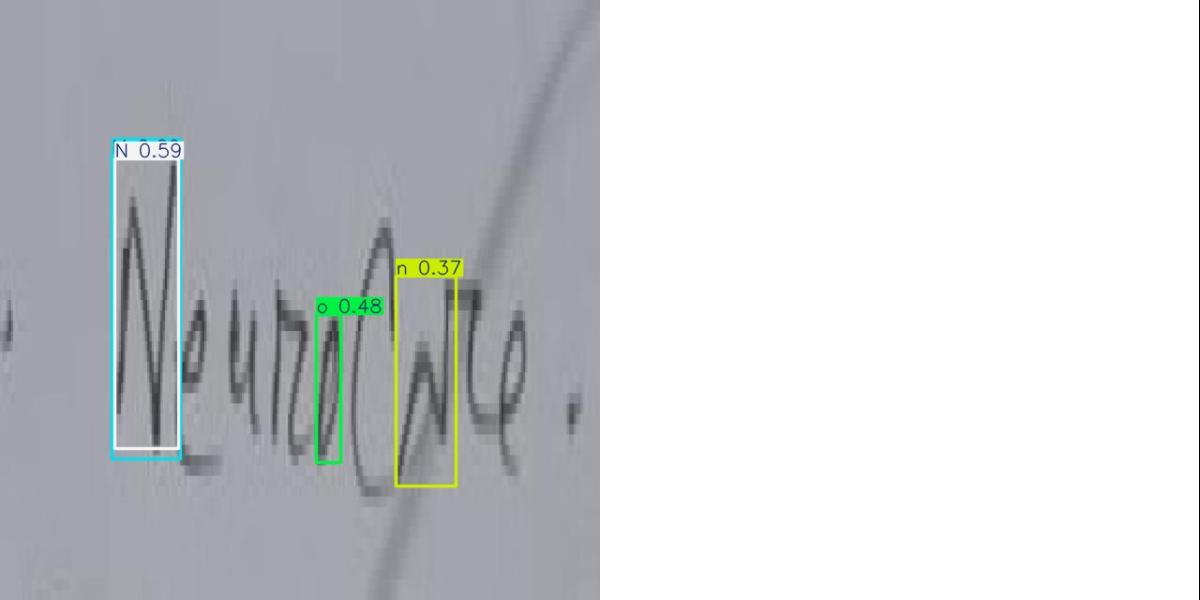

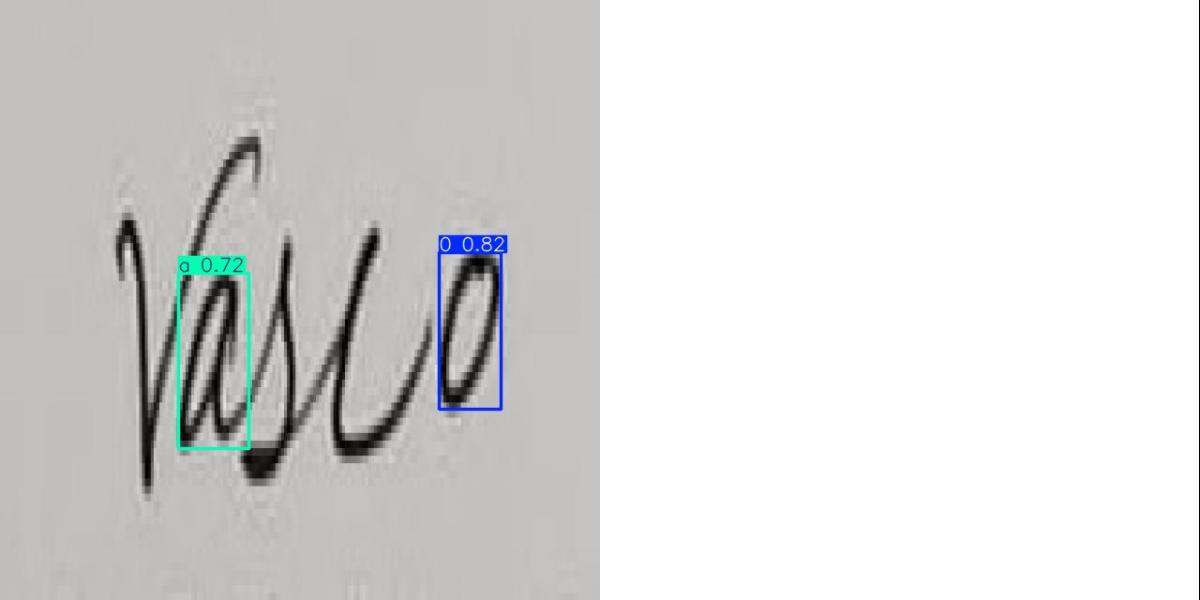

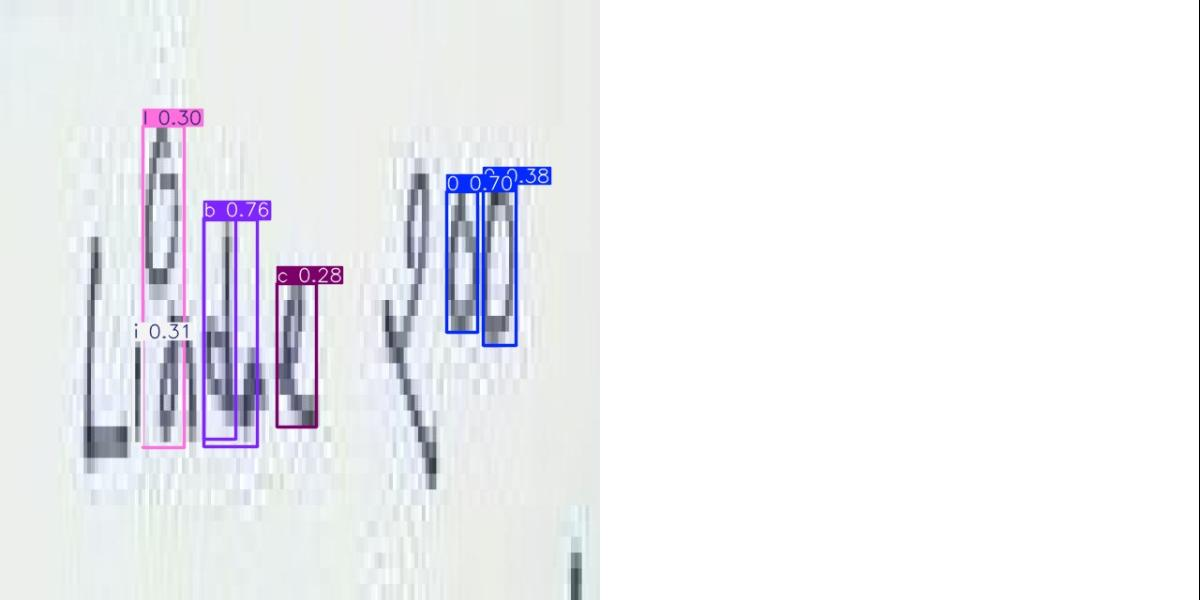

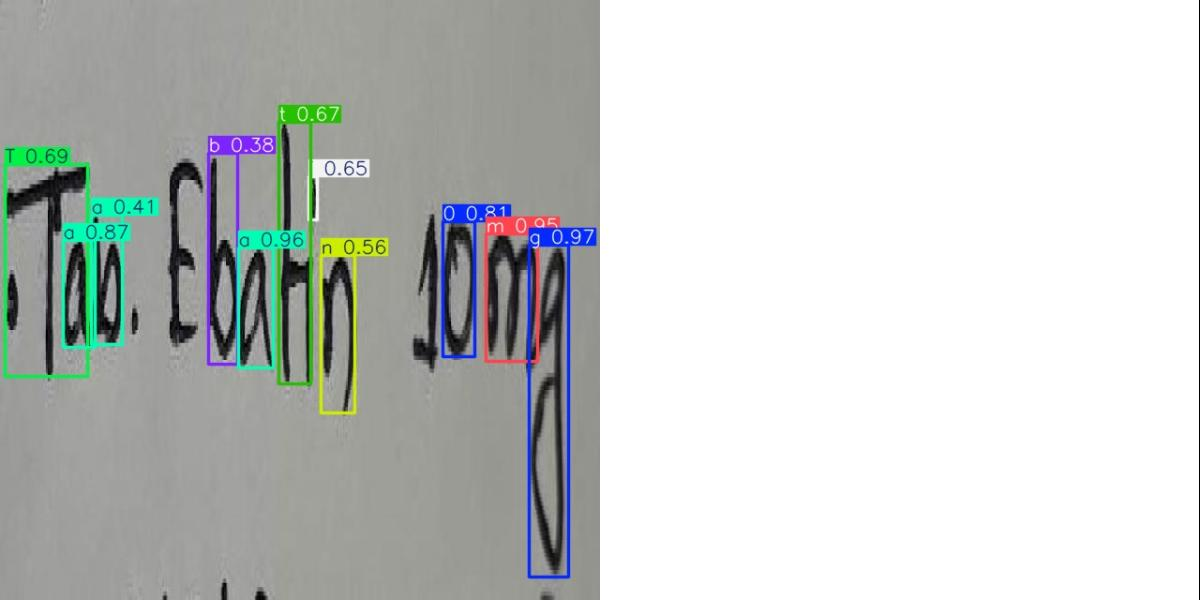

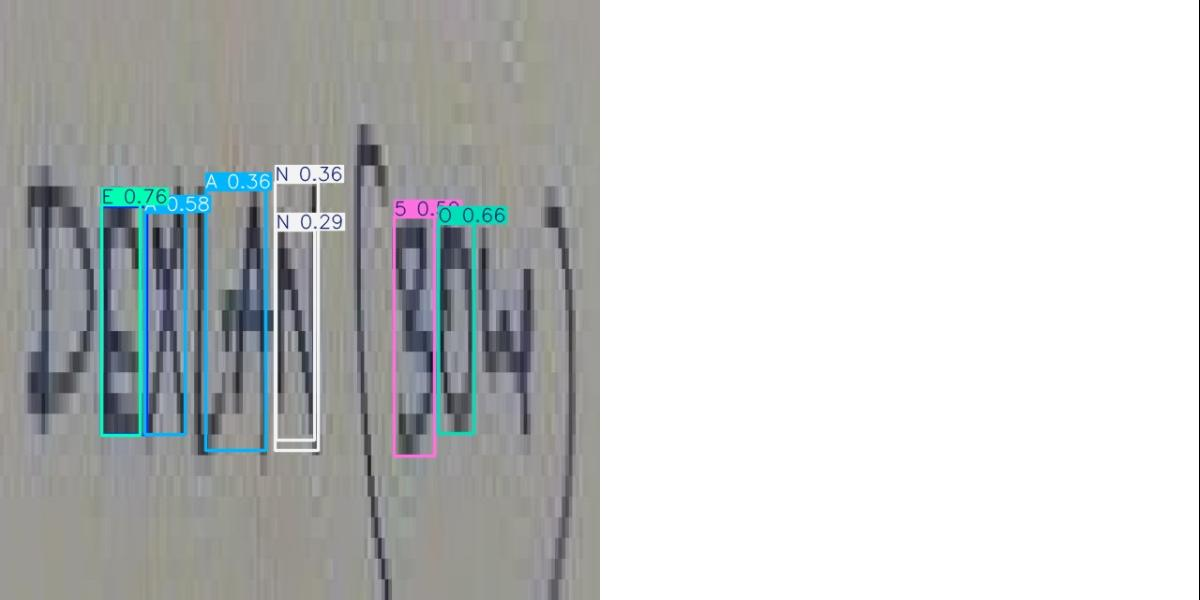

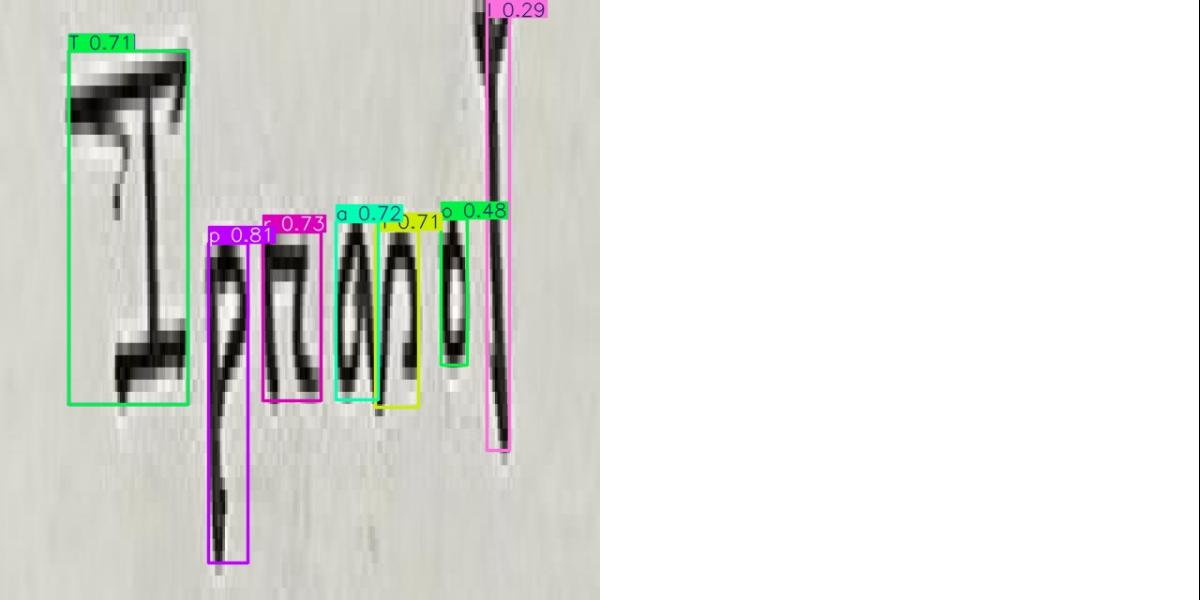

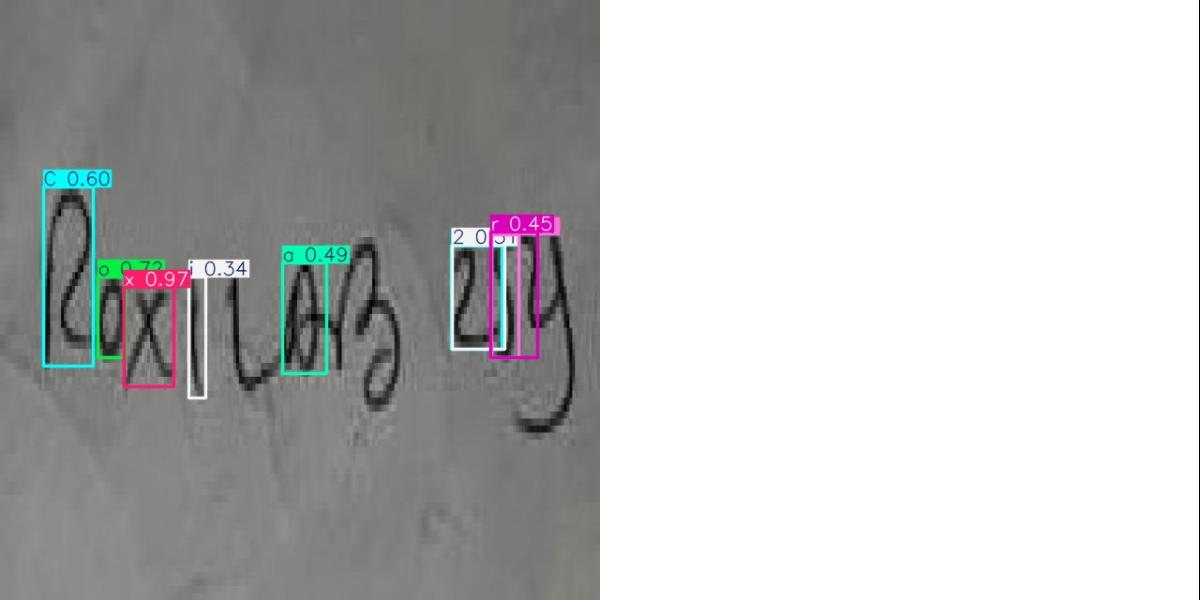

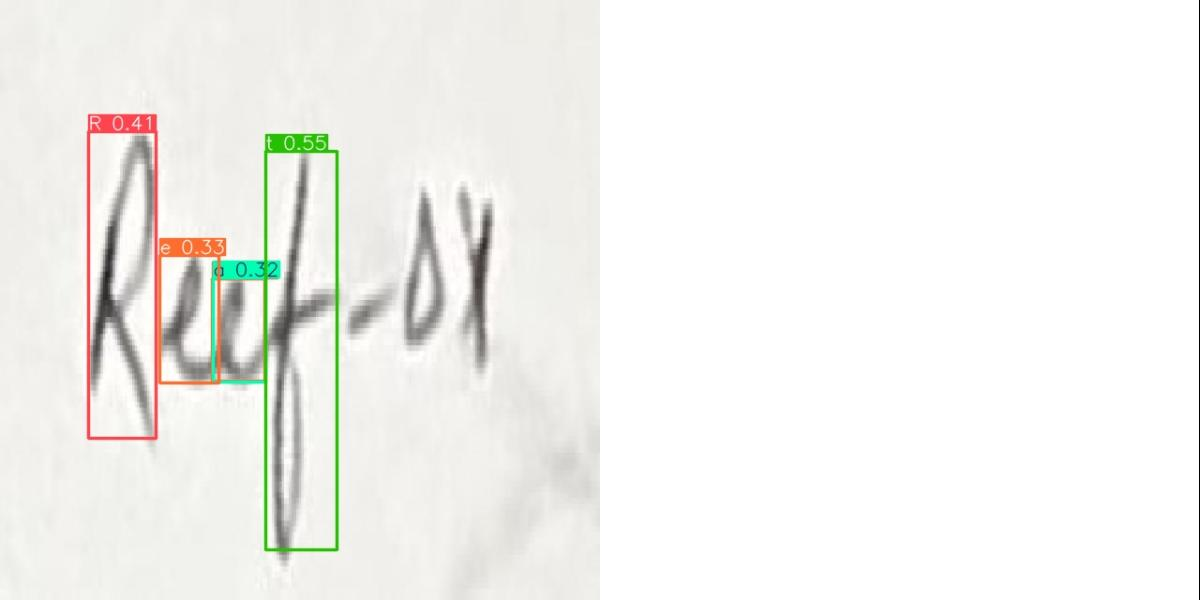

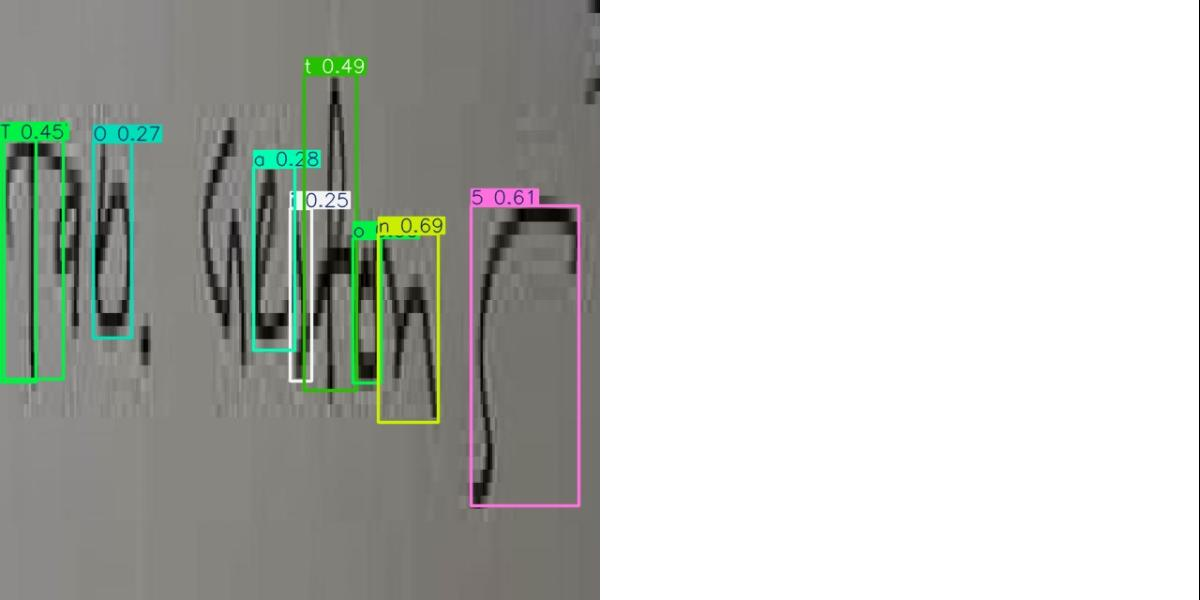

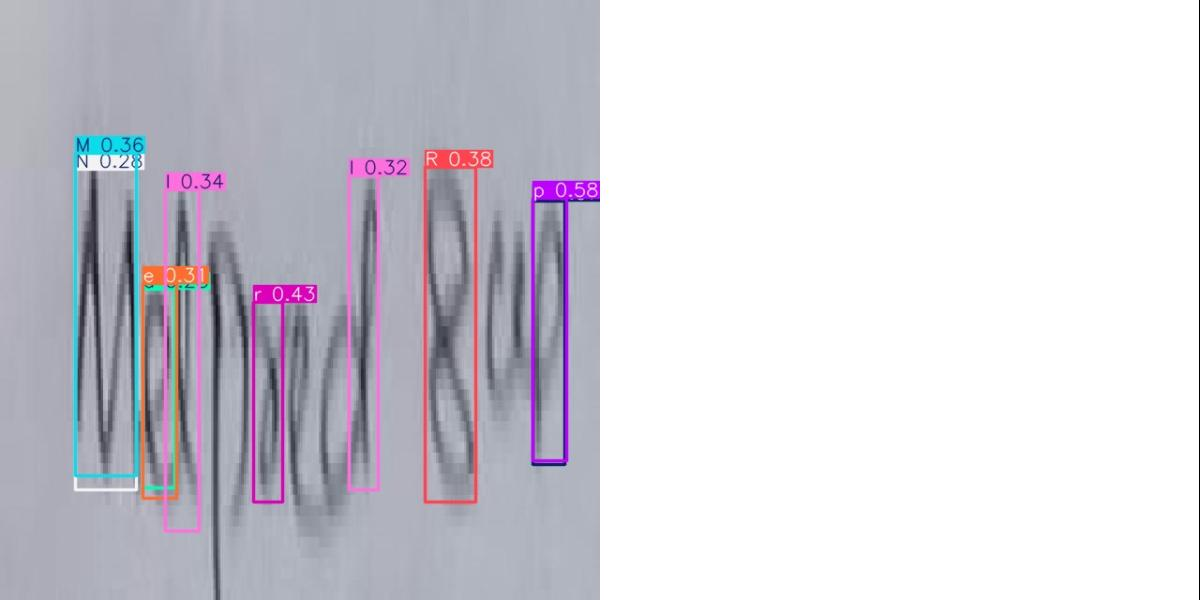

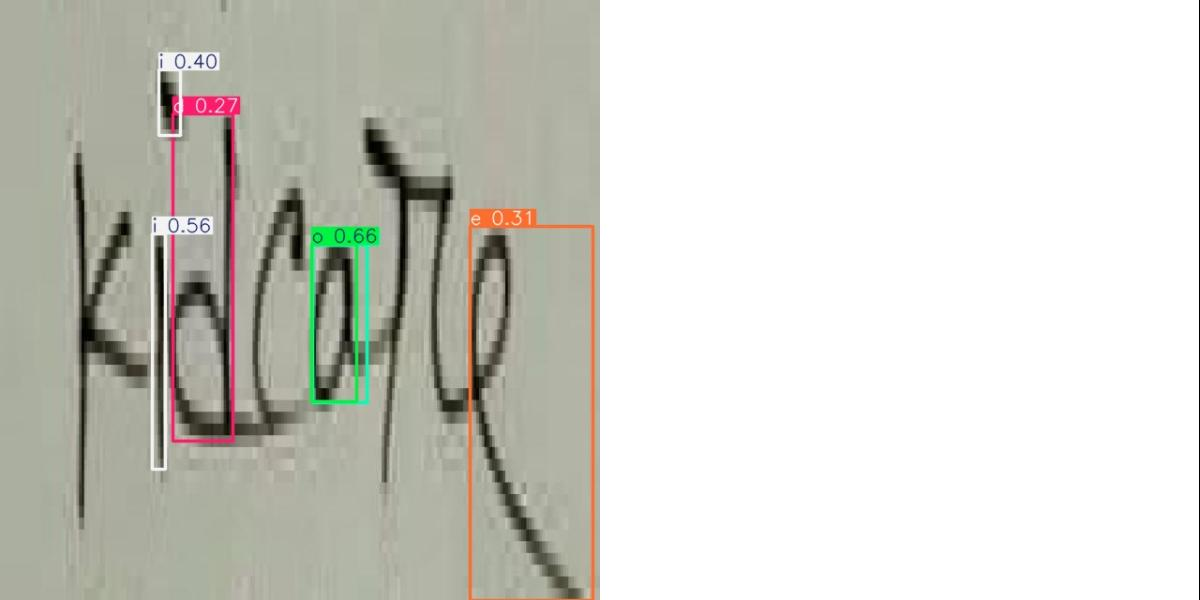

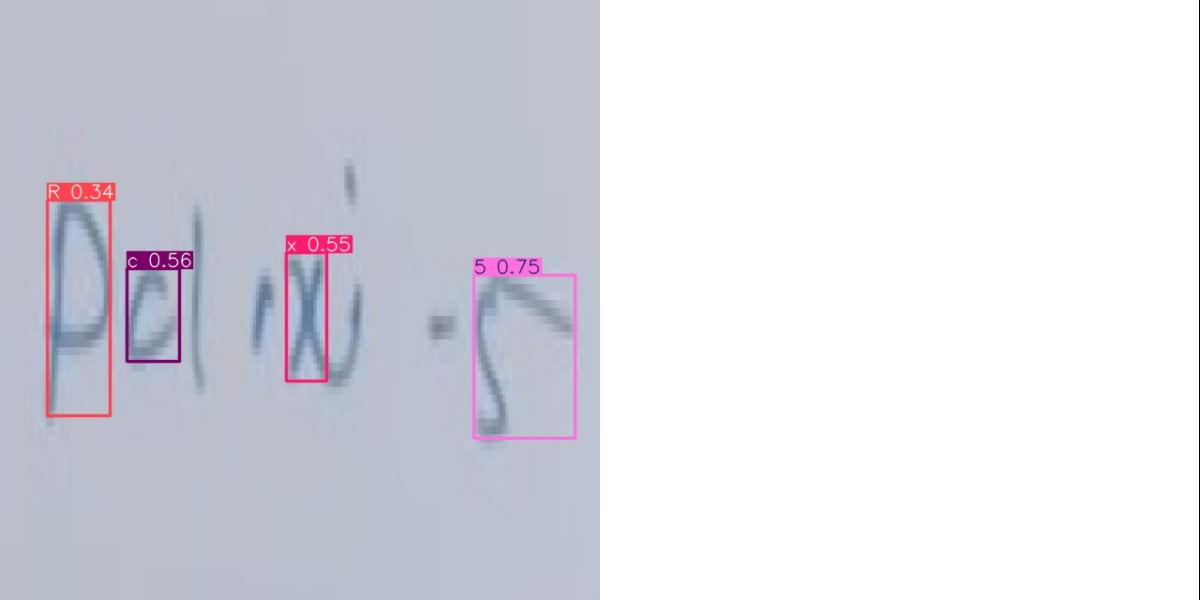

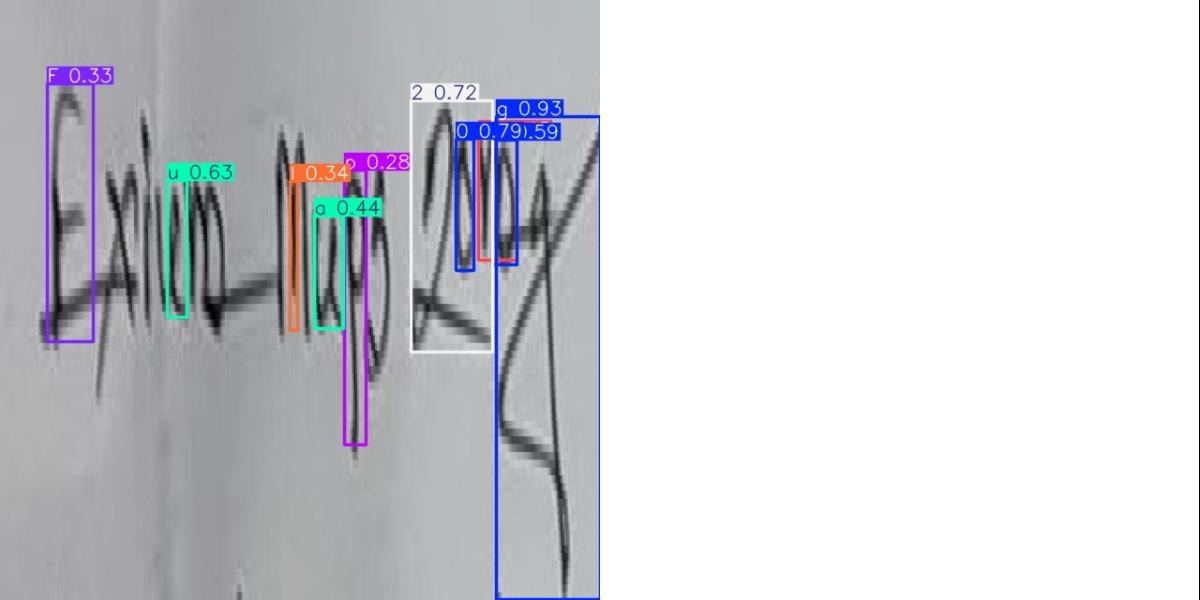

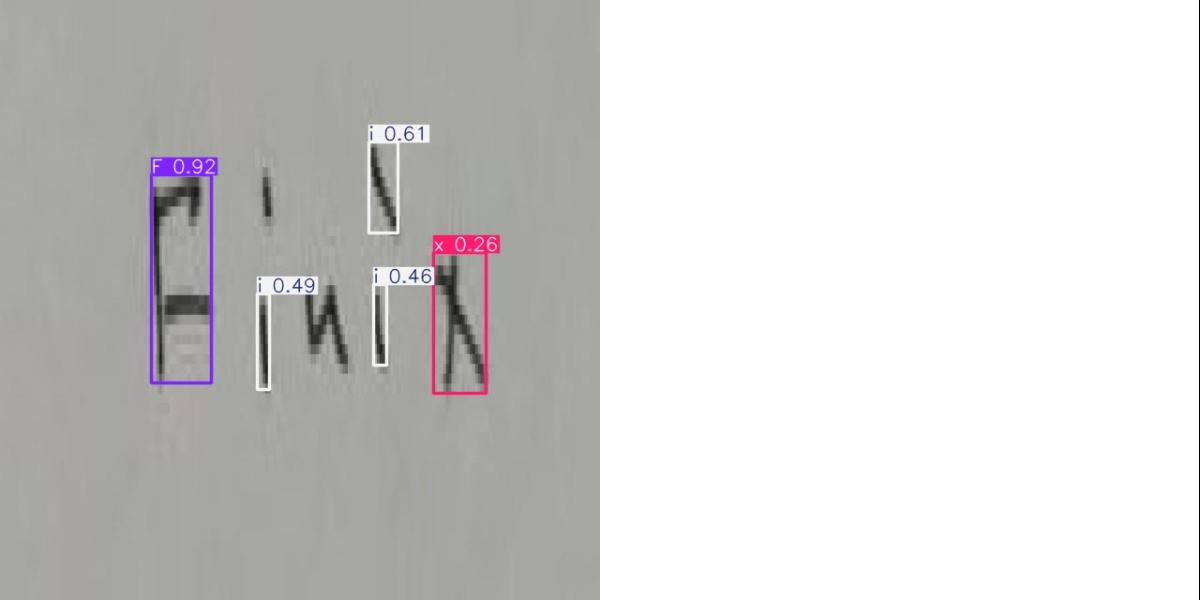

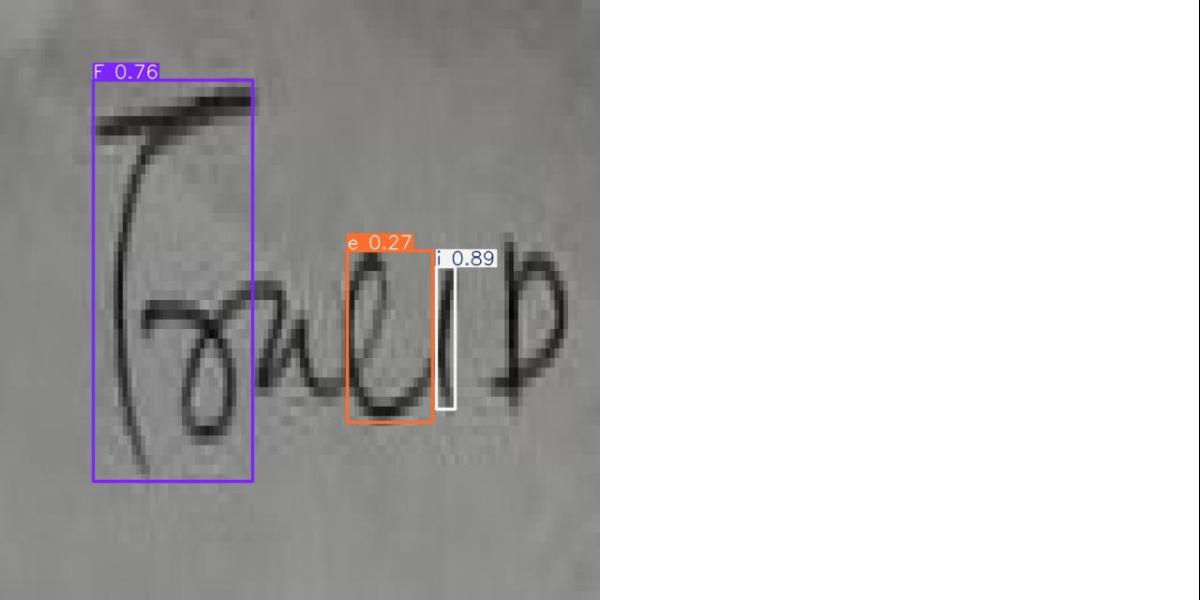

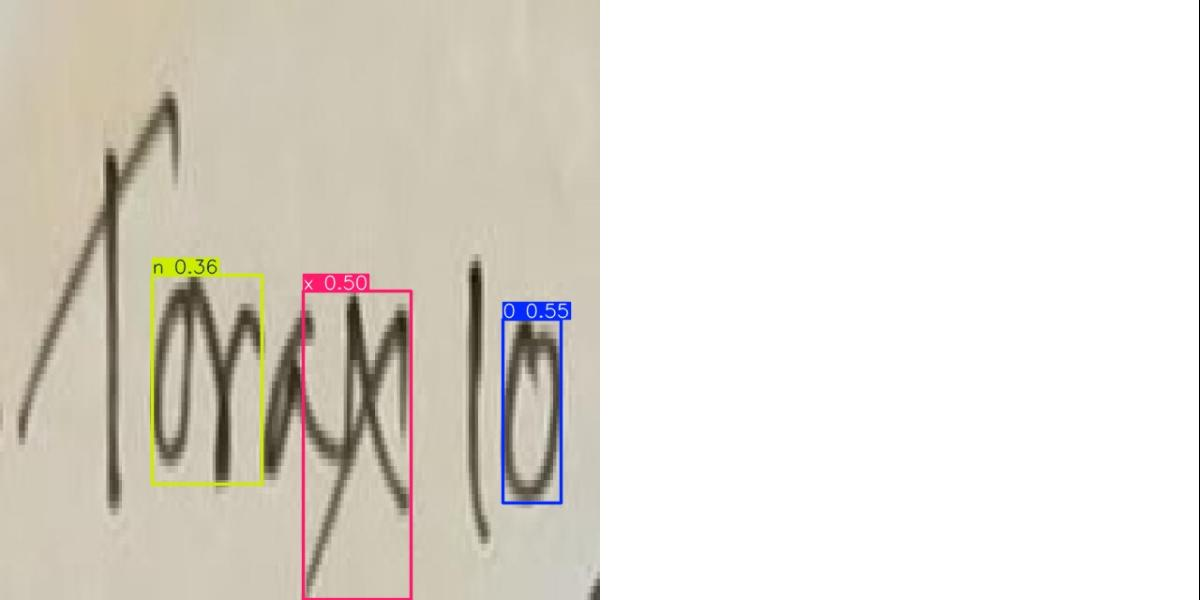

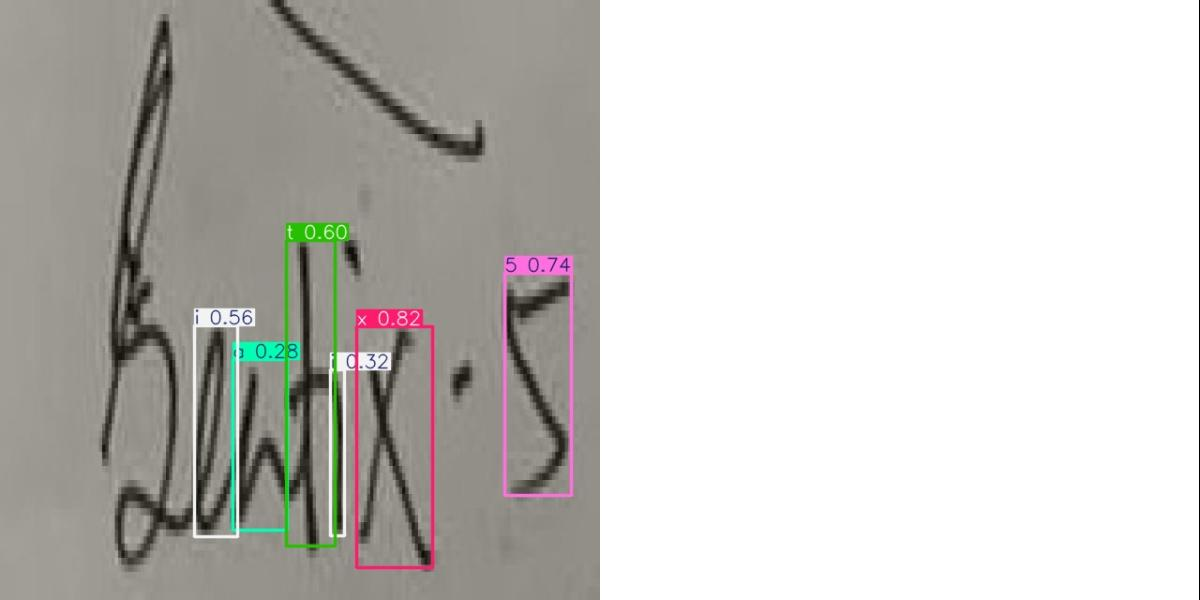

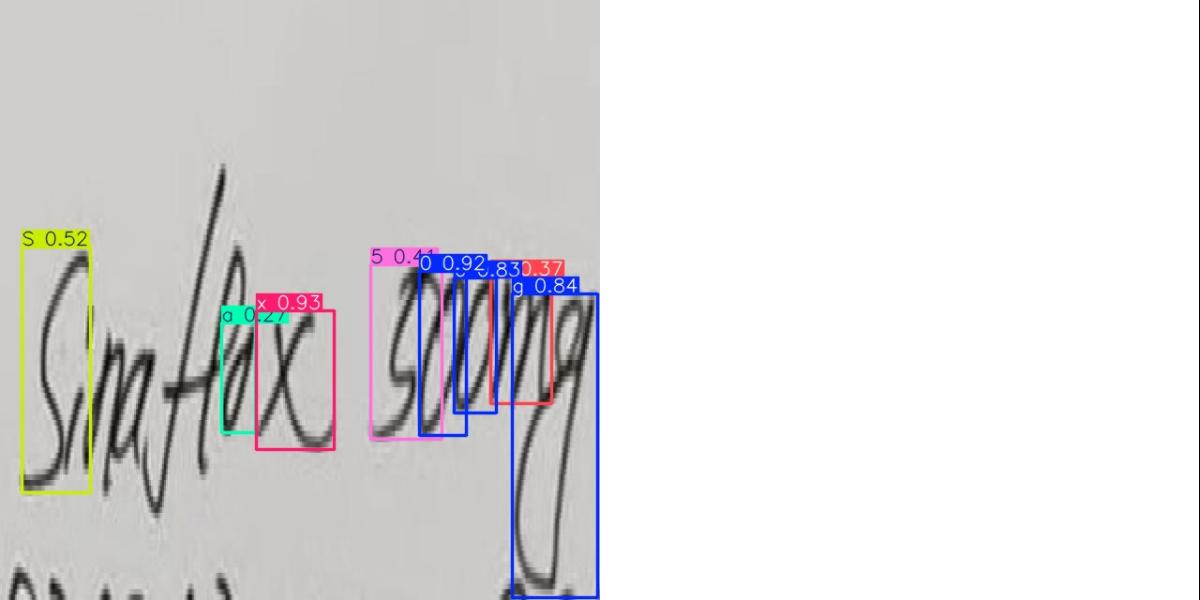

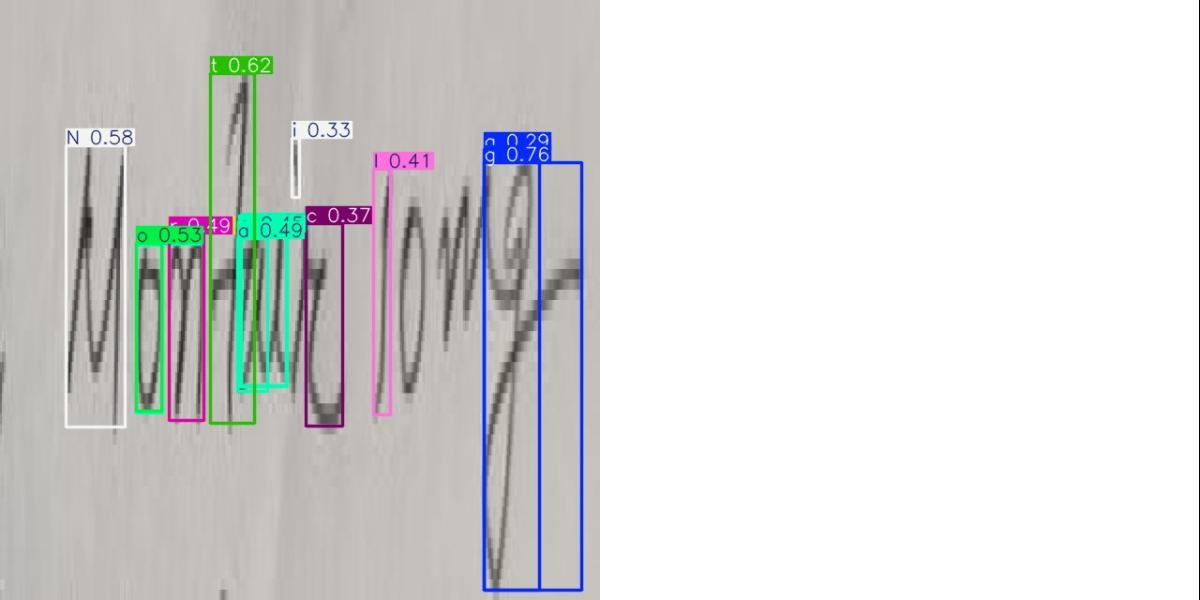

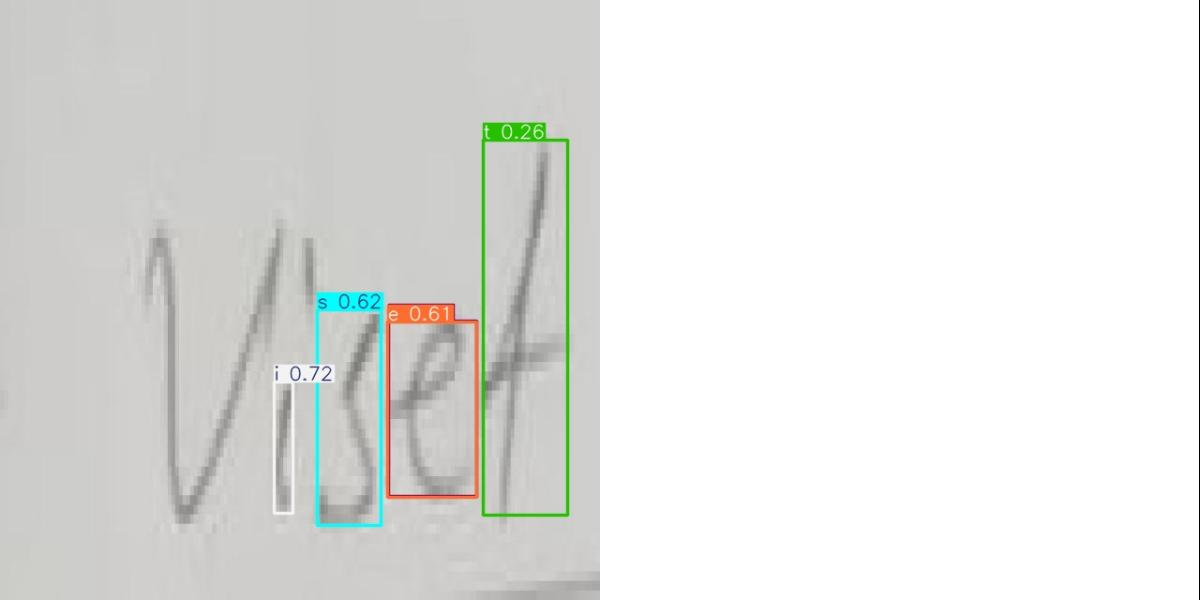

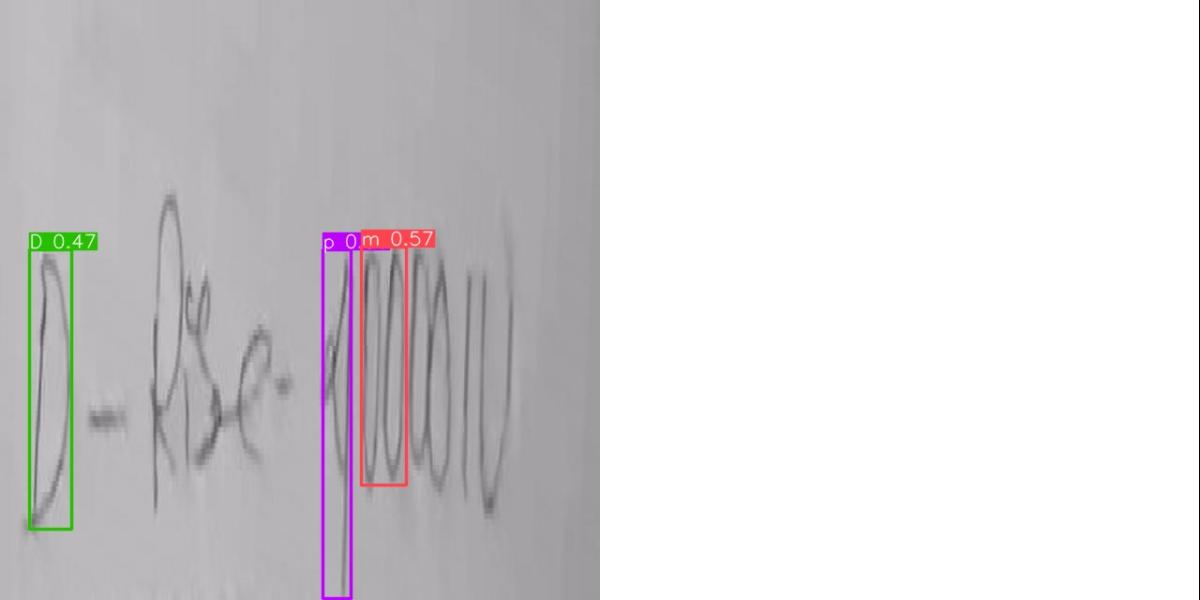

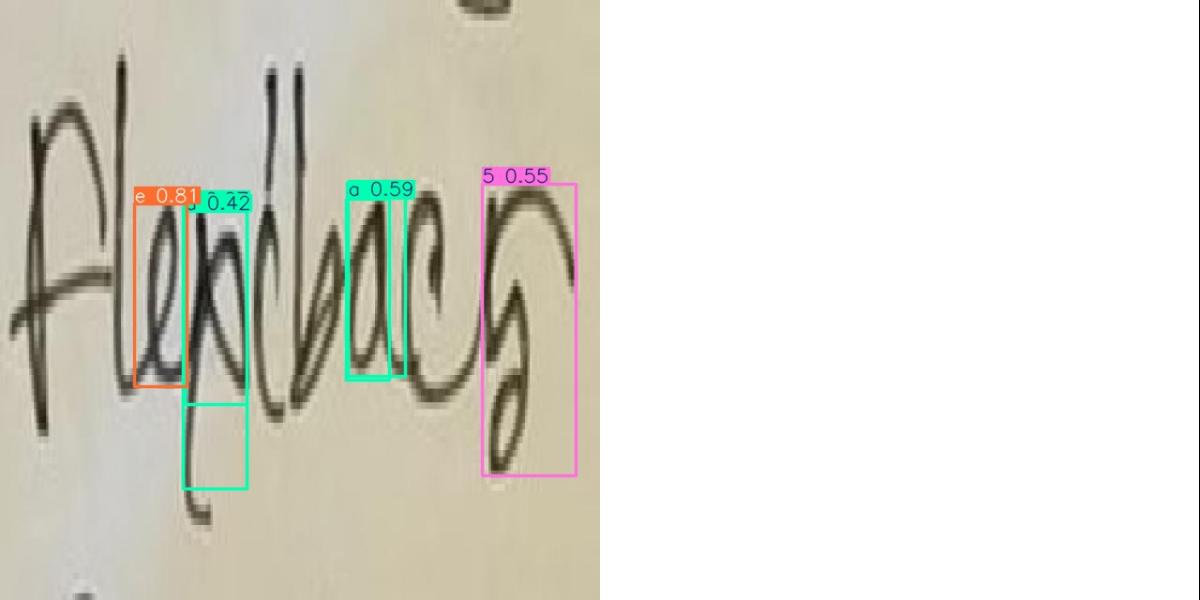

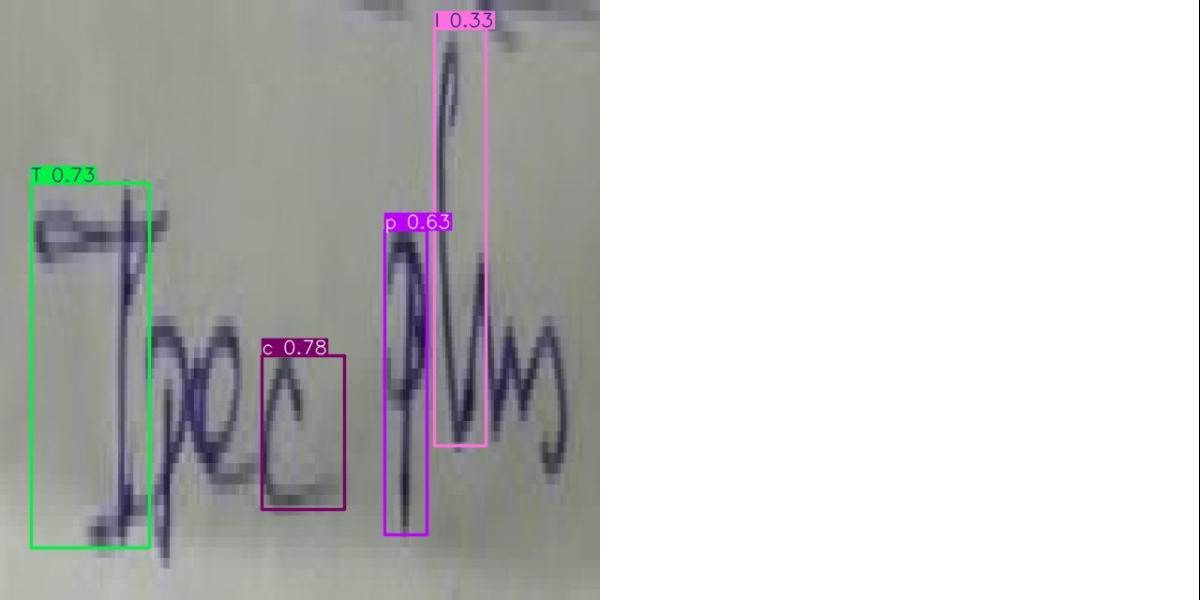

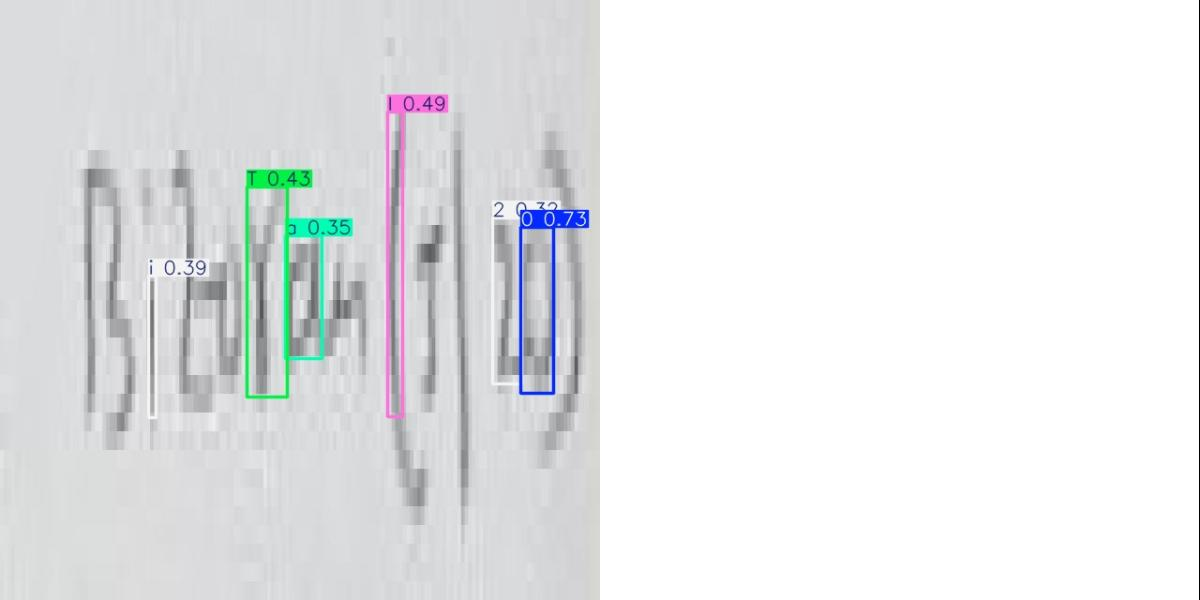

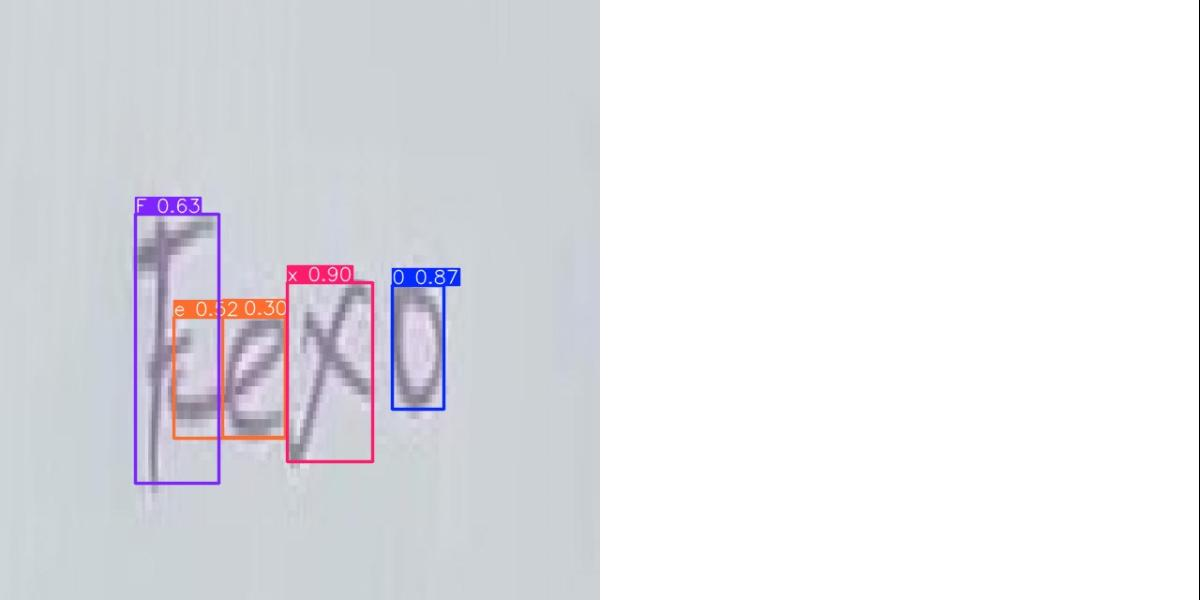

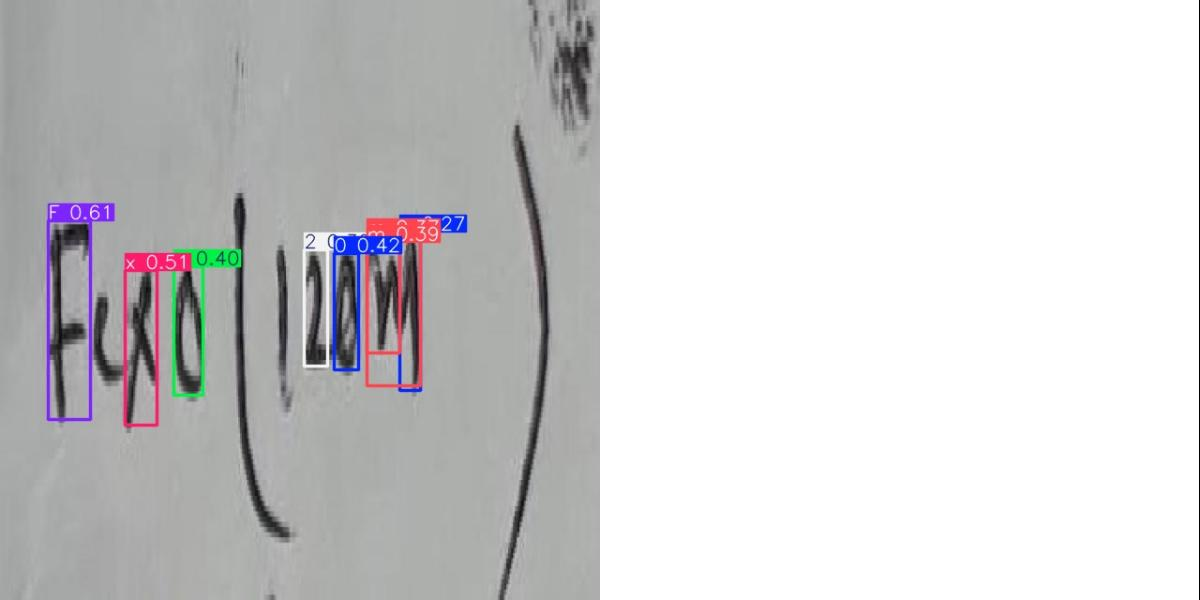

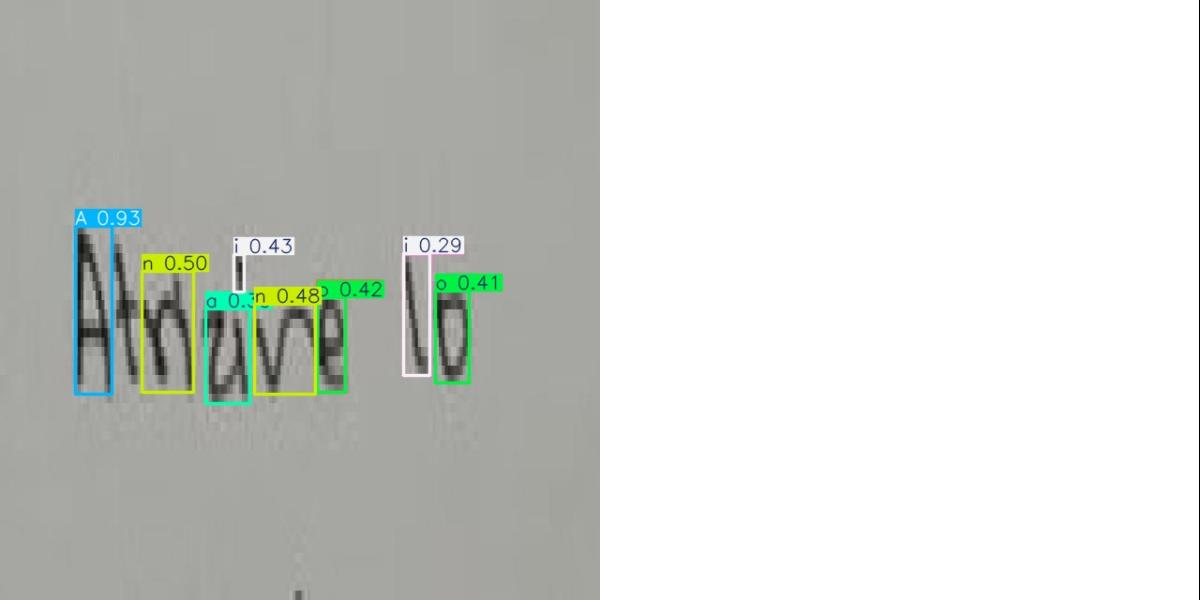

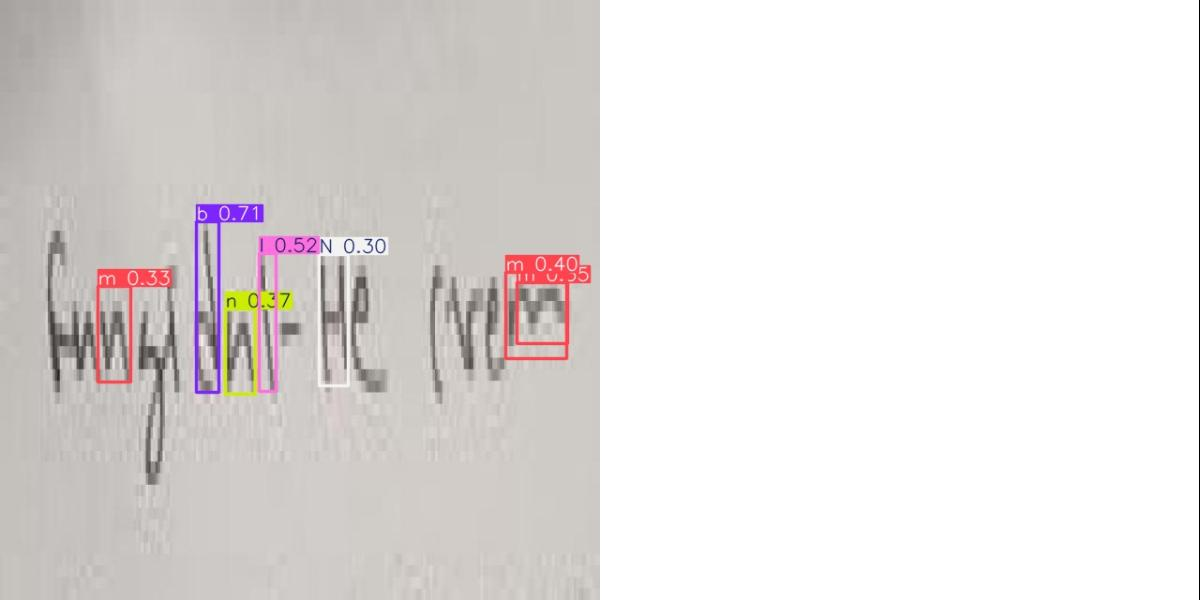

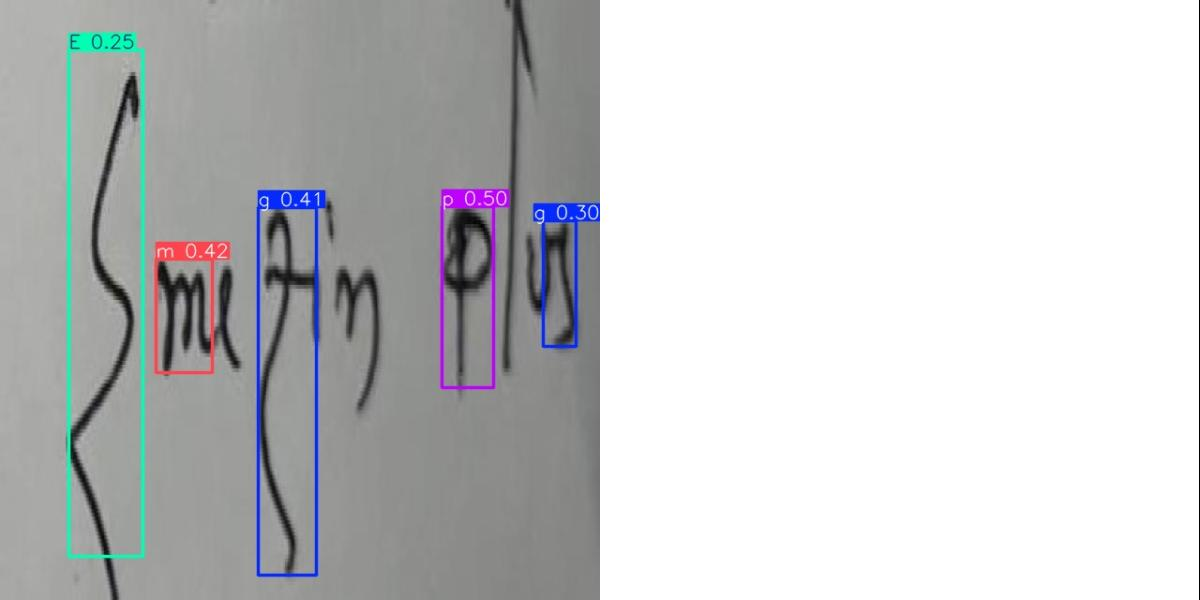

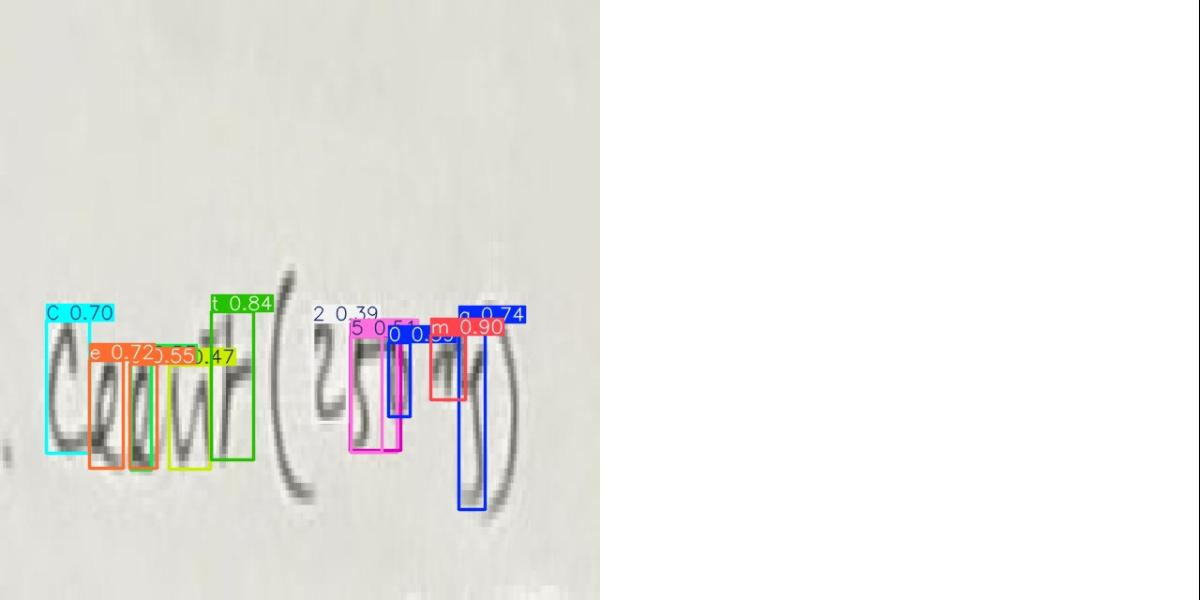

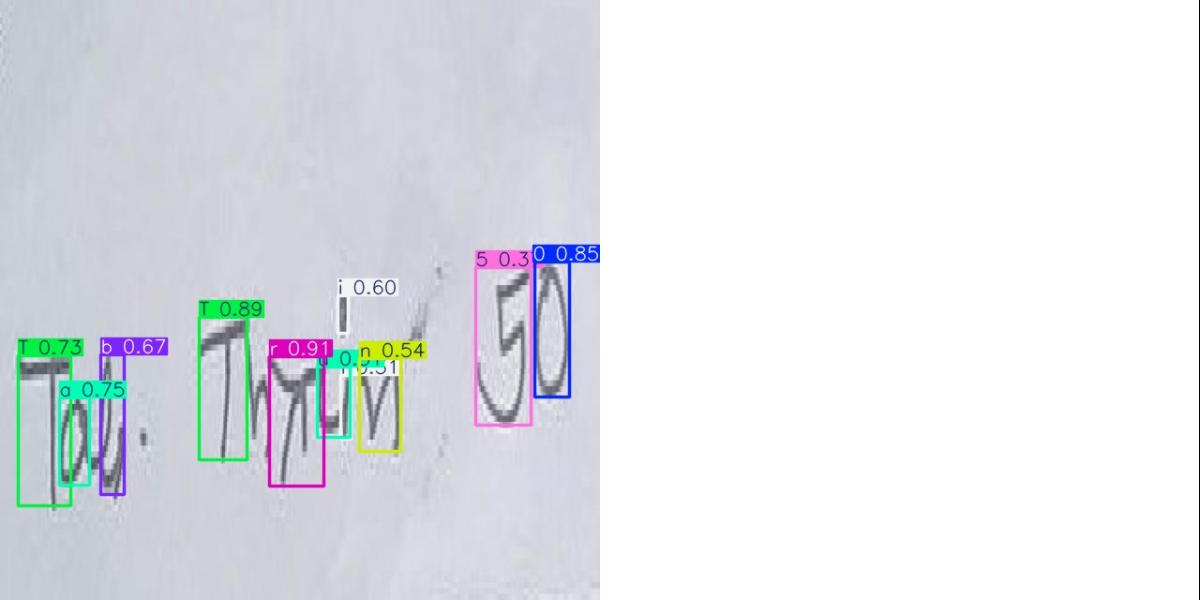

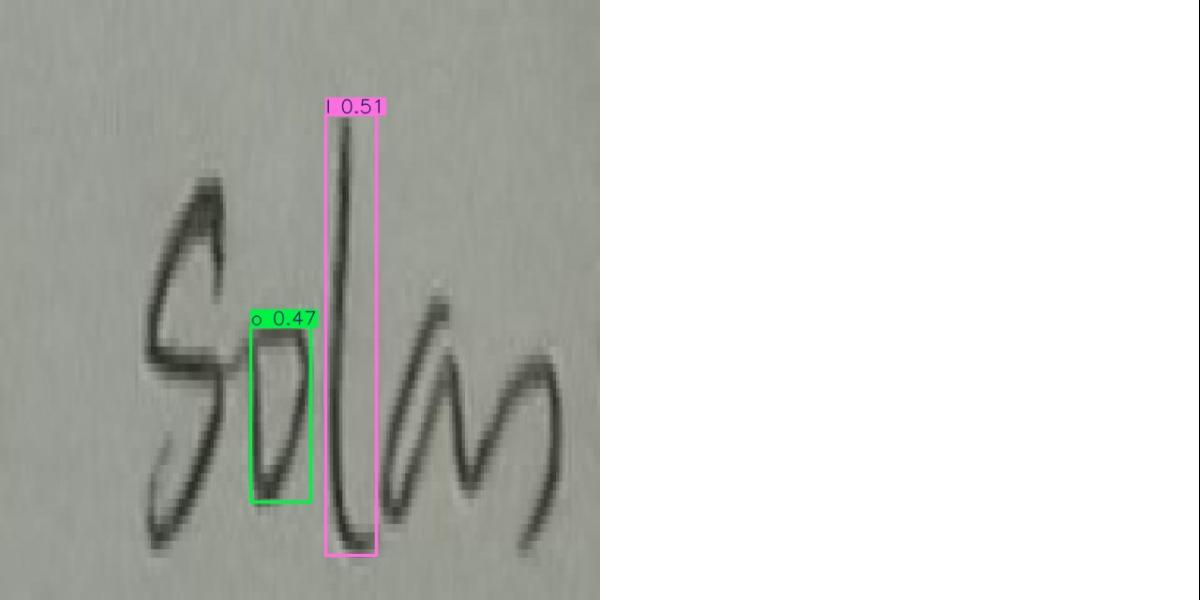

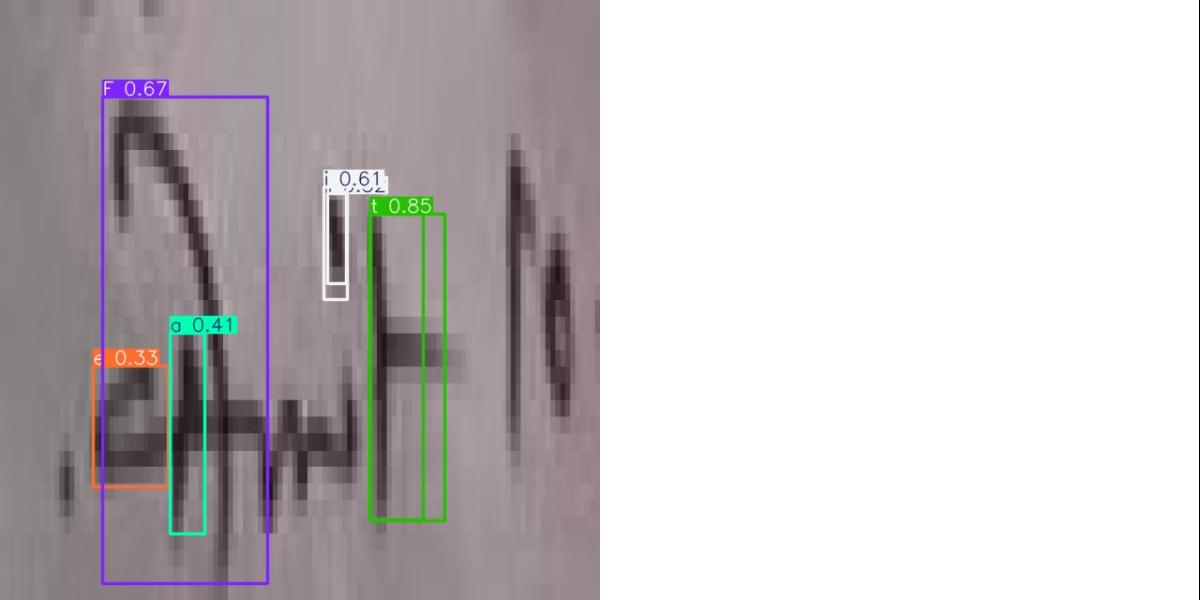

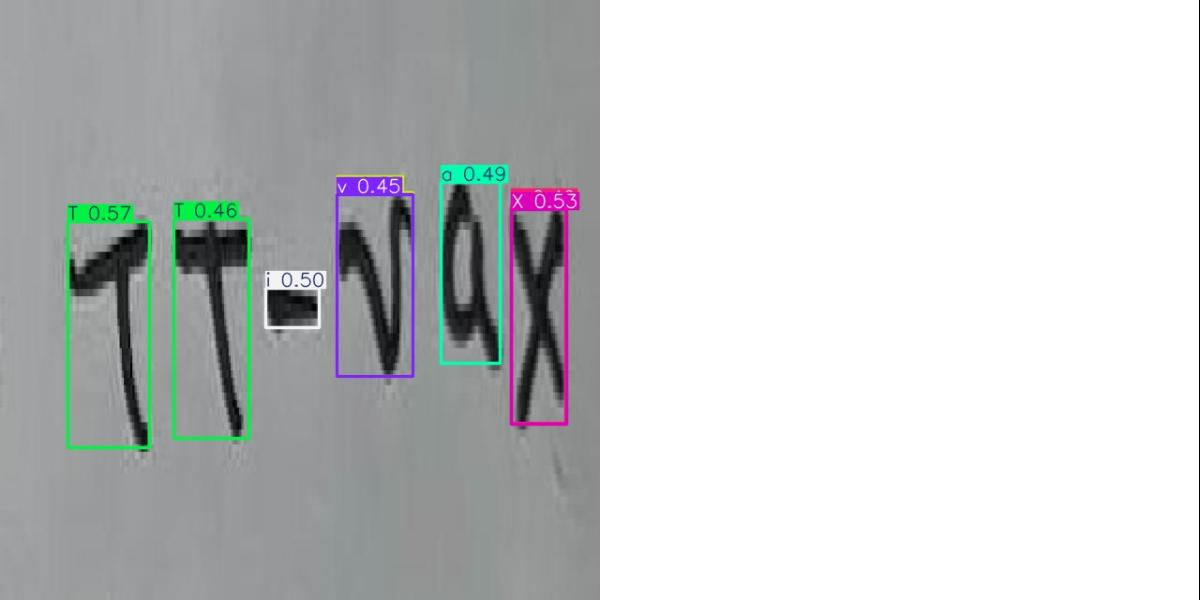

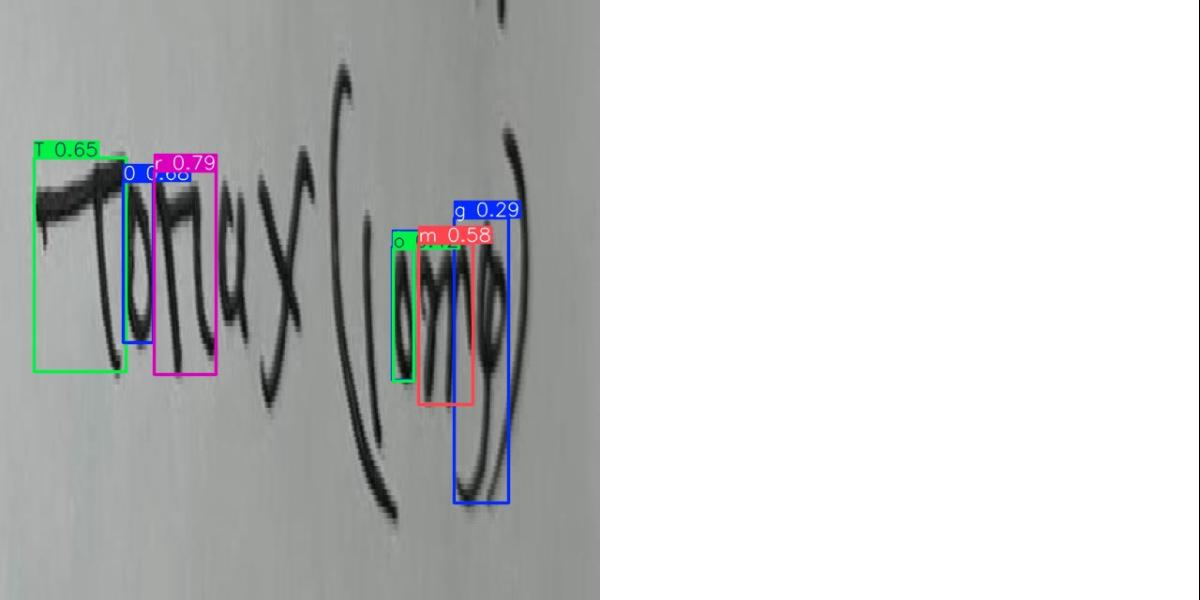

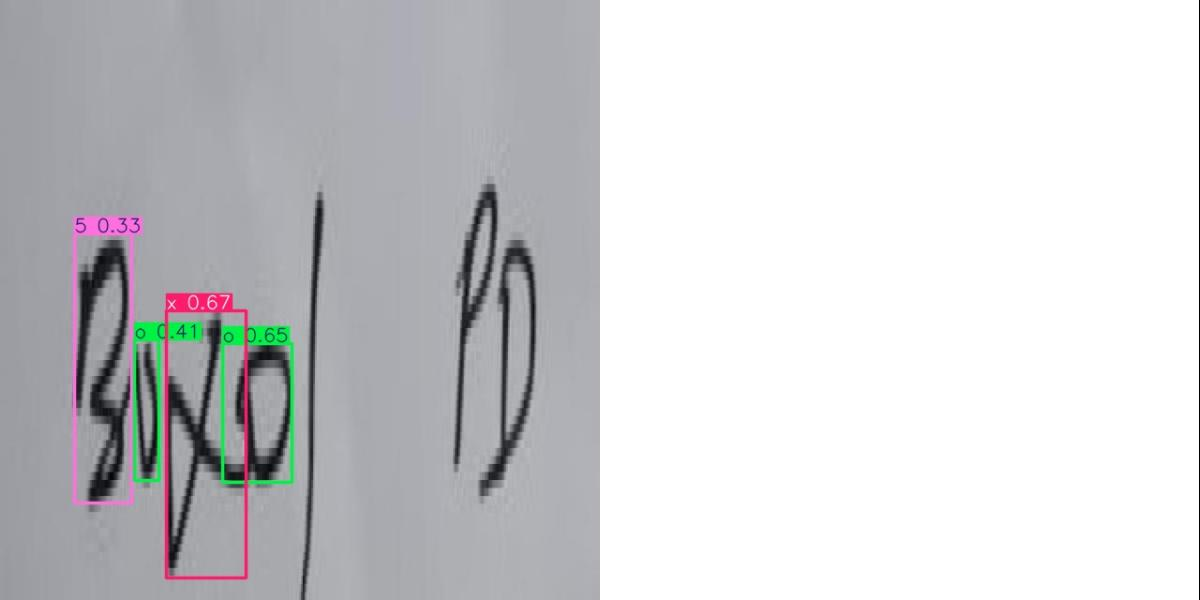

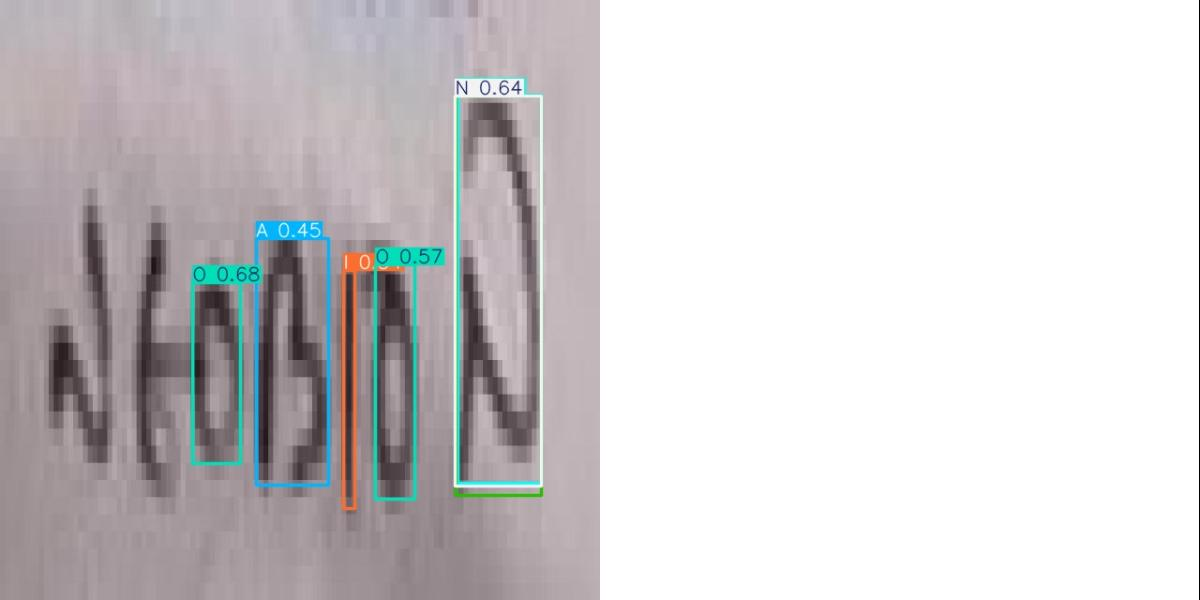

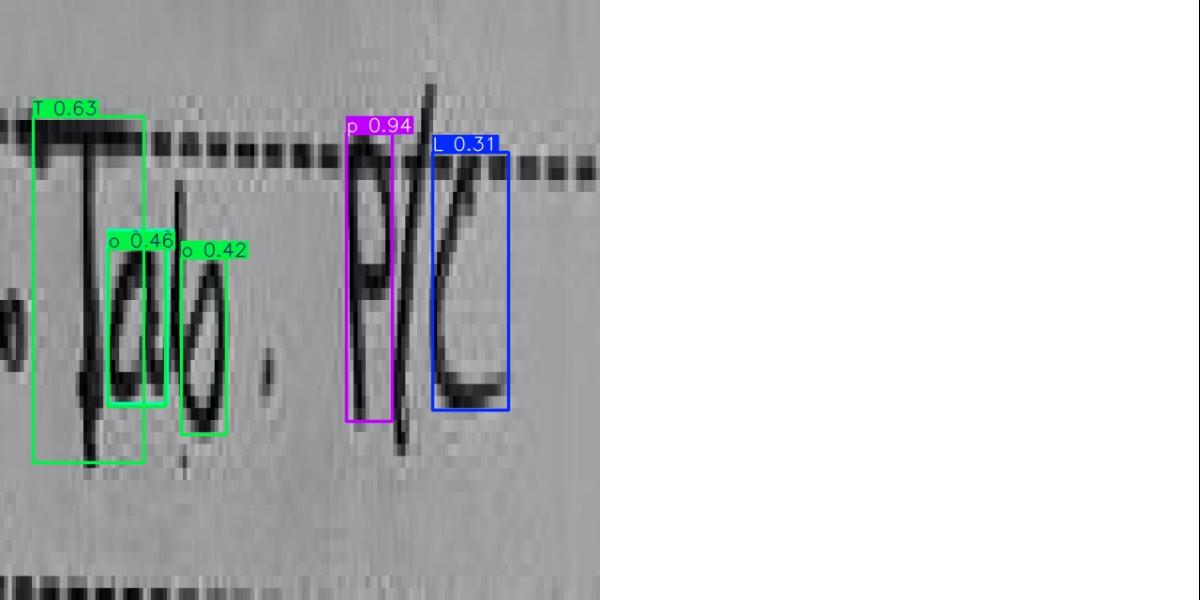

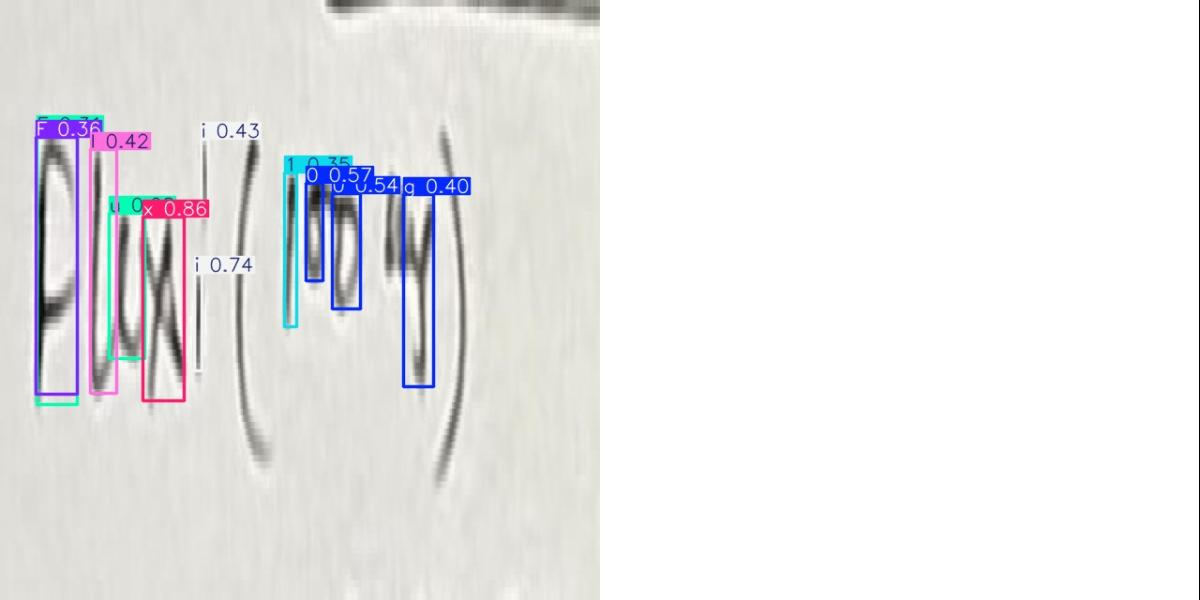

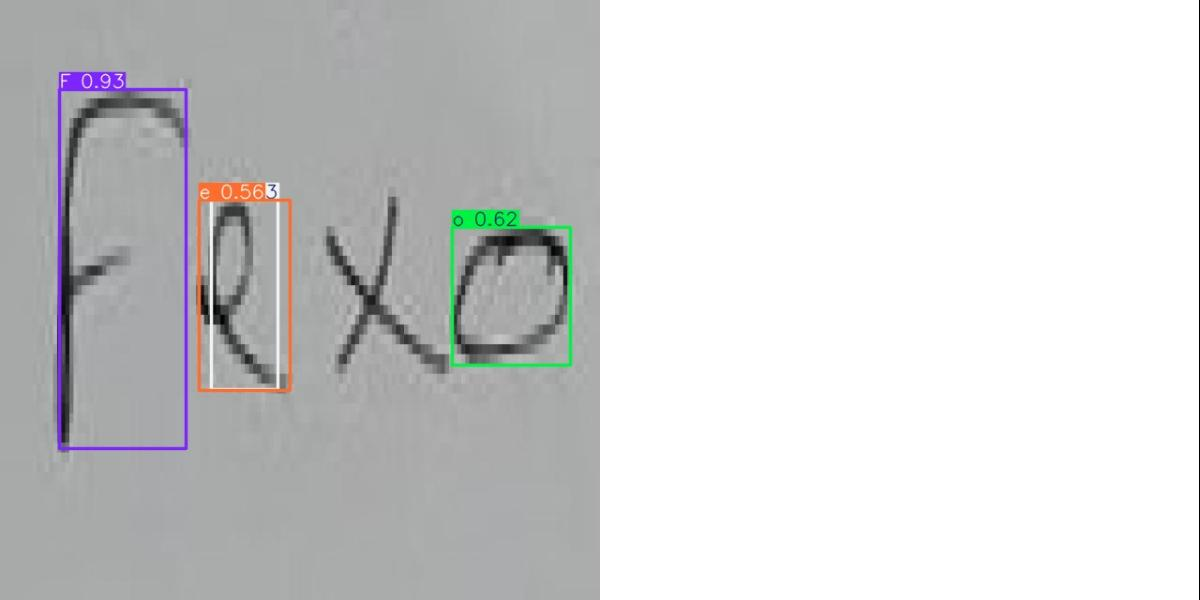

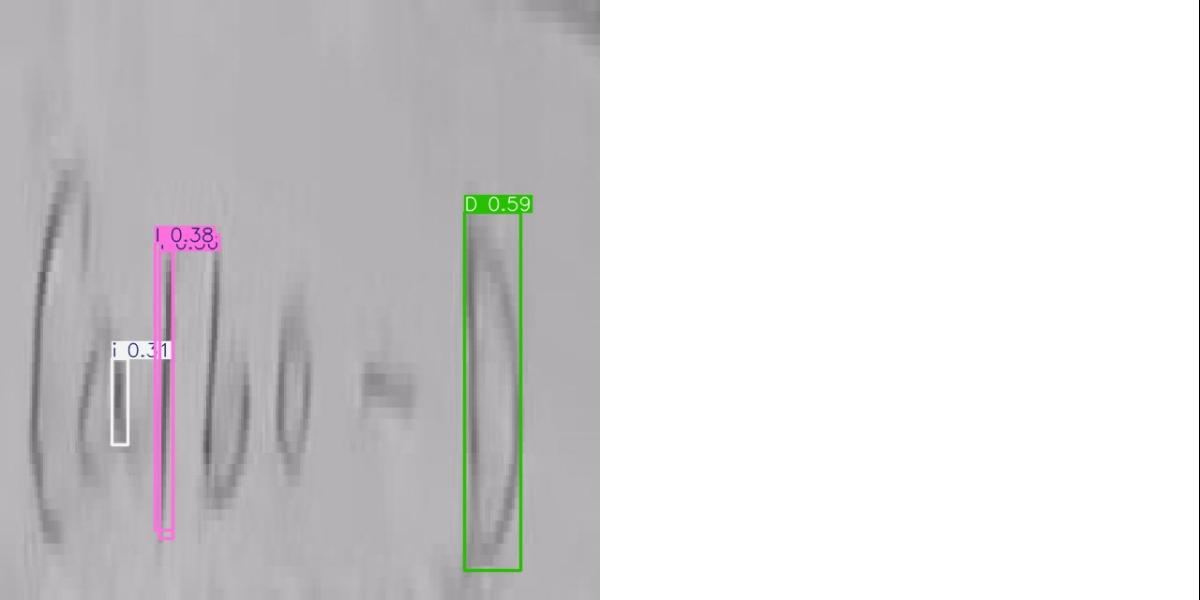

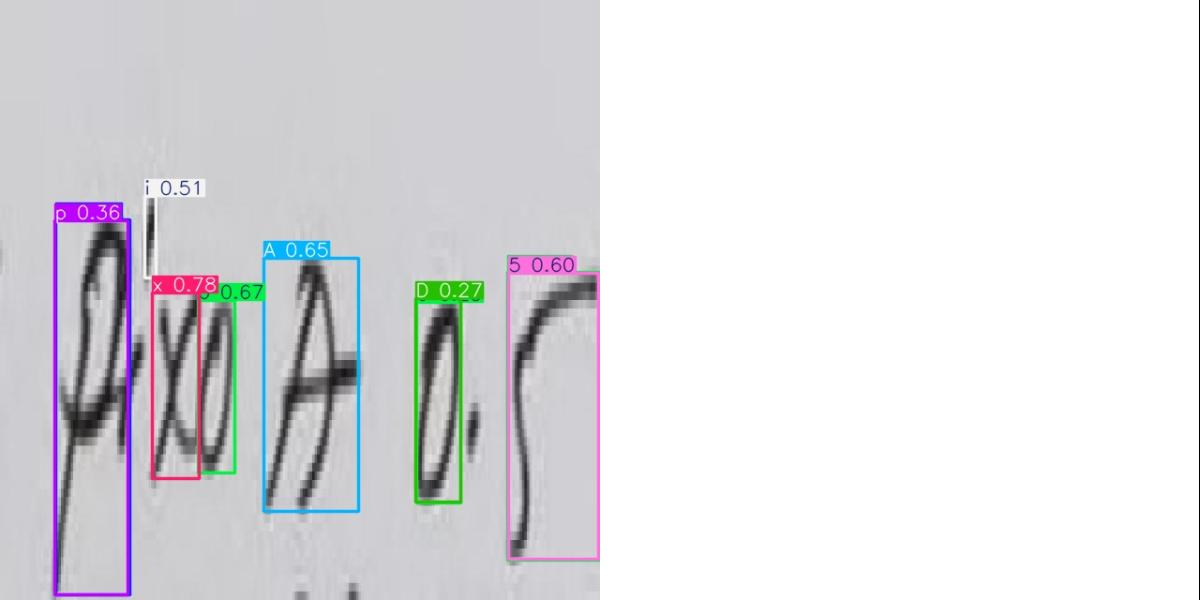

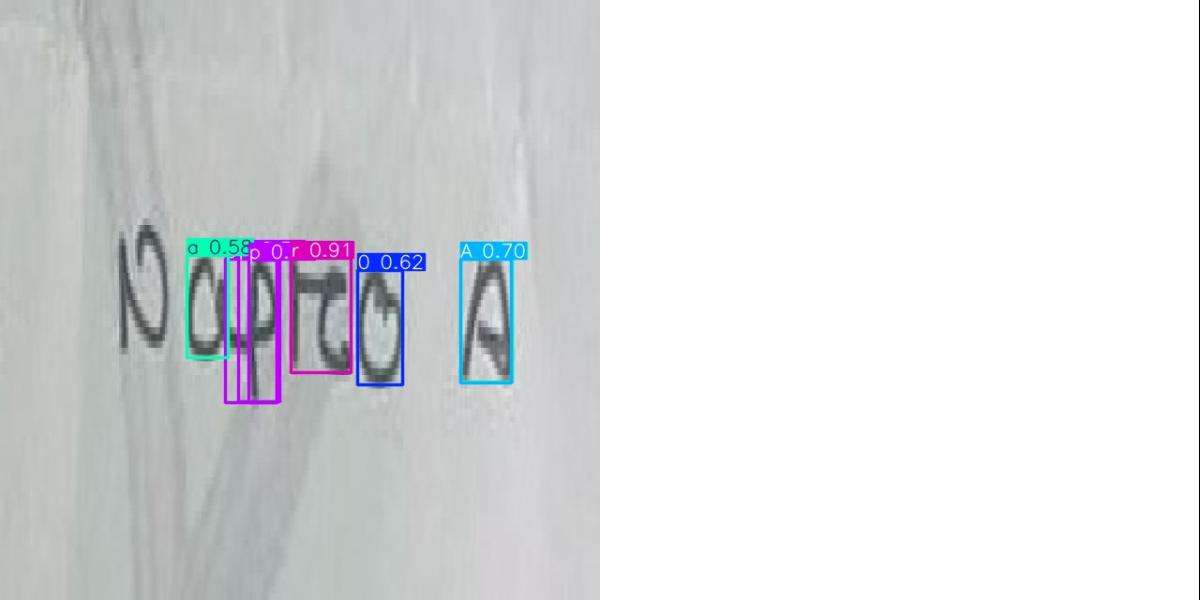

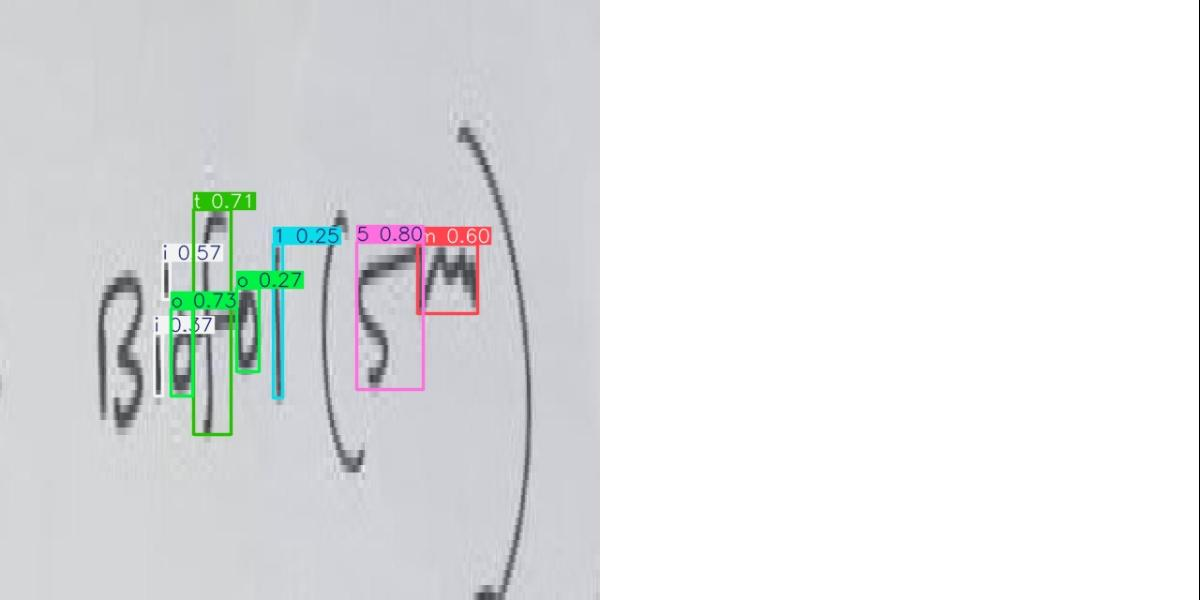

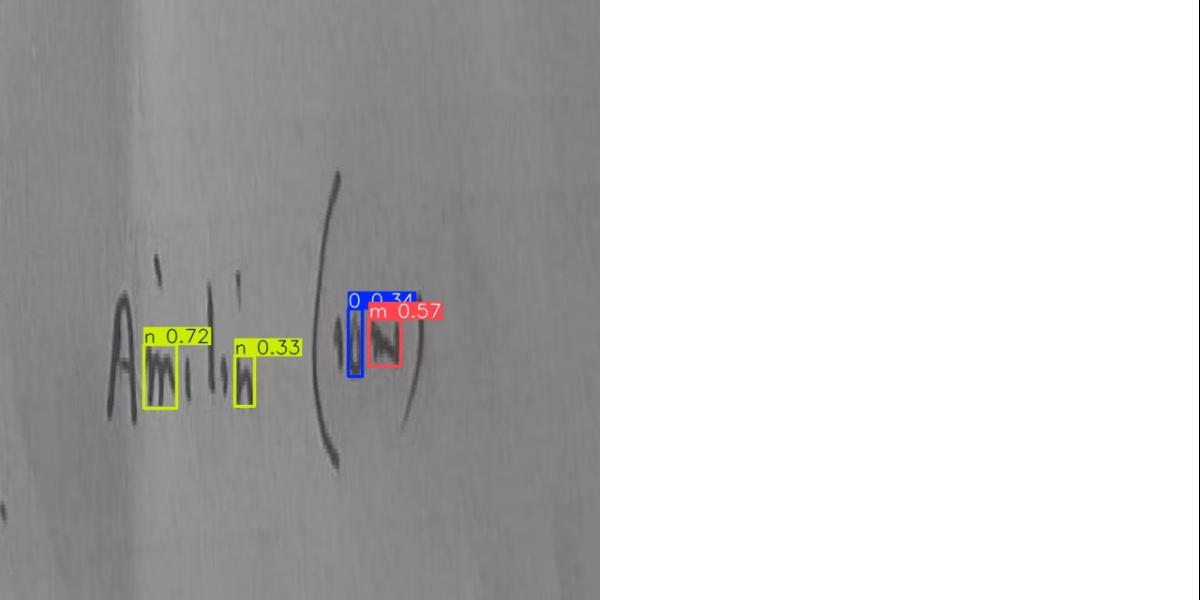

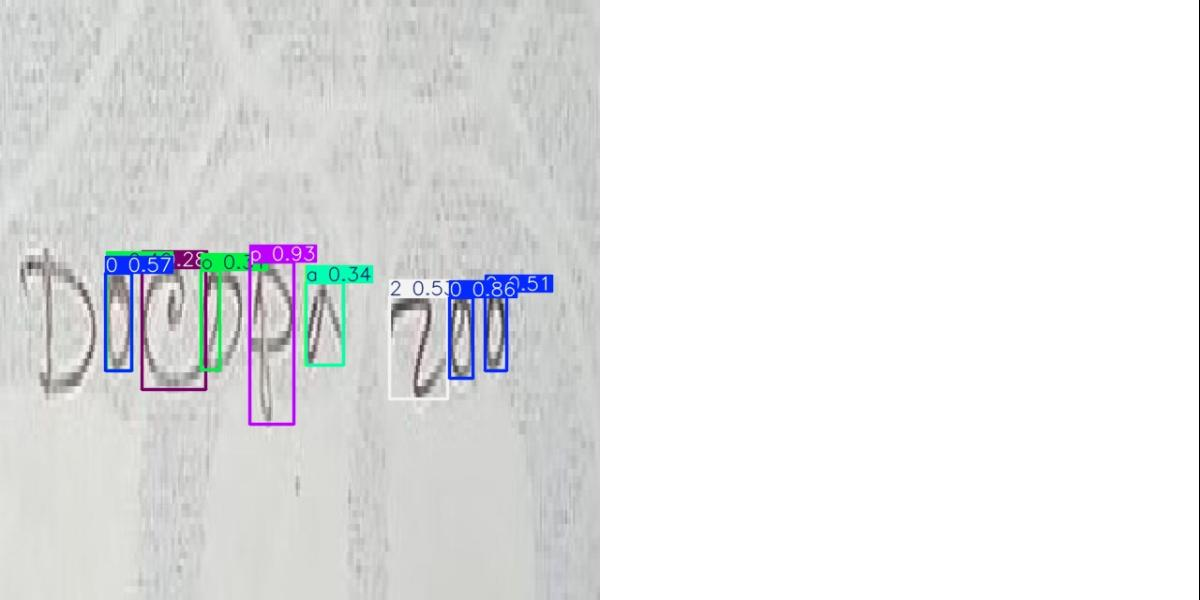

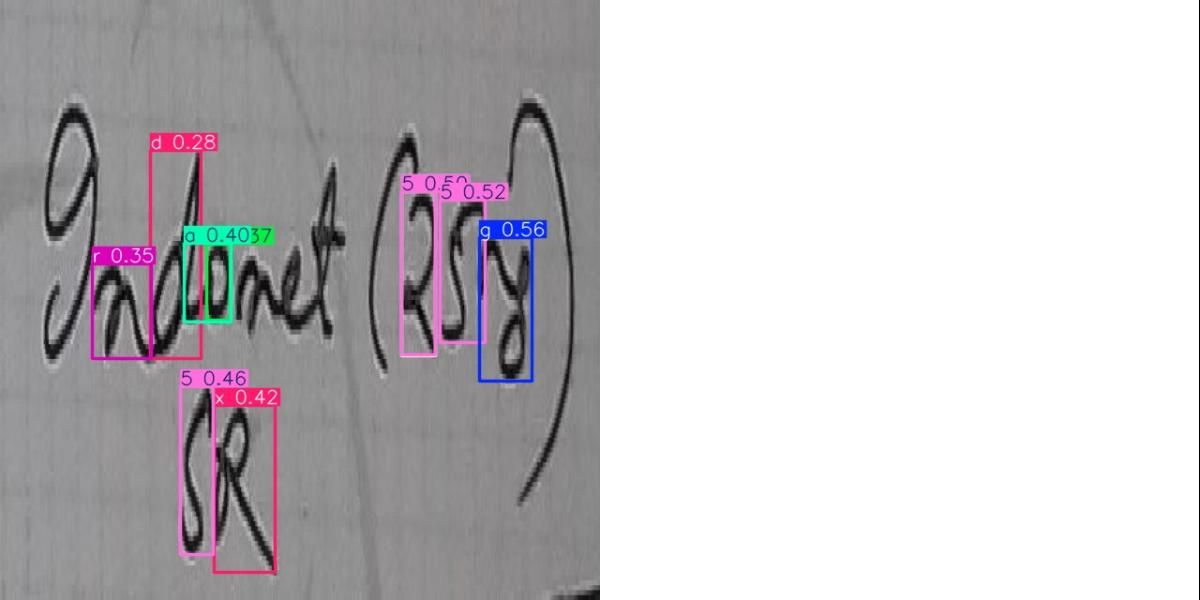

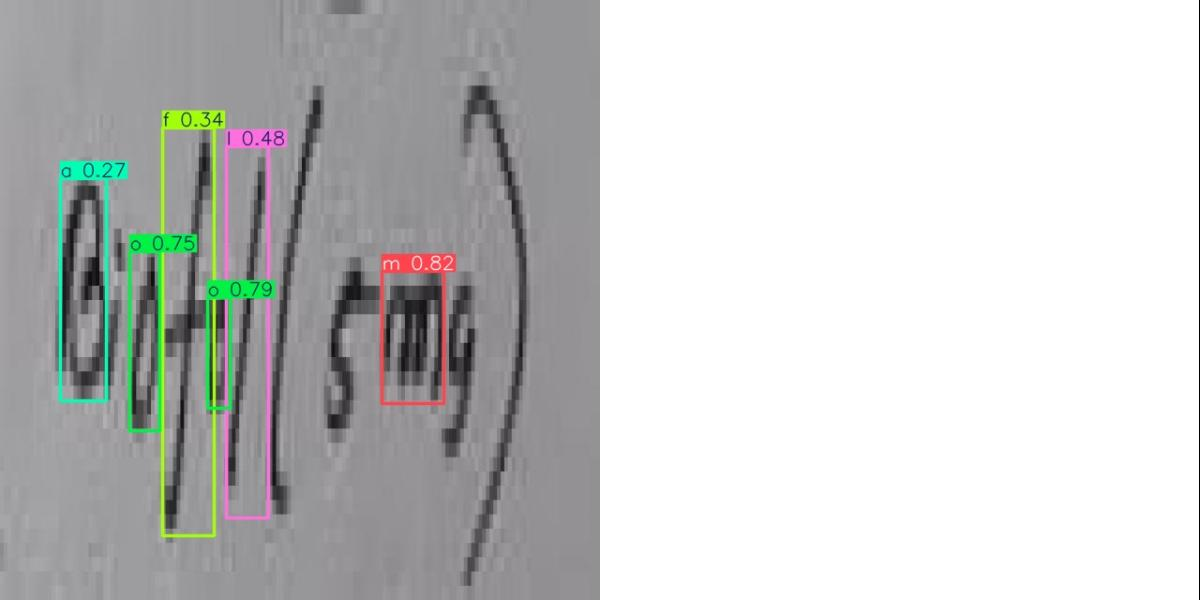

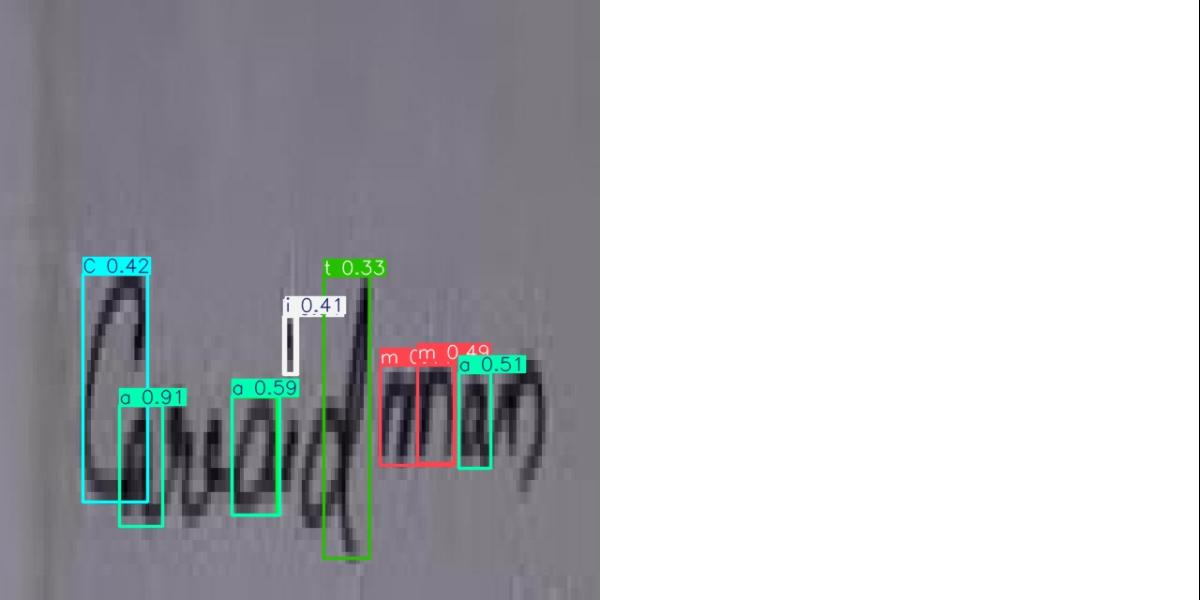

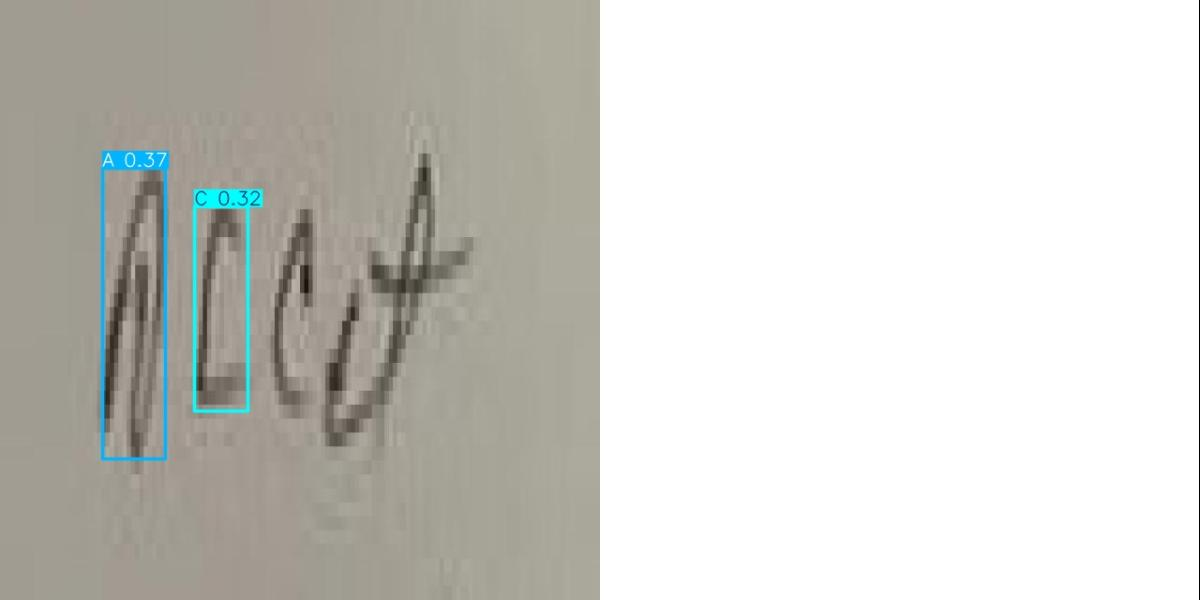

In [13]:
from IPython.display import display, Image
import os

# Define the directory containing the result images
folder_path = "/content/runs/detect/predict8"

# Iterate over each file in the directory
for filename in os.listdir(folder_path):
    if filename.startswith("result_"):
        # Construct the full path to the image
        img_path = os.path.join(folder_path, filename)

        # Display the image
        display(Image(filename=img_path))


Saved result for 336650112_741839600966025_1583784774976665785_n-4-_jpg.rf.e6738472e336ebc50159ab51710042b7.jpg as result_336650112_741839600966025_1583784774976665785_n-4-_jpg.rf.e6738472e336ebc50159ab51710042b7.jpg


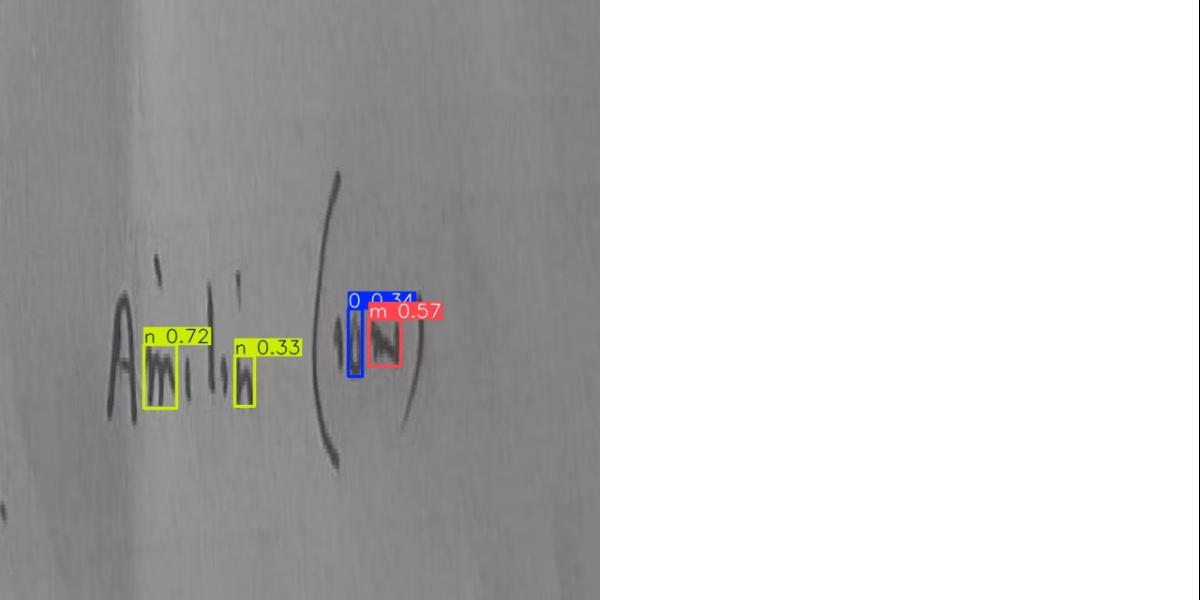

Saved result for 336622886_3127739944191472_2809415070733729144_n-3-_jpg.rf.335b5a443153a25c8d40825b75fd0d06.jpg as result_336622886_3127739944191472_2809415070733729144_n-3-_jpg.rf.335b5a443153a25c8d40825b75fd0d06.jpg


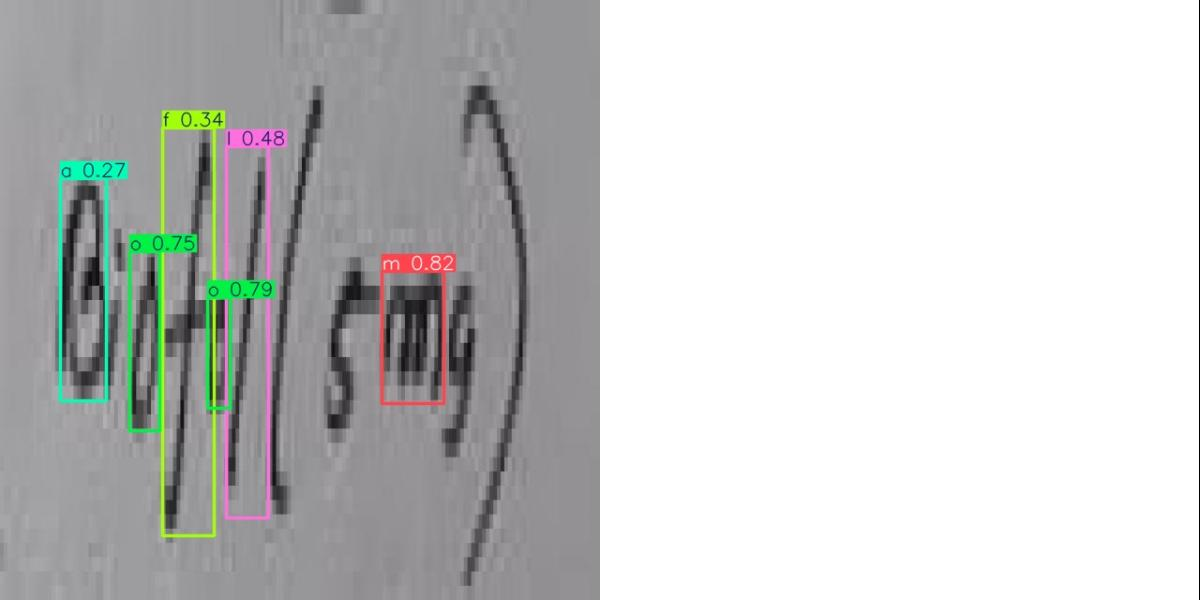

Saved result for 294318462_3303887099846713_282943357357289409_n-5-_jpg.rf.aa14dce8441031793882f59960a0d369.jpg as result_294318462_3303887099846713_282943357357289409_n-5-_jpg.rf.aa14dce8441031793882f59960a0d369.jpg


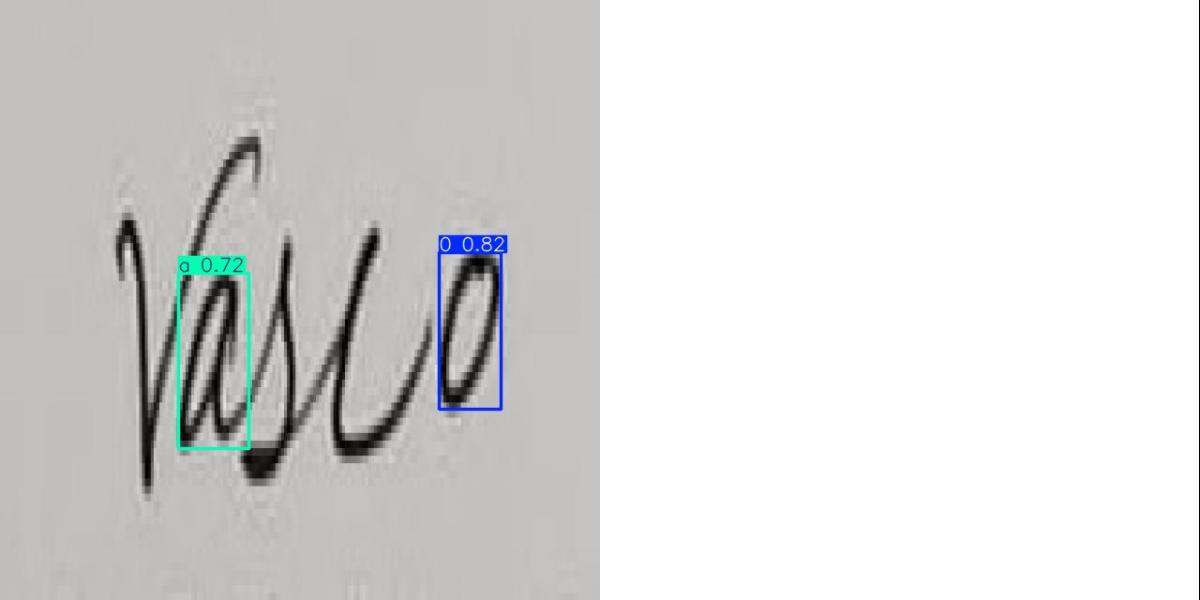

Saved result for result_293981501_3303887199846703_6068089133062694014_n-3-_jpg.rf.b4865f77ef35bf3e7da20ce001c17c9e.jpg as result_result_293981501_3303887199846703_6068089133062694014_n-3-_jpg.rf.b4865f77ef35bf3e7da20ce001c17c9e.jpg


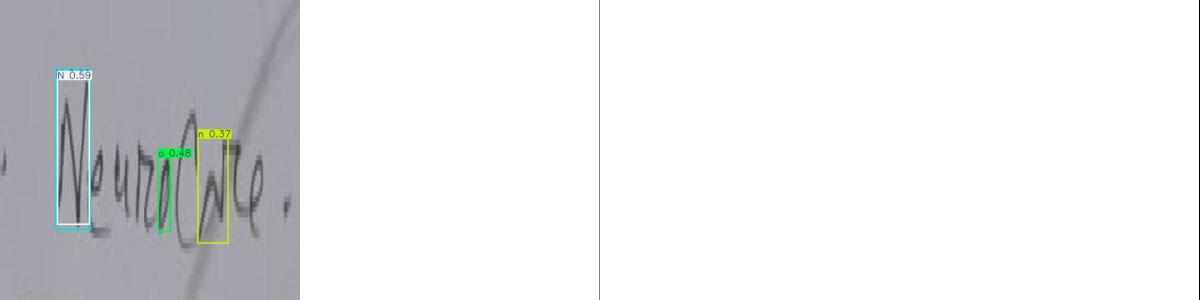

Saved result for result_294318462_3303887099846713_282943357357289409_n-5-_jpg.rf.aa14dce8441031793882f59960a0d369.jpg as result_result_294318462_3303887099846713_282943357357289409_n-5-_jpg.rf.aa14dce8441031793882f59960a0d369.jpg


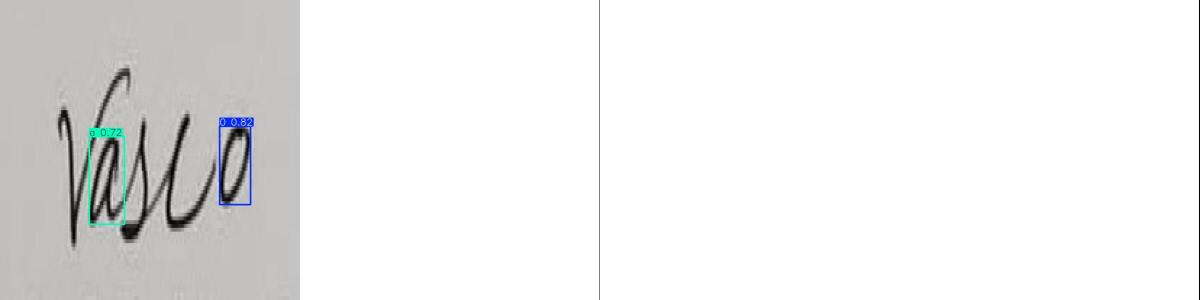

Saved result for result_WhatsApp-Image-2023-04-12-at-12-46-13-AM-2-_jpeg.rf.26c0508075df7ef8a3b19c5f0785e107.jpg as result_result_WhatsApp-Image-2023-04-12-at-12-46-13-AM-2-_jpeg.rf.26c0508075df7ef8a3b19c5f0785e107.jpg


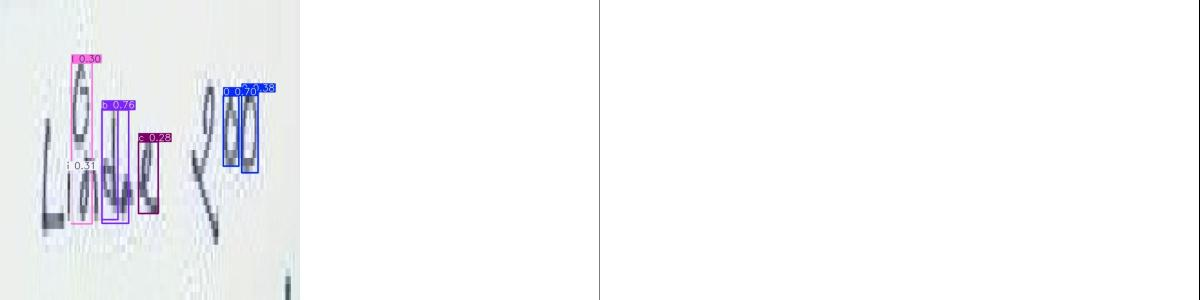

Saved result for 338419745_232257936039644_4878129809961326059_n-3-_jpg.rf.2b5b3dbfacf934699d6495febba85818.jpg as result_338419745_232257936039644_4878129809961326059_n-3-_jpg.rf.2b5b3dbfacf934699d6495febba85818.jpg


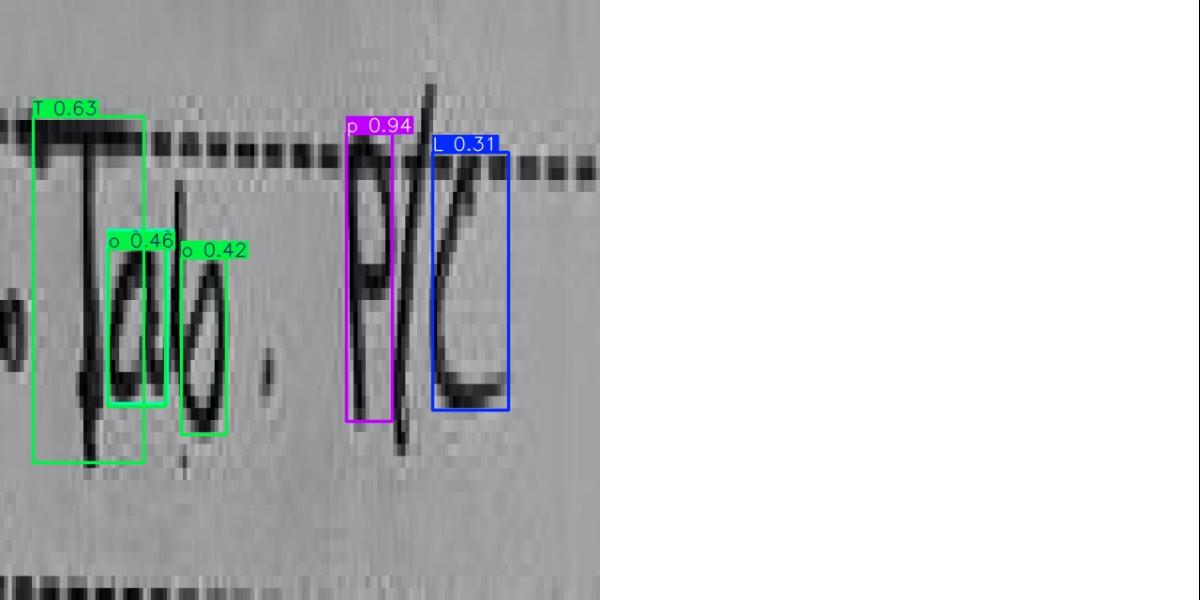

Saved result for result_338445142_561462916077872_2220652911471215901_n-2-_jpg.rf.8b008906b8ad616857b794c155cf31ec.jpg as result_result_338445142_561462916077872_2220652911471215901_n-2-_jpg.rf.8b008906b8ad616857b794c155cf31ec.jpg


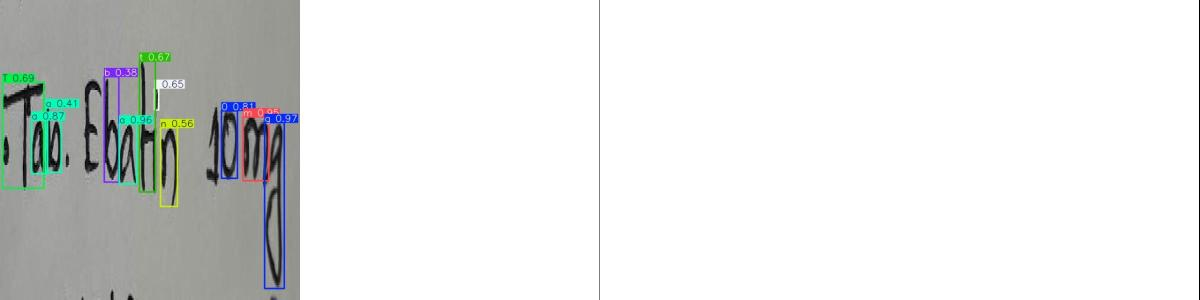

Saved result for 274610921_1749841078684575_7548508255602123747_n-5-_jpg.rf.8b0edaba72a4bc627541fbe0bb5d0fc3.jpg as result_274610921_1749841078684575_7548508255602123747_n-5-_jpg.rf.8b0edaba72a4bc627541fbe0bb5d0fc3.jpg


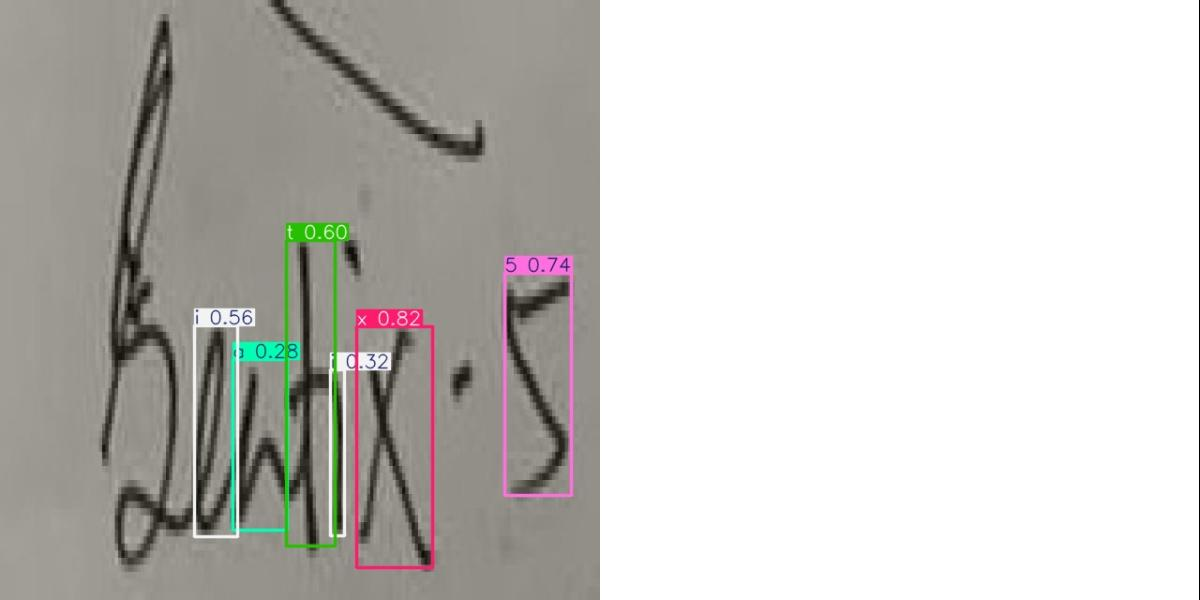

Saved result for result_336777798_6640271502684283_5976461237597261744_n-9-_jpg.rf.c83febcdf3d1f56375e7ad2c4f42ae29.jpg as result_result_336777798_6640271502684283_5976461237597261744_n-9-_jpg.rf.c83febcdf3d1f56375e7ad2c4f42ae29.jpg


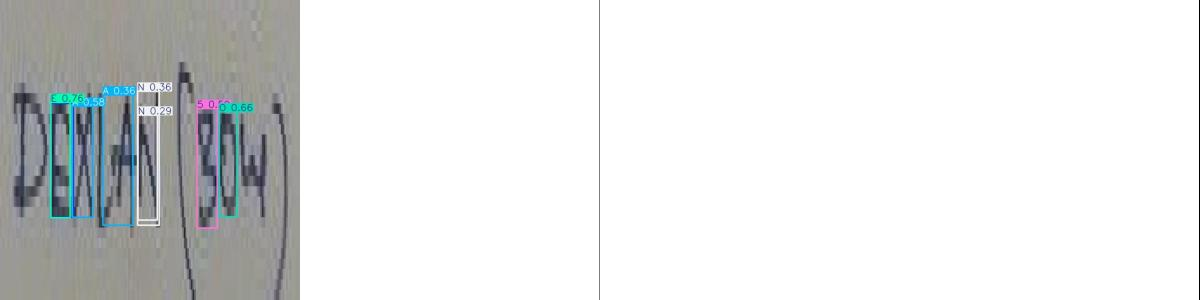

Saved result for result_334395492_593124739395504_1212591748108816881_n-6-_jpg.rf.1c9306e3d2762d3cc1642aece696d398.jpg as result_result_334395492_593124739395504_1212591748108816881_n-6-_jpg.rf.1c9306e3d2762d3cc1642aece696d398.jpg


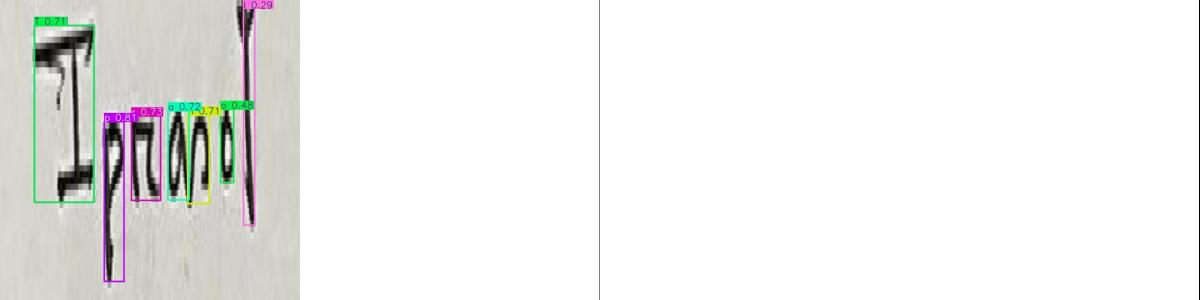

Saved result for 336617298_743733530809455_1158936886485938123_n-2-_jpg.rf.7b4b8625e82379fb416cf316648bc14e.jpg as result_336617298_743733530809455_1158936886485938123_n-2-_jpg.rf.7b4b8625e82379fb416cf316648bc14e.jpg


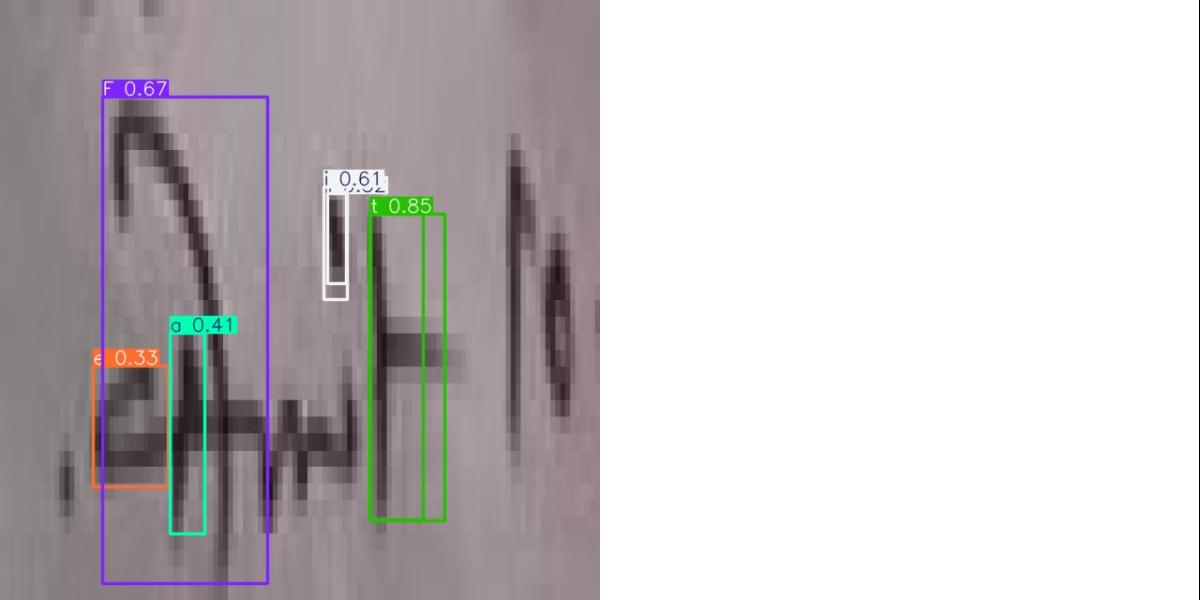

Saved result for 334395492_593124739395504_1212591748108816881_n-6-_jpg.rf.1c9306e3d2762d3cc1642aece696d398.jpg as result_334395492_593124739395504_1212591748108816881_n-6-_jpg.rf.1c9306e3d2762d3cc1642aece696d398.jpg


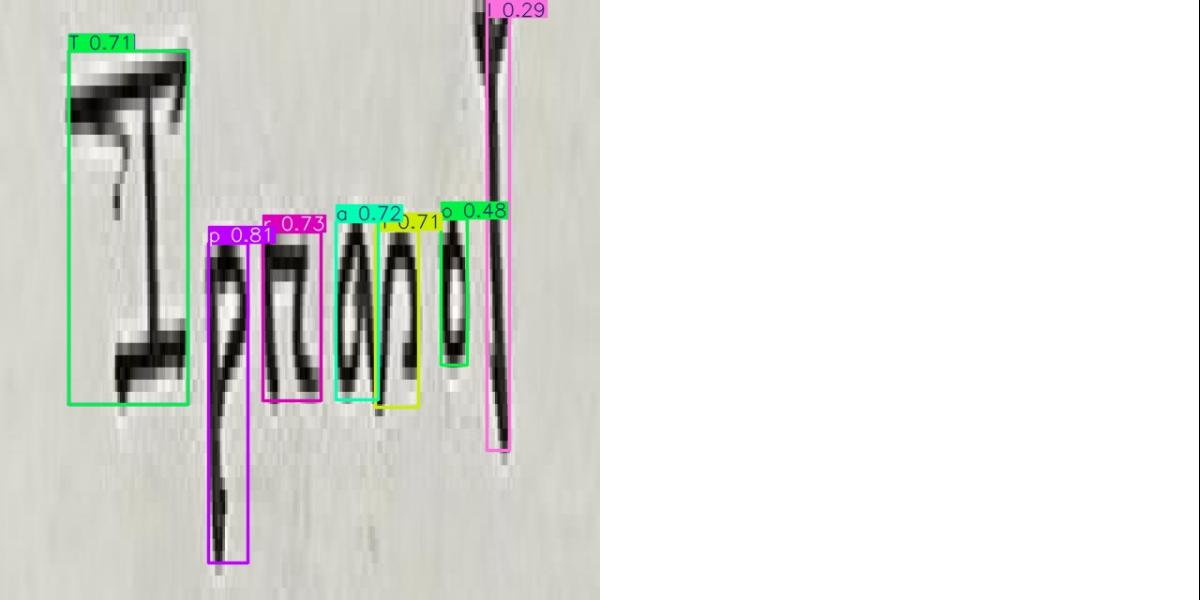

Saved result for result_336666205_165423046001953_5589747433971270971_n-5-_jpg.rf.d35d662be08a3c3fdc777cdb38d9c289.jpg as result_result_336666205_165423046001953_5589747433971270971_n-5-_jpg.rf.d35d662be08a3c3fdc777cdb38d9c289.jpg


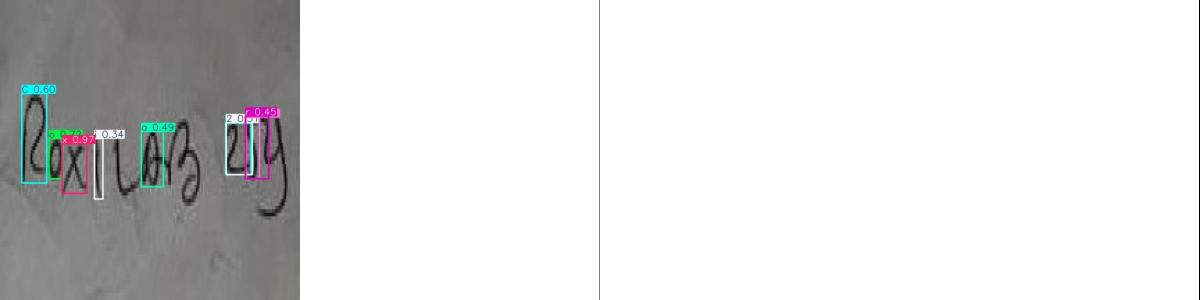

Saved result for 336626532_2845025505628685_480944166260794579_n-4-_jpg.rf.cdc1e80574bbfa3ae69f15583d2f1777.jpg as result_336626532_2845025505628685_480944166260794579_n-4-_jpg.rf.cdc1e80574bbfa3ae69f15583d2f1777.jpg


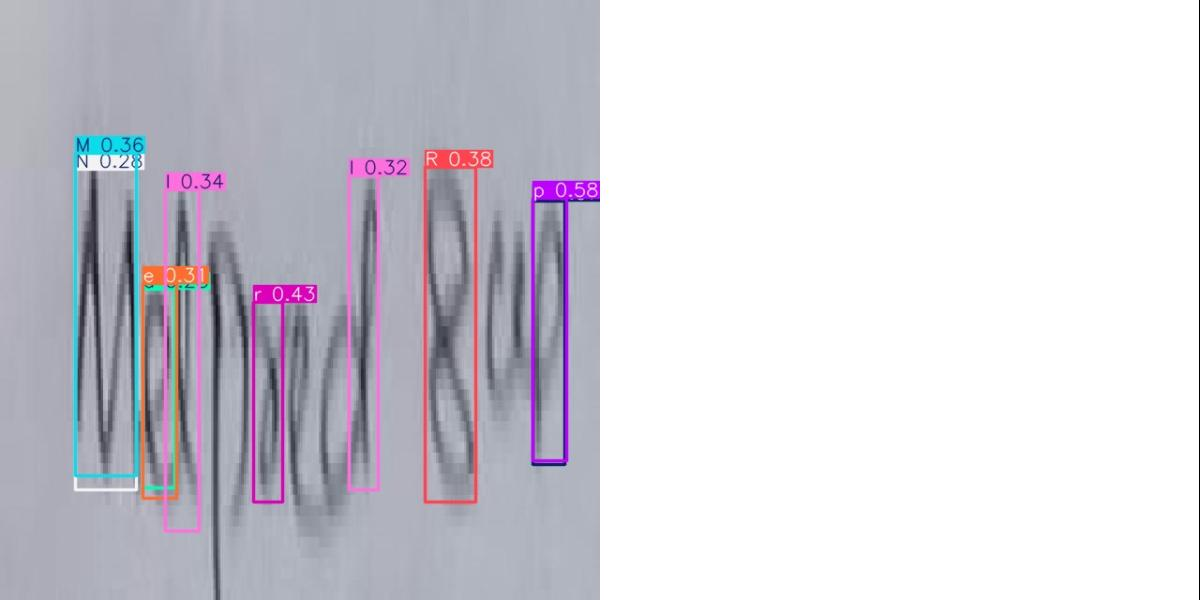

Saved result for result_334687951_127953783576835_9155742681542625913_n-4-_jpg.rf.47af9fc1da79226113f696ce444aced8.jpg as result_result_334687951_127953783576835_9155742681542625913_n-4-_jpg.rf.47af9fc1da79226113f696ce444aced8.jpg


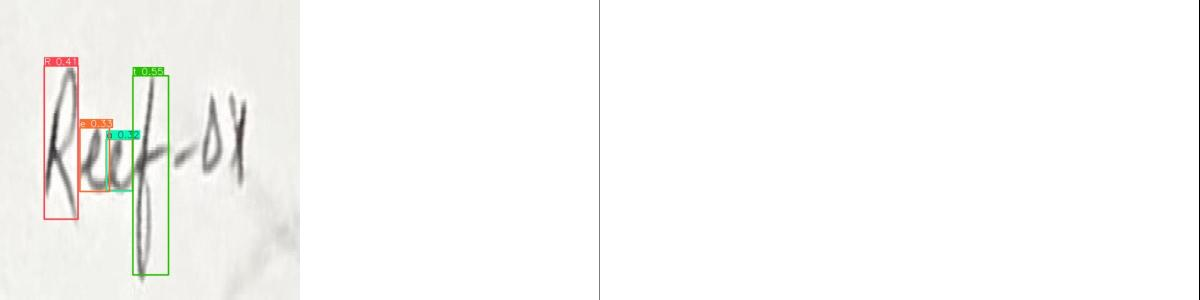

Saved result for result_336620218_1890914087923335_8720012510105860918_n-5-_jpg.rf.75902b9a9dfabe0512ae041f8ce74452.jpg as result_result_336620218_1890914087923335_8720012510105860918_n-5-_jpg.rf.75902b9a9dfabe0512ae041f8ce74452.jpg


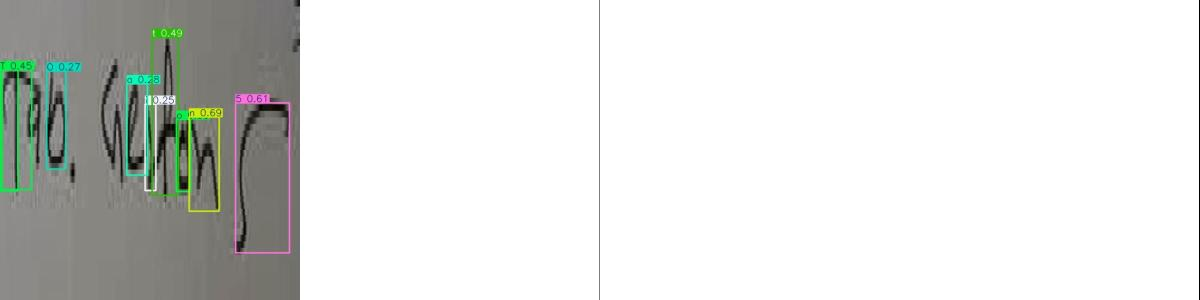

Saved result for 336945884_1220194682221211_1044591277932825485_n-6-_jpg.rf.28bb4e552974010ca0bda3fb91881a57.jpg as result_336945884_1220194682221211_1044591277932825485_n-6-_jpg.rf.28bb4e552974010ca0bda3fb91881a57.jpg


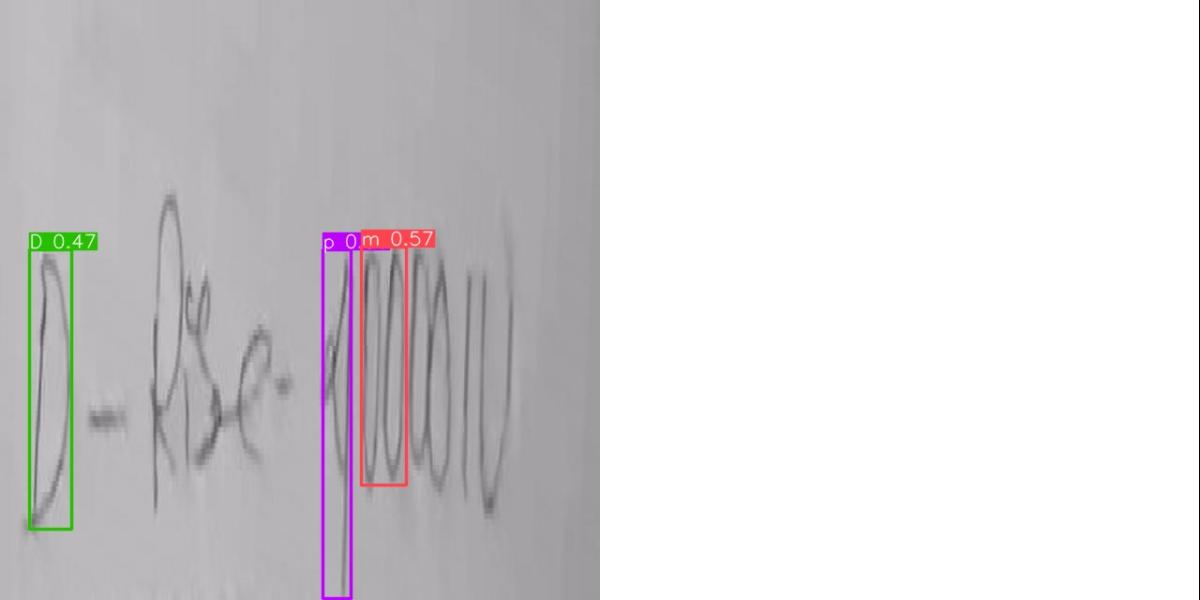

Saved result for 338396026_576325830925951_5395258132265372565_n-3-_jpg.rf.b1baf16d6c76382843fcc0387e6f692e.jpg as result_338396026_576325830925951_5395258132265372565_n-3-_jpg.rf.b1baf16d6c76382843fcc0387e6f692e.jpg


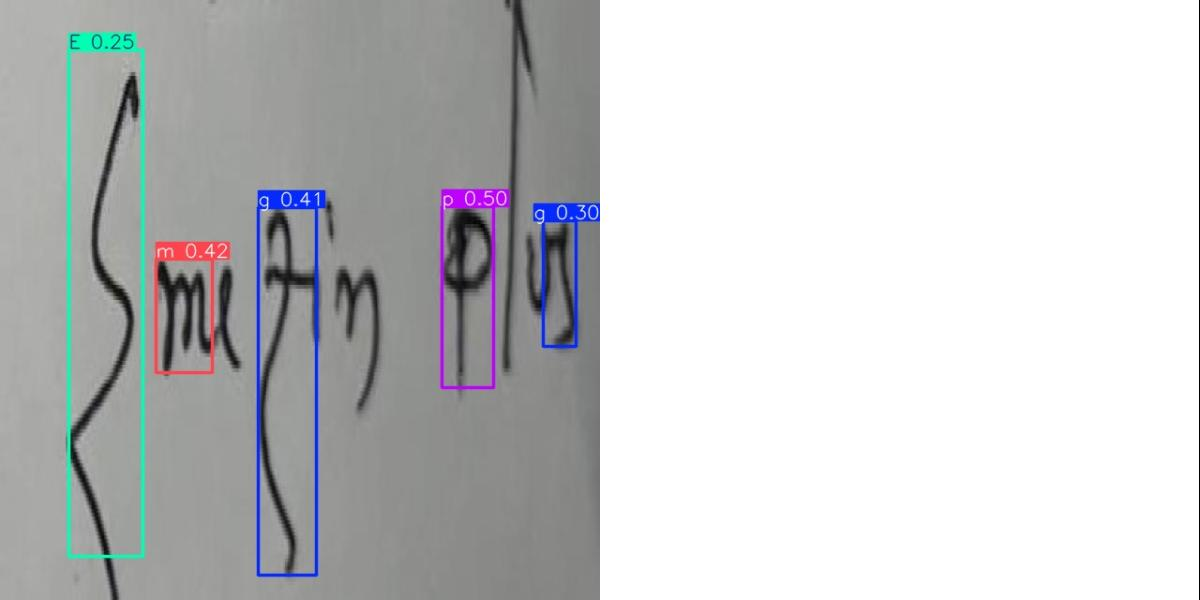

Saved result for result_336626532_2845025505628685_480944166260794579_n-4-_jpg.rf.cdc1e80574bbfa3ae69f15583d2f1777.jpg as result_result_336626532_2845025505628685_480944166260794579_n-4-_jpg.rf.cdc1e80574bbfa3ae69f15583d2f1777.jpg


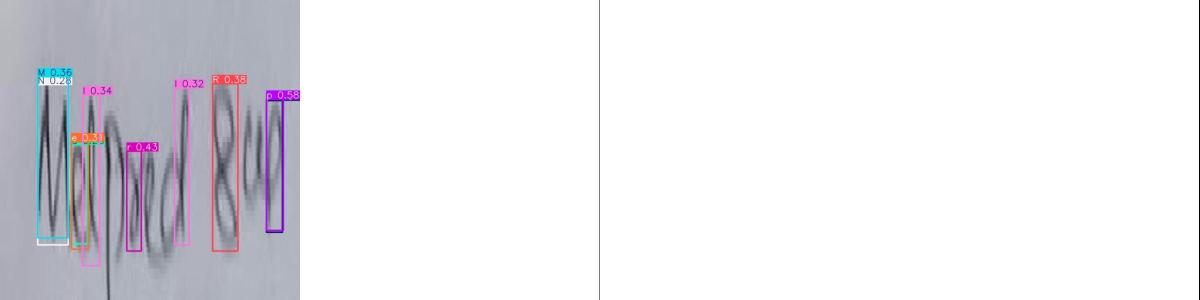

Saved result for 291930445_3291494747752615_4492892172151207585_n-5-_jpg.rf.0bcaa21a12aa5184de494144216dfb8e.jpg as result_291930445_3291494747752615_4492892172151207585_n-5-_jpg.rf.0bcaa21a12aa5184de494144216dfb8e.jpg


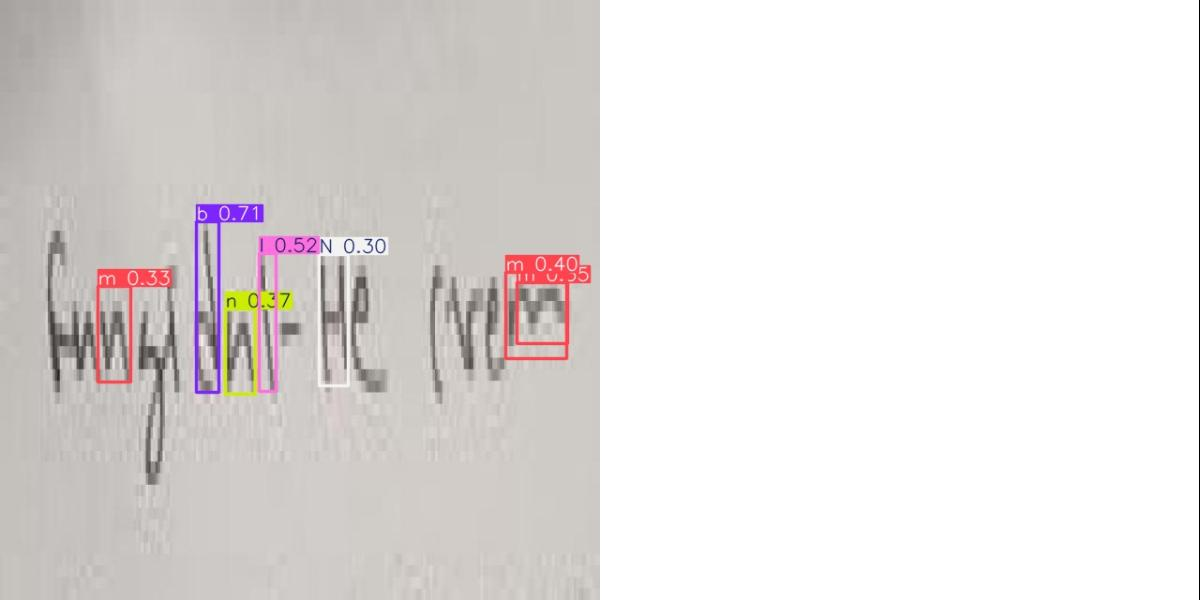

Saved result for 336617298_743733530809455_1158936886485938123_n-3-_jpg.rf.409aeb973e10dad235aa284463363155.jpg as result_336617298_743733530809455_1158936886485938123_n-3-_jpg.rf.409aeb973e10dad235aa284463363155.jpg


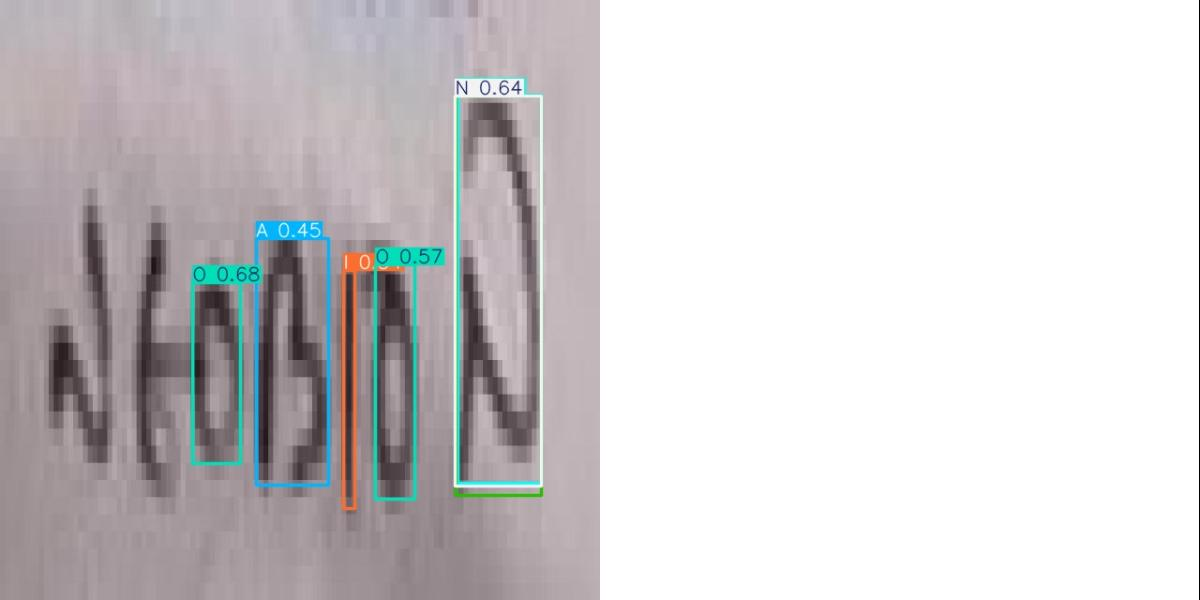

Saved result for 336632303_1618865751894131_5702171164781512821_n-2-_jpg.rf.7320a1f763a8aa8aa048a92fa0d606f8.jpg as result_336632303_1618865751894131_5702171164781512821_n-2-_jpg.rf.7320a1f763a8aa8aa048a92fa0d606f8.jpg


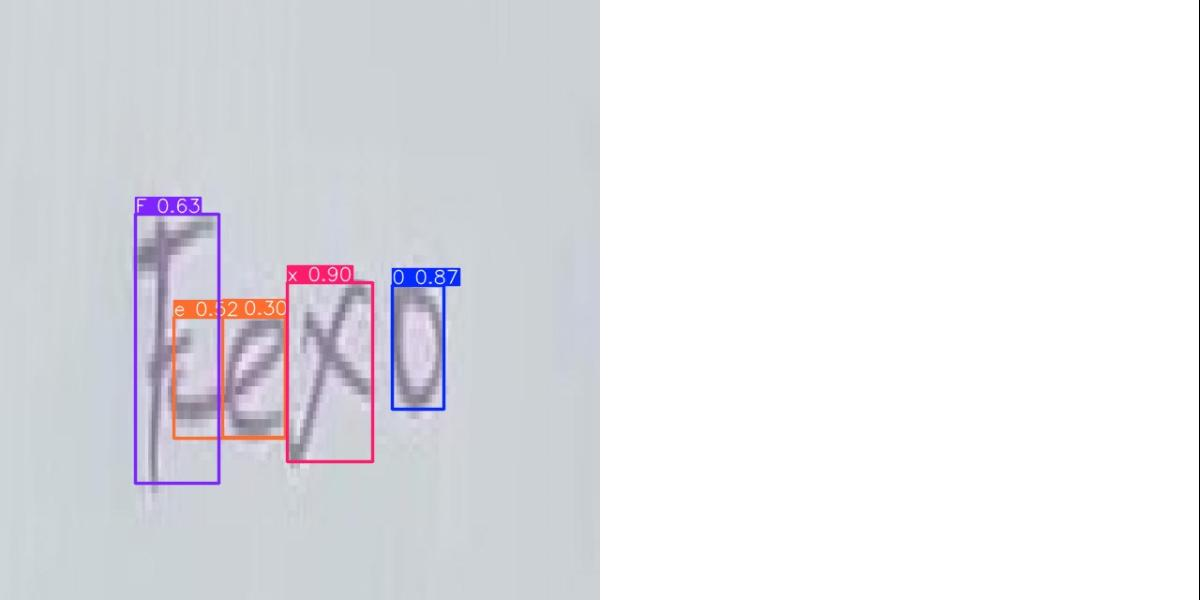

Saved result for result_336624427_540415684845078_6169884838695696742_n-4-_jpg.rf.8f253a0b7c90ba4de5bac3893a73e410.jpg as result_result_336624427_540415684845078_6169884838695696742_n-4-_jpg.rf.8f253a0b7c90ba4de5bac3893a73e410.jpg


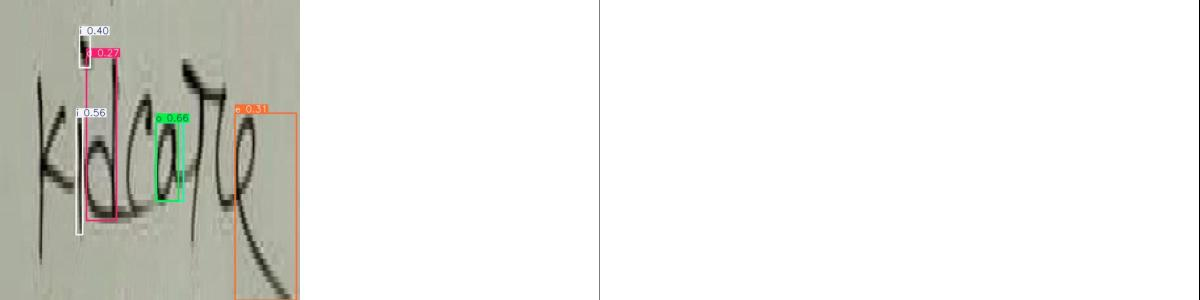

Saved result for result_294624053_3303885279846895_4843588743980871721_n-6-_jpg.rf.e643b8fb42ab9d6d4a4bd01ed2a77a9a.jpg as result_result_294624053_3303885279846895_4843588743980871721_n-6-_jpg.rf.e643b8fb42ab9d6d4a4bd01ed2a77a9a.jpg


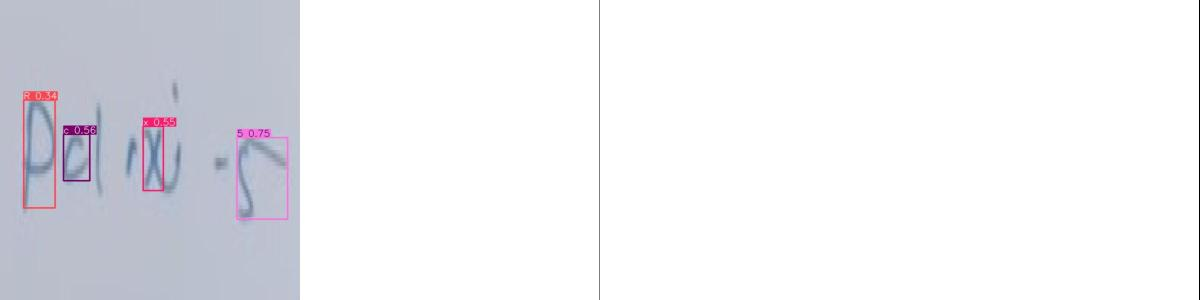

Saved result for result_WhatsApp-Image-2023-04-12-at-4-19-08-PM-5-_jpeg.rf.546a38b7217ffc13e5b84b918e2e49f0.jpg as result_result_WhatsApp-Image-2023-04-12-at-4-19-08-PM-5-_jpeg.rf.546a38b7217ffc13e5b84b918e2e49f0.jpg


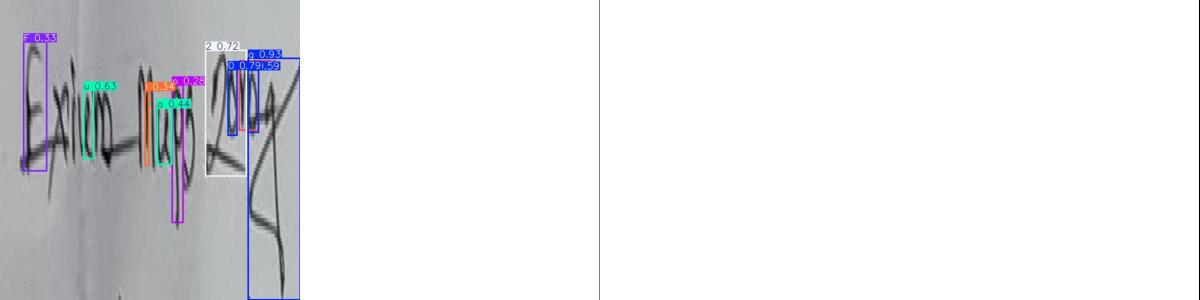

Saved result for result_290945419_3291494881085935_1745412728668588753_n-3-_jpg.rf.2088f685db4ac5cdae20a921d63cd264.jpg as result_result_290945419_3291494881085935_1745412728668588753_n-3-_jpg.rf.2088f685db4ac5cdae20a921d63cd264.jpg


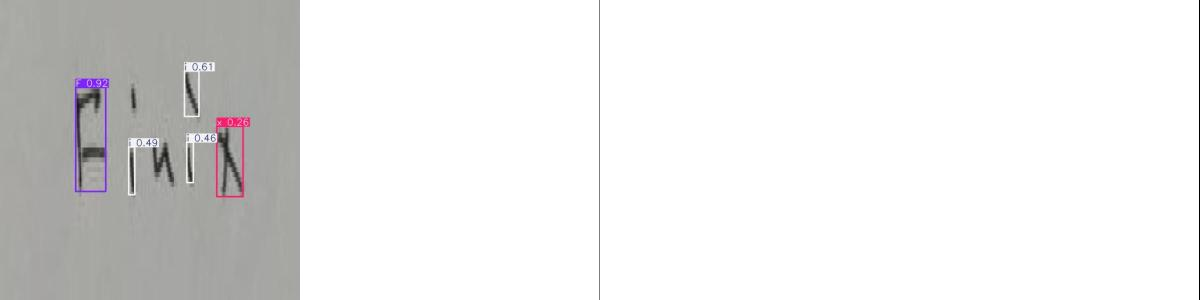

Saved result for 338292852_773411784358746_4220674182585549160_n-2-_jpg.rf.41bb55f29313555aaacf8b743b811cc4.jpg as result_338292852_773411784358746_4220674182585549160_n-2-_jpg.rf.41bb55f29313555aaacf8b743b811cc4.jpg


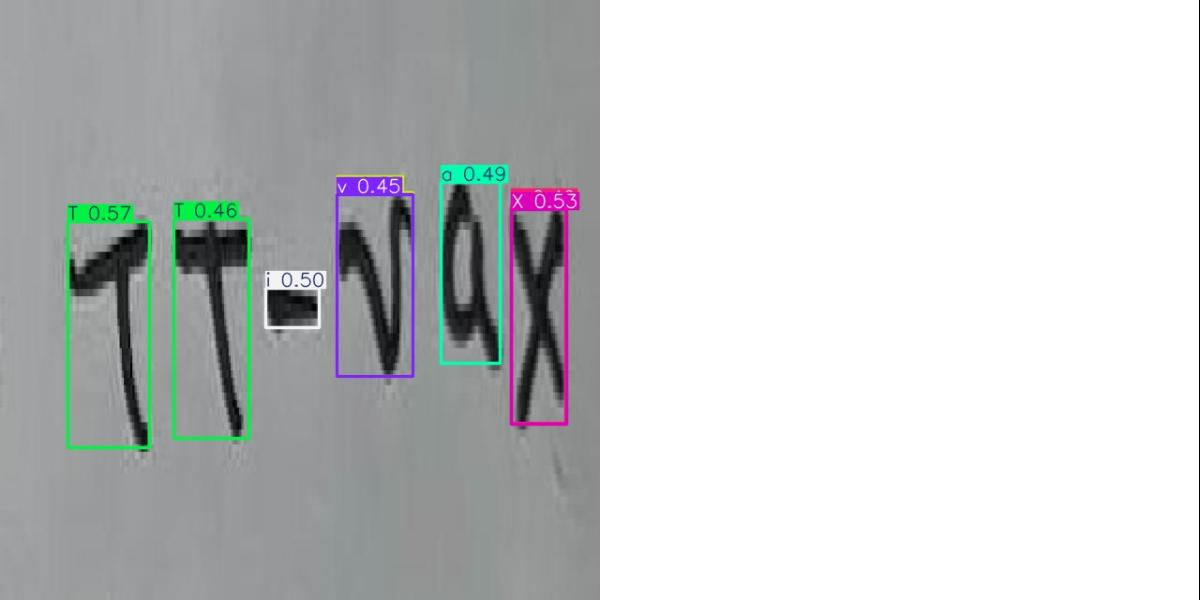

Saved result for result_336666205_165423046001953_5589747433971270971_n-4-_jpg.rf.73065346600ebd2e4eb9d66cf03b1b81.jpg as result_result_336666205_165423046001953_5589747433971270971_n-4-_jpg.rf.73065346600ebd2e4eb9d66cf03b1b81.jpg


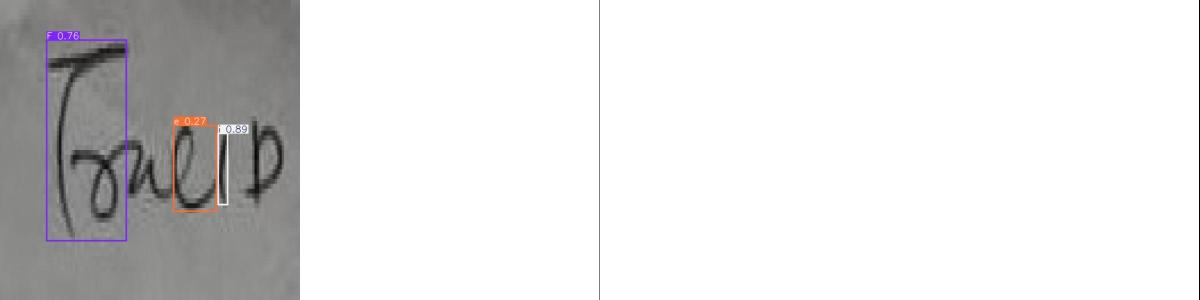

Saved result for result_280119519_1343766579472393_2195751068597739040_n-3-_jpg.rf.0de2956026b338ebb5bfa61edebcefbf.jpg as result_result_280119519_1343766579472393_2195751068597739040_n-3-_jpg.rf.0de2956026b338ebb5bfa61edebcefbf.jpg


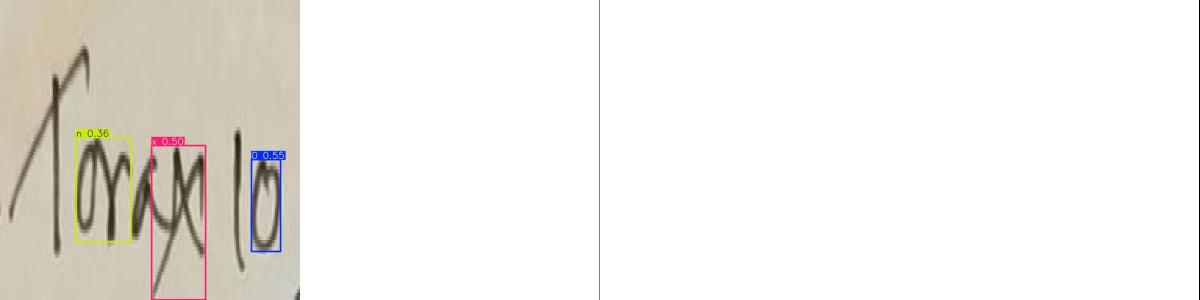

Saved result for result_274610921_1749841078684575_7548508255602123747_n-5-_jpg.rf.8b0edaba72a4bc627541fbe0bb5d0fc3.jpg as result_result_274610921_1749841078684575_7548508255602123747_n-5-_jpg.rf.8b0edaba72a4bc627541fbe0bb5d0fc3.jpg


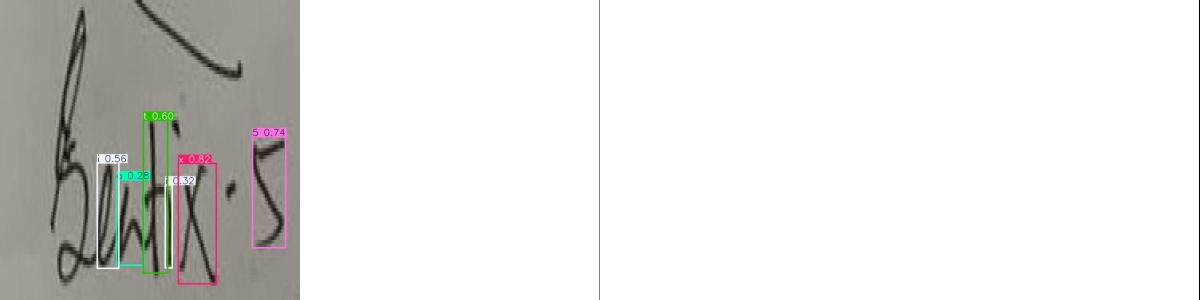

Saved result for result_294318462_3303887099846713_282943357357289409_n-2-_jpg.rf.9d9323d8b4b1e06b375d7666deae649b.jpg as result_result_294318462_3303887099846713_282943357357289409_n-2-_jpg.rf.9d9323d8b4b1e06b375d7666deae649b.jpg


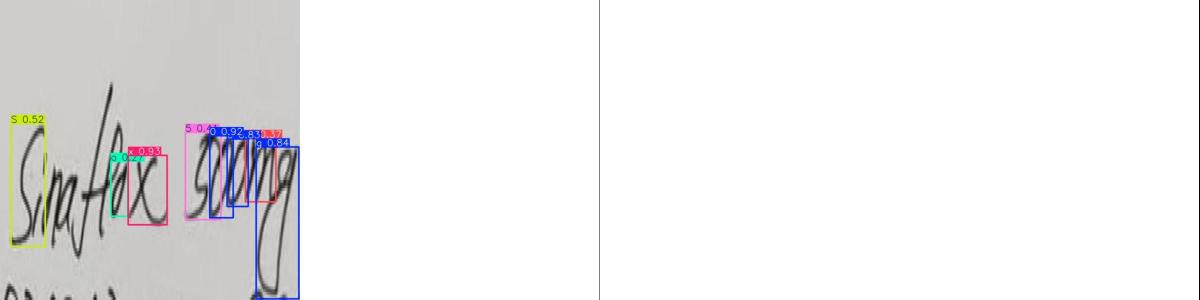

Saved result for result_WhatsApp-Image-2023-04-12-at-5-11-24-PM-3-_jpeg.rf.877edf6b6c84e5166d30ae18600fecf2.jpg as result_result_WhatsApp-Image-2023-04-12-at-5-11-24-PM-3-_jpeg.rf.877edf6b6c84e5166d30ae18600fecf2.jpg


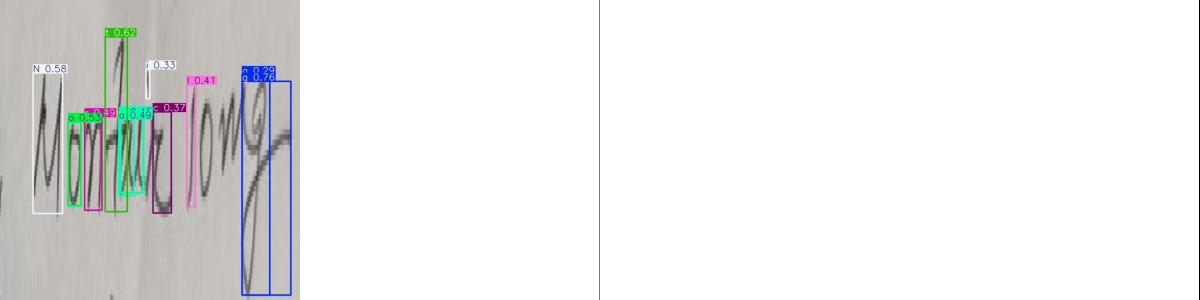

Saved result for 336798535_184697054350202_6379440742421364684_n-2-_jpg.rf.f7656e439c5b8e62eb0d4b8e3c7e814e.jpg as result_336798535_184697054350202_6379440742421364684_n-2-_jpg.rf.f7656e439c5b8e62eb0d4b8e3c7e814e.jpg


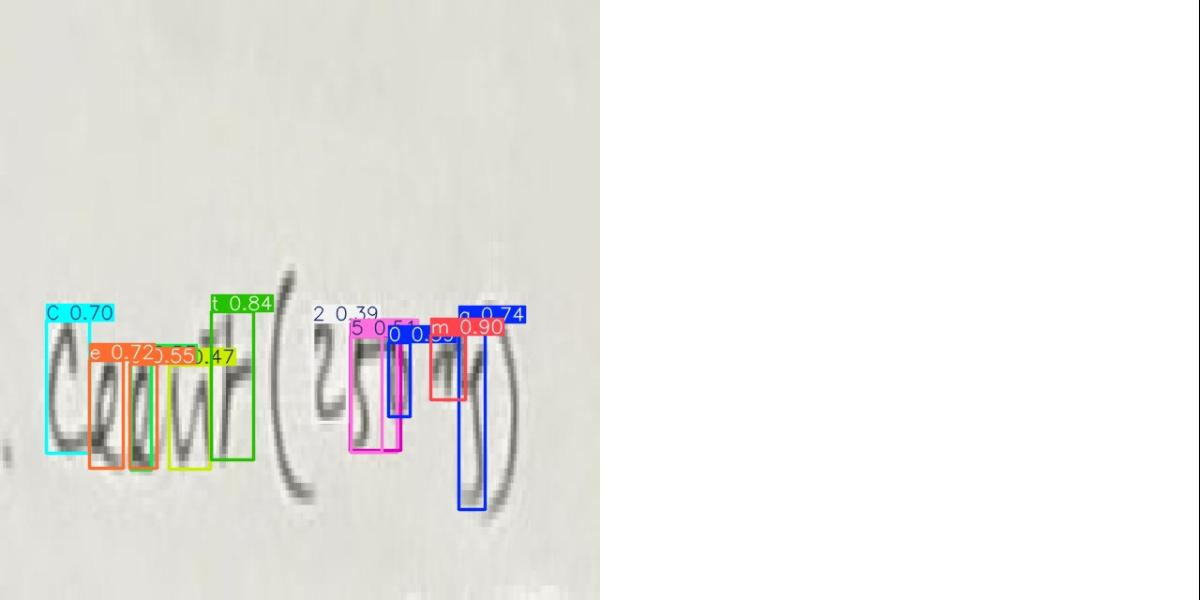

Saved result for 291128160_3291494907752599_5103898893350964872_n-8-_jpg.rf.a23fd9ada35c1ea4ffb659ba2fea28dc.jpg as result_291128160_3291494907752599_5103898893350964872_n-8-_jpg.rf.a23fd9ada35c1ea4ffb659ba2fea28dc.jpg


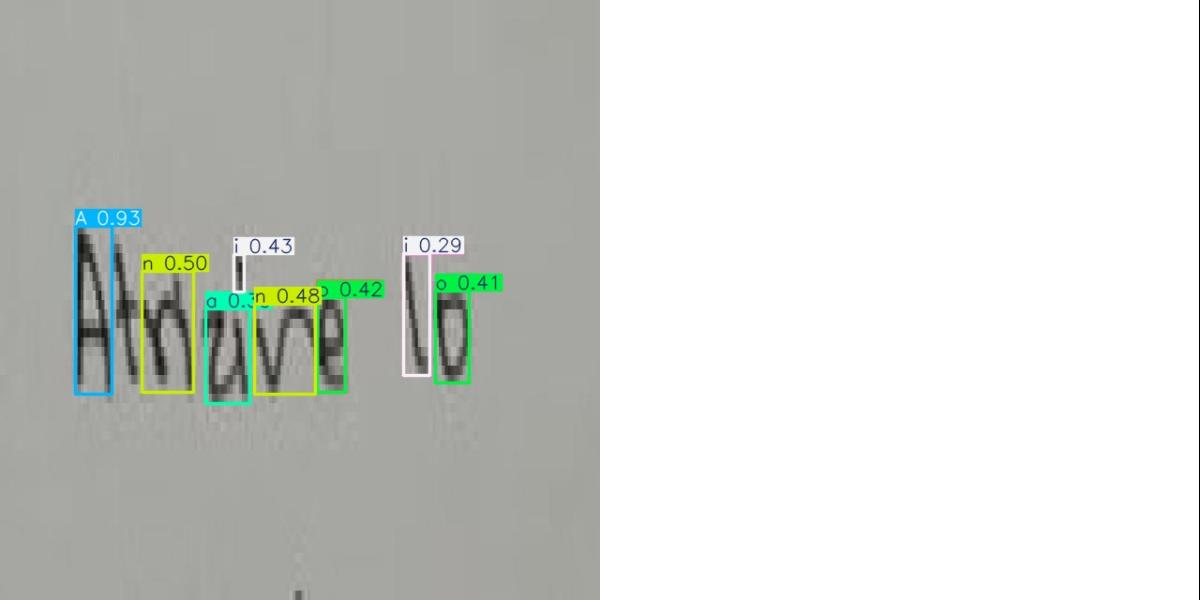

Saved result for 338405897_1465080897635575_8964240681685132490_n-2-_jpg.rf.7bd49515e97a005b4465245ec6b53bb3.jpg as result_338405897_1465080897635575_8964240681685132490_n-2-_jpg.rf.7bd49515e97a005b4465245ec6b53bb3.jpg


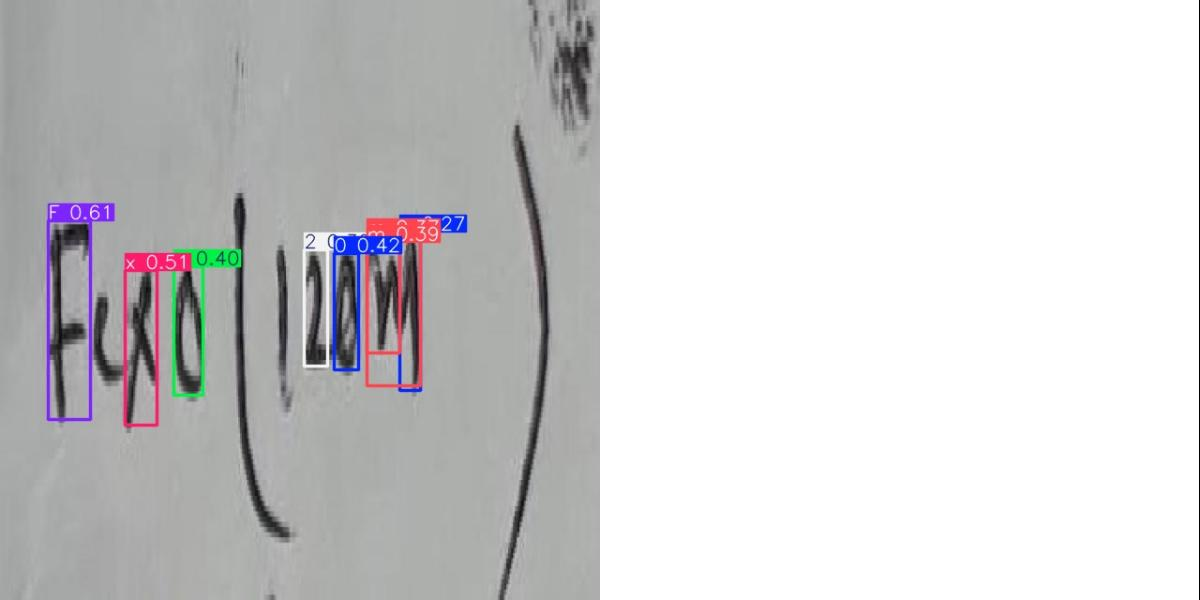

Saved result for 334687951_127953783576835_9155742681542625913_n-4-_jpg.rf.47af9fc1da79226113f696ce444aced8.jpg as result_334687951_127953783576835_9155742681542625913_n-4-_jpg.rf.47af9fc1da79226113f696ce444aced8.jpg


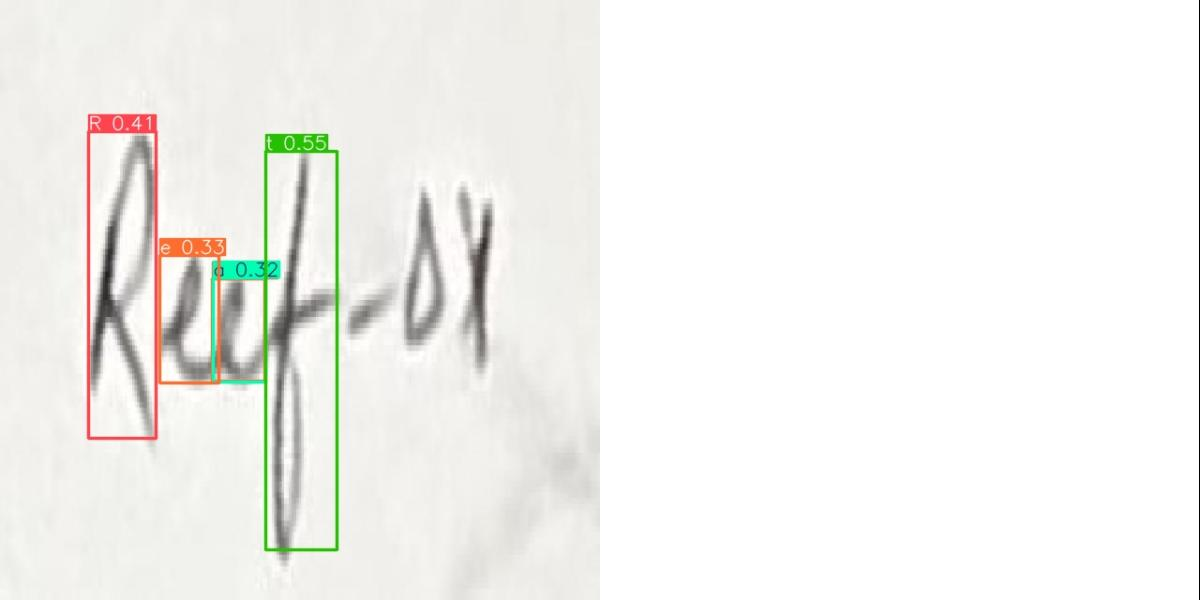

Saved result for result_294102207_3303887066513383_6323161470553190259_n-2-_jpg.rf.b15fea714168d68122c15335bbcc14b4.jpg as result_result_294102207_3303887066513383_6323161470553190259_n-2-_jpg.rf.b15fea714168d68122c15335bbcc14b4.jpg


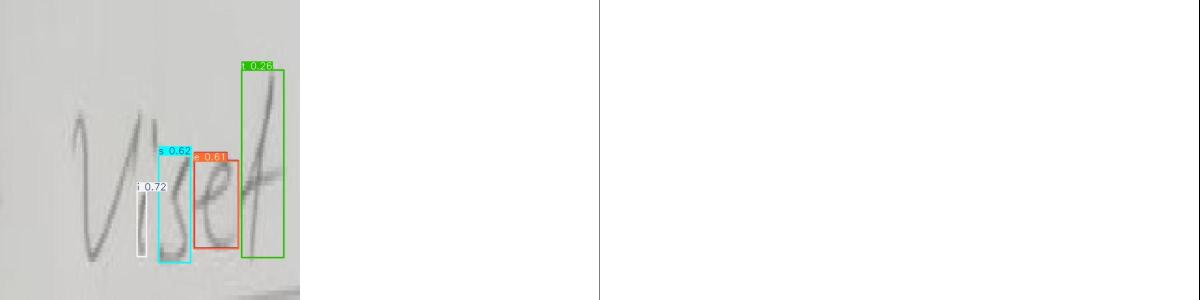

Saved result for 336666205_165423046001953_5589747433971270971_n-5-_jpg.rf.d35d662be08a3c3fdc777cdb38d9c289.jpg as result_336666205_165423046001953_5589747433971270971_n-5-_jpg.rf.d35d662be08a3c3fdc777cdb38d9c289.jpg


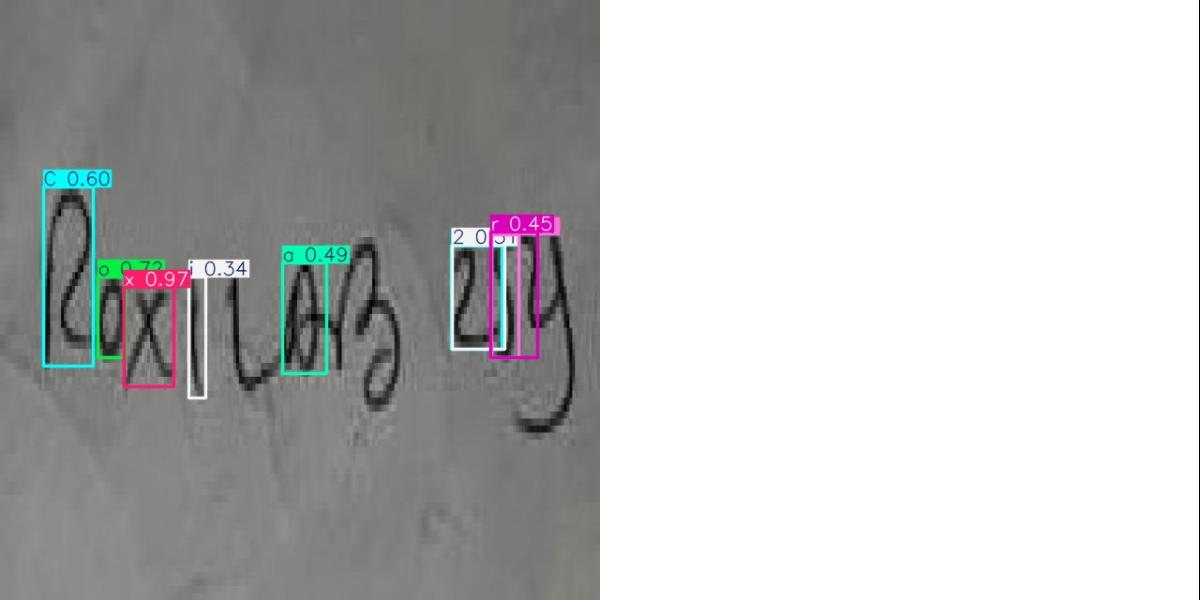

Saved result for result_336945884_1220194682221211_1044591277932825485_n-6-_jpg.rf.28bb4e552974010ca0bda3fb91881a57.jpg as result_result_336945884_1220194682221211_1044591277932825485_n-6-_jpg.rf.28bb4e552974010ca0bda3fb91881a57.jpg


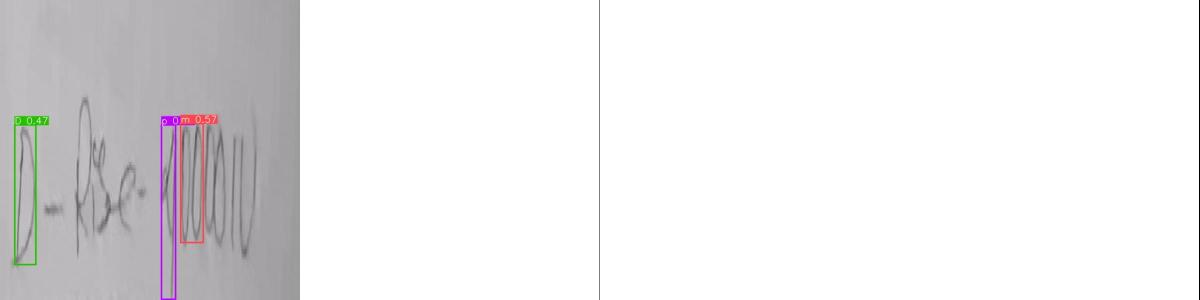

Saved result for result_280119519_1343766579472393_2195751068597739040_n-4-_jpg.rf.a1661f905833e6c25e17f5d5a99de827.jpg as result_result_280119519_1343766579472393_2195751068597739040_n-4-_jpg.rf.a1661f905833e6c25e17f5d5a99de827.jpg


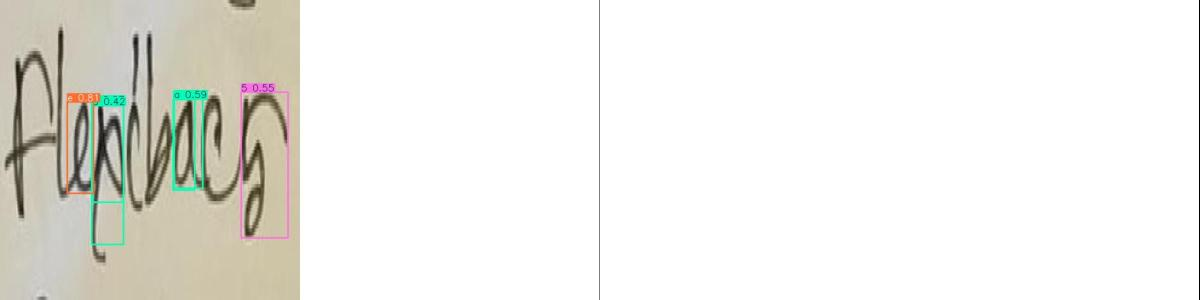

Saved result for 294318462_3303887099846713_282943357357289409_n-2-_jpg.rf.9d9323d8b4b1e06b375d7666deae649b.jpg as result_294318462_3303887099846713_282943357357289409_n-2-_jpg.rf.9d9323d8b4b1e06b375d7666deae649b.jpg


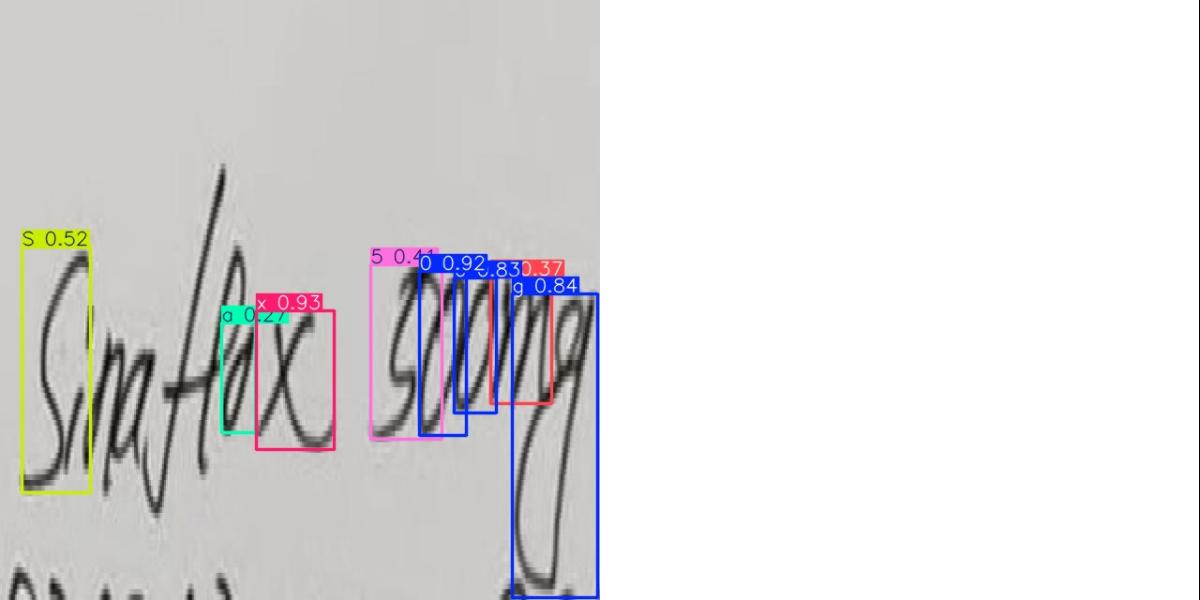

Saved result for 336623473_888704692356367_3941721347640718296_n-3-_jpg.rf.f72f953f06aa6af2d5e92541da0f61bc.jpg as result_336623473_888704692356367_3941721347640718296_n-3-_jpg.rf.f72f953f06aa6af2d5e92541da0f61bc.jpg


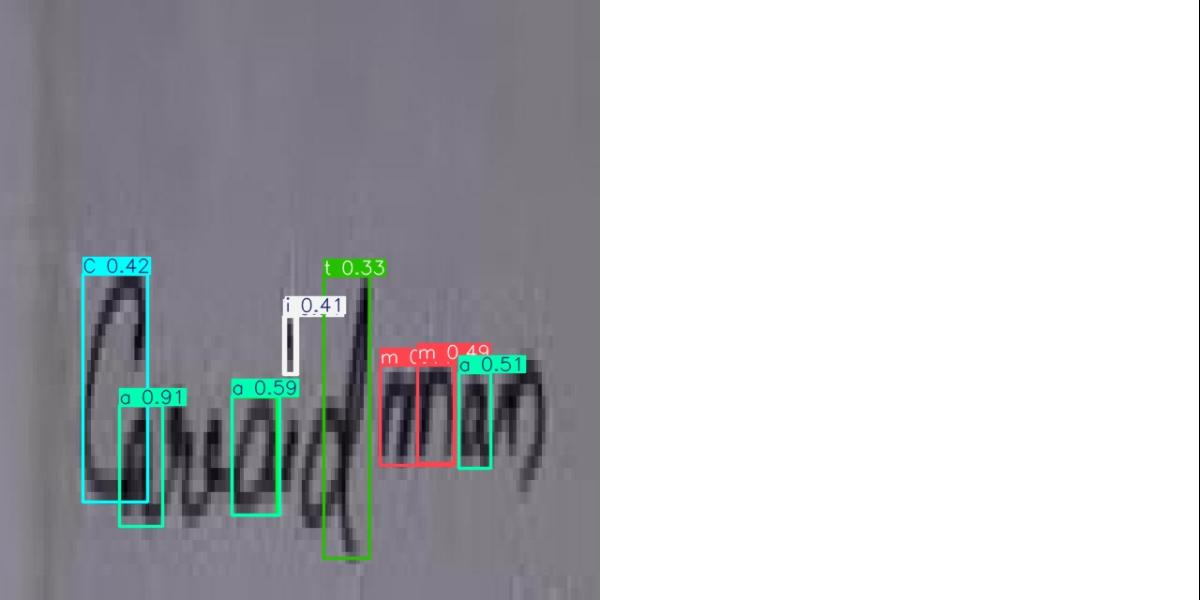

Saved result for result_292021346_3291494787752611_7031030420345238571_n-4-_jpg.rf.ce842b201e88463a311d1ff1819038df.jpg as result_result_292021346_3291494787752611_7031030420345238571_n-4-_jpg.rf.ce842b201e88463a311d1ff1819038df.jpg


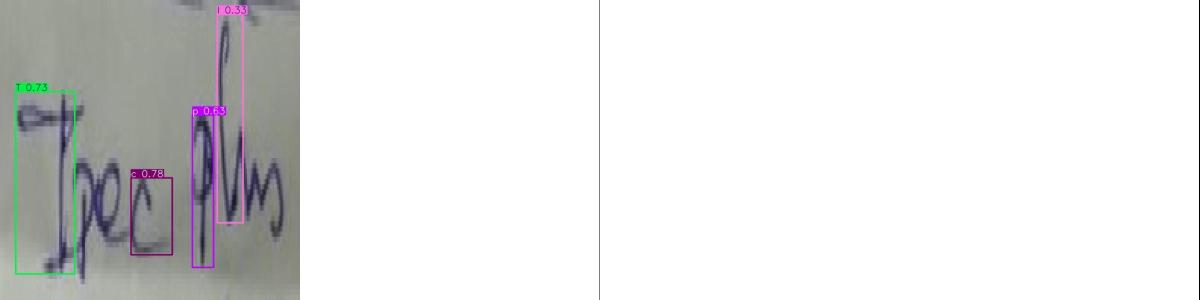

Saved result for WhatsApp-Image-2023-04-12-at-12-23-40-PM-3-_jpeg.rf.3accc74e55f2816762bcc5abd2acc0a3.jpg as result_WhatsApp-Image-2023-04-12-at-12-23-40-PM-3-_jpeg.rf.3accc74e55f2816762bcc5abd2acc0a3.jpg


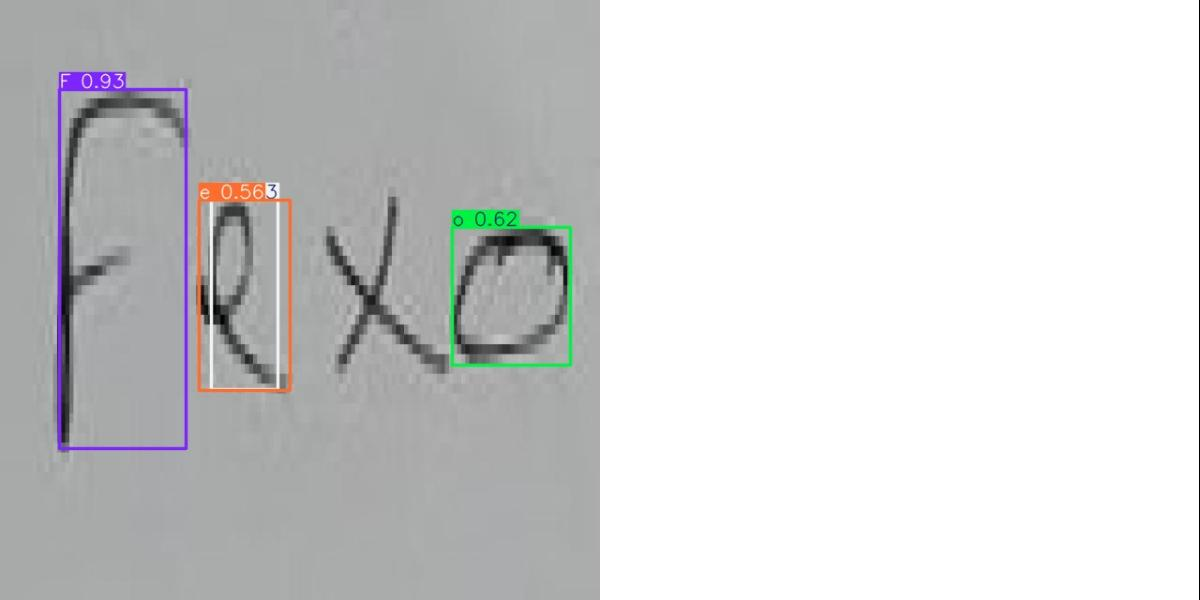

Saved result for result_290749457_3291495041085919_4703804703928375461_n-2-_jpg.rf.24a8458ca8cac1d0c99ed1f6f4bc2418.jpg as result_result_290749457_3291495041085919_4703804703928375461_n-2-_jpg.rf.24a8458ca8cac1d0c99ed1f6f4bc2418.jpg


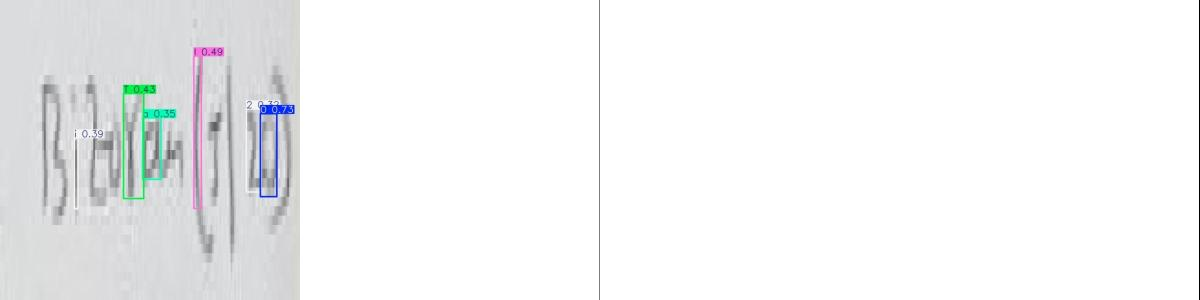

Saved result for 337641997_1548338229025404_4622143931103678237_n-4-_jpg.rf.2e6e975bea650e4c3452177542bebd24.jpg as result_337641997_1548338229025404_4622143931103678237_n-4-_jpg.rf.2e6e975bea650e4c3452177542bebd24.jpg


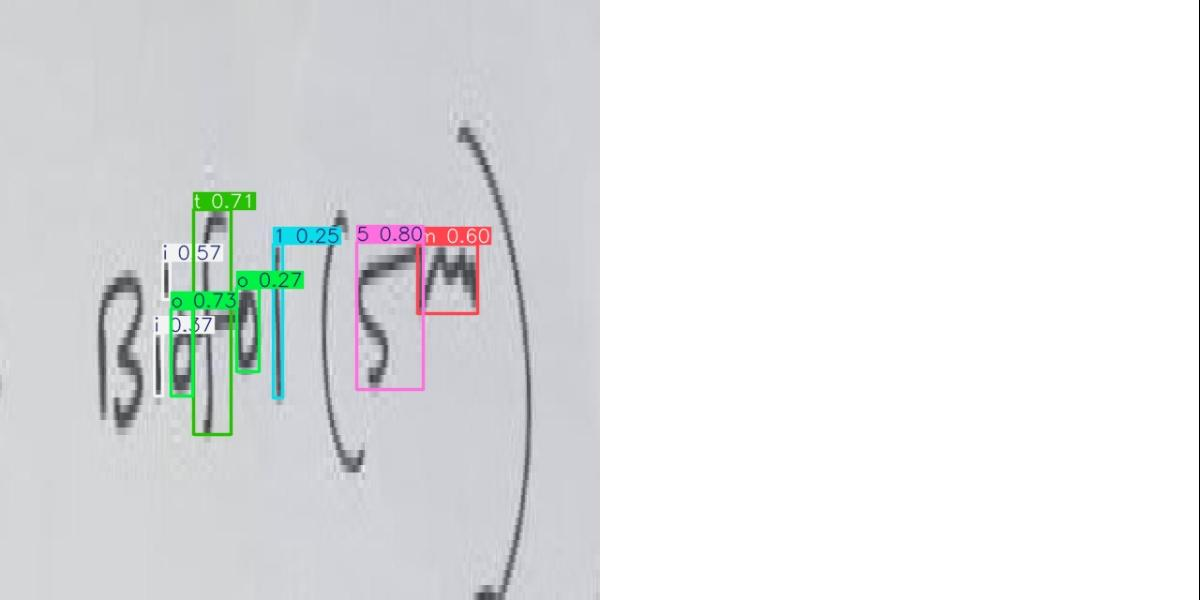

Saved result for 294933413_3303886999846723_7979518029713183681_n-2-_jpg.rf.5eedb3cb027b257f6d510ba362ba532a.jpg as result_294933413_3303886999846723_7979518029713183681_n-2-_jpg.rf.5eedb3cb027b257f6d510ba362ba532a.jpg


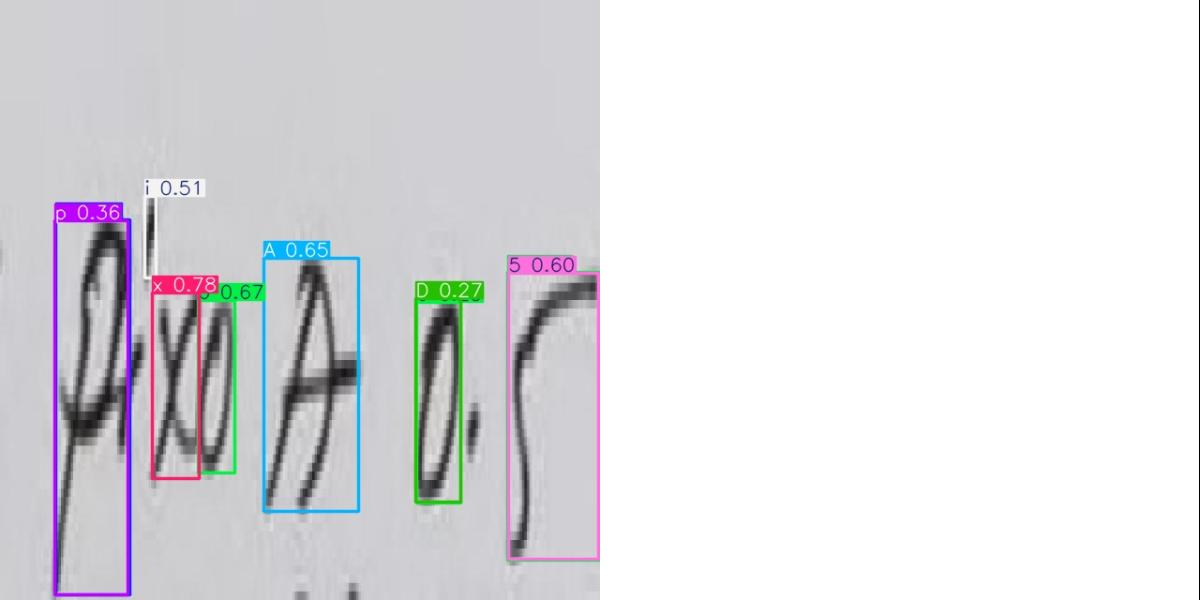

Saved result for result_336632303_1618865751894131_5702171164781512821_n-2-_jpg.rf.7320a1f763a8aa8aa048a92fa0d606f8.jpg as result_result_336632303_1618865751894131_5702171164781512821_n-2-_jpg.rf.7320a1f763a8aa8aa048a92fa0d606f8.jpg


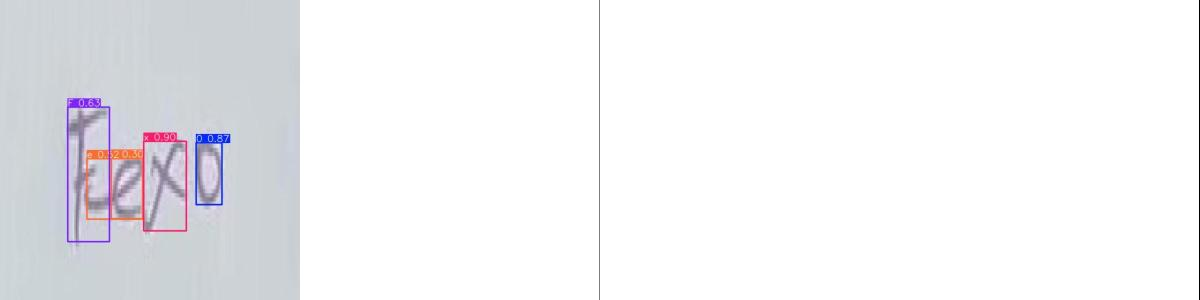

Saved result for result_338405897_1465080897635575_8964240681685132490_n-2-_jpg.rf.7bd49515e97a005b4465245ec6b53bb3.jpg as result_result_338405897_1465080897635575_8964240681685132490_n-2-_jpg.rf.7bd49515e97a005b4465245ec6b53bb3.jpg


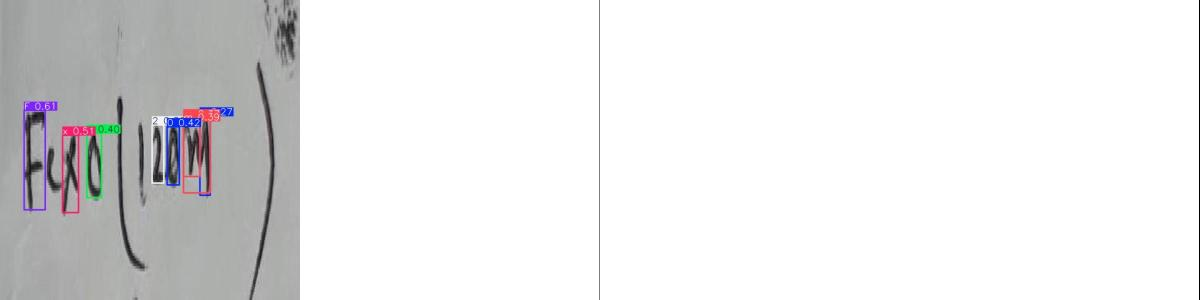

Saved result for 338445142_561462916077872_2220652911471215901_n-2-_jpg.rf.8b008906b8ad616857b794c155cf31ec.jpg as result_338445142_561462916077872_2220652911471215901_n-2-_jpg.rf.8b008906b8ad616857b794c155cf31ec.jpg


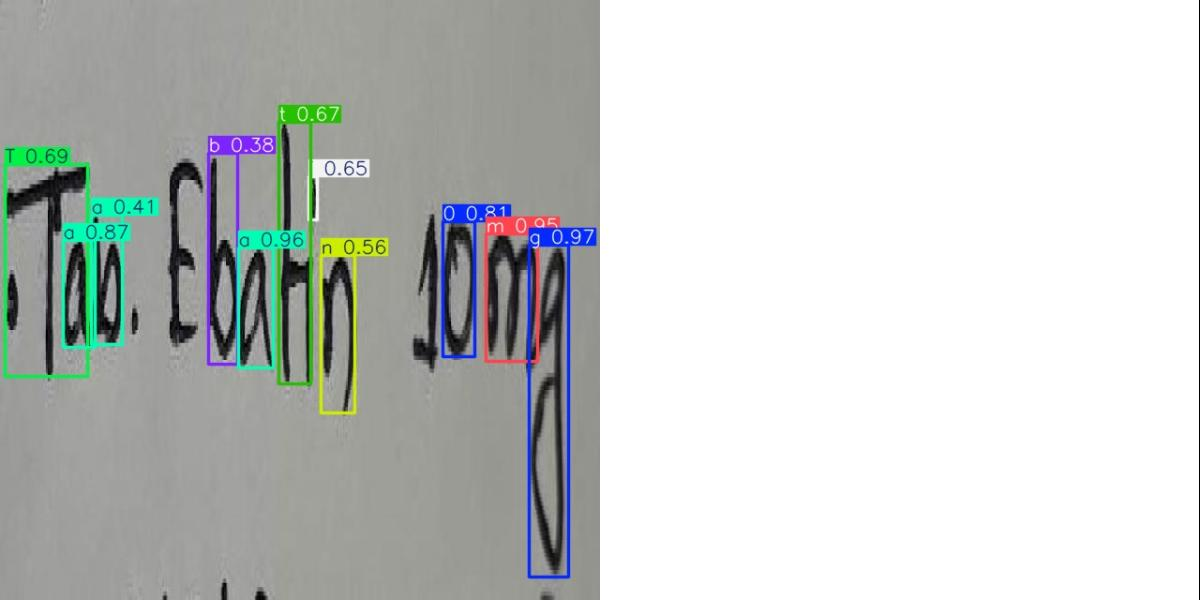

Saved result for result_291128160_3291494907752599_5103898893350964872_n-8-_jpg.rf.a23fd9ada35c1ea4ffb659ba2fea28dc.jpg as result_result_291128160_3291494907752599_5103898893350964872_n-8-_jpg.rf.a23fd9ada35c1ea4ffb659ba2fea28dc.jpg


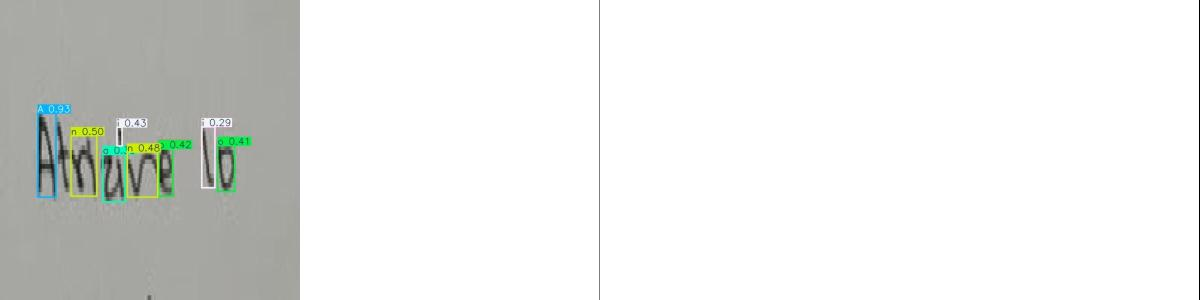

Saved result for 20230314_201612-4-_jpg.rf.a45d0c9c55660917301533d51541411b.jpg as result_20230314_201612-4-_jpg.rf.a45d0c9c55660917301533d51541411b.jpg


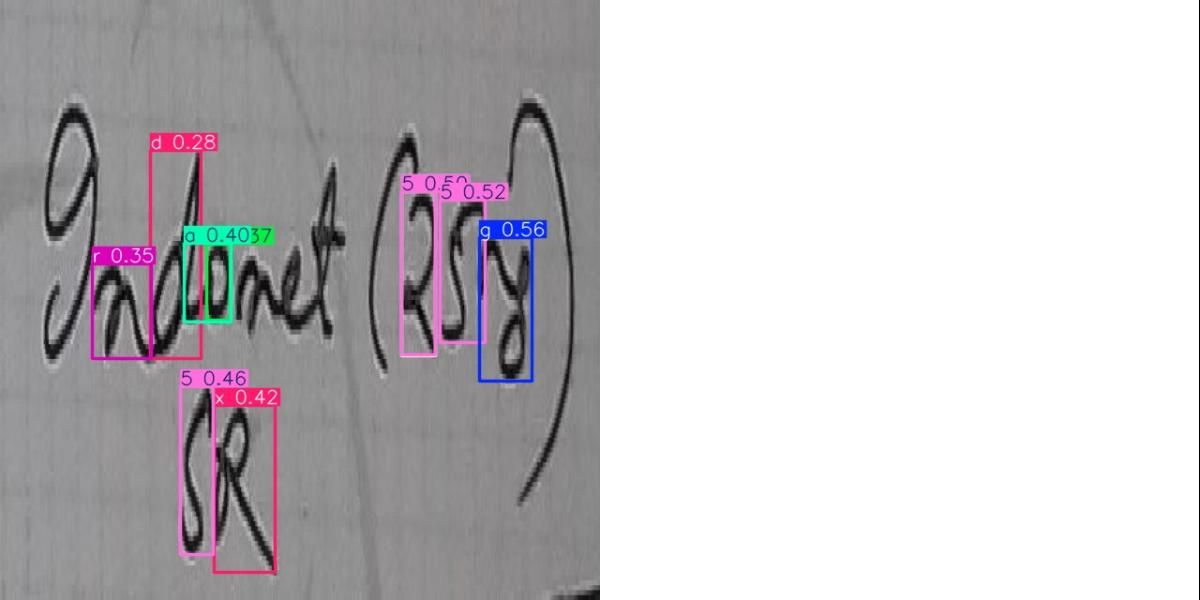

Saved result for result_291930445_3291494747752615_4492892172151207585_n-5-_jpg.rf.0bcaa21a12aa5184de494144216dfb8e.jpg as result_result_291930445_3291494747752615_4492892172151207585_n-5-_jpg.rf.0bcaa21a12aa5184de494144216dfb8e.jpg


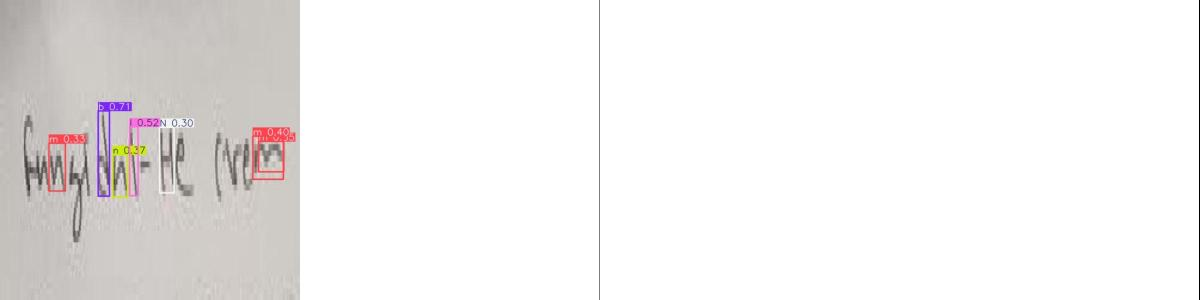

Saved result for 280119519_1343766579472393_2195751068597739040_n-4-_jpg.rf.a1661f905833e6c25e17f5d5a99de827.jpg as result_280119519_1343766579472393_2195751068597739040_n-4-_jpg.rf.a1661f905833e6c25e17f5d5a99de827.jpg


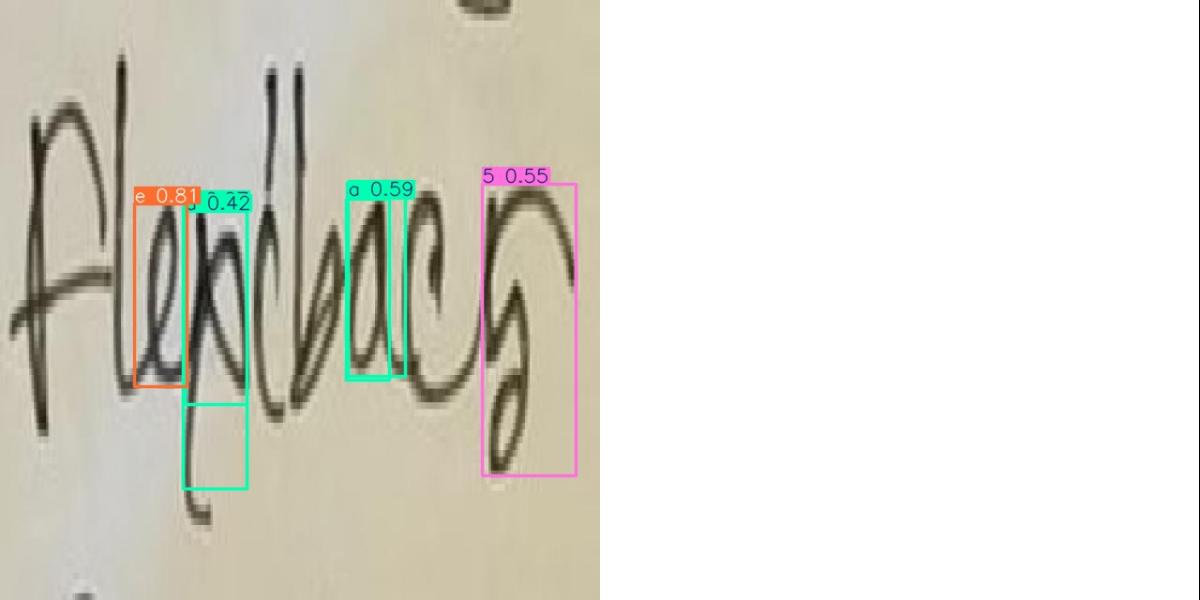

Saved result for 336945884_1220194682221211_1044591277932825485_n-4-_jpg.rf.8bcf341432213b5ace1c6ed9b52b889b.jpg as result_336945884_1220194682221211_1044591277932825485_n-4-_jpg.rf.8bcf341432213b5ace1c6ed9b52b889b.jpg


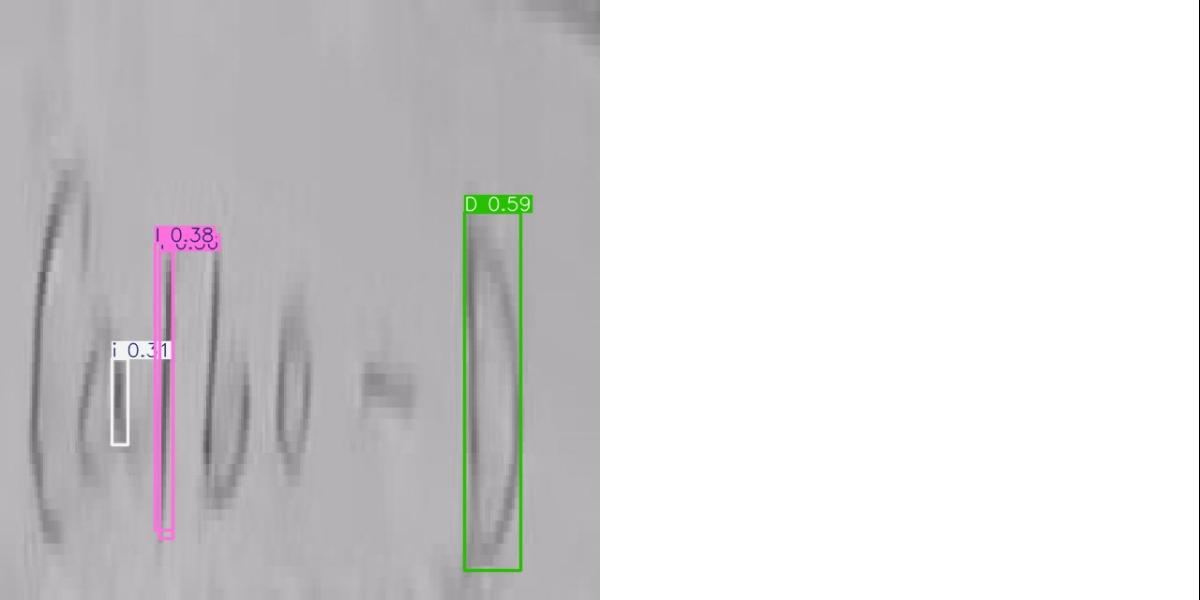

Saved result for 294413730_3303885469846876_4793232637706943219_n-3-_jpg.rf.025351c89f087ebaa1b6913d3f57918f.jpg as result_294413730_3303885469846876_4793232637706943219_n-3-_jpg.rf.025351c89f087ebaa1b6913d3f57918f.jpg


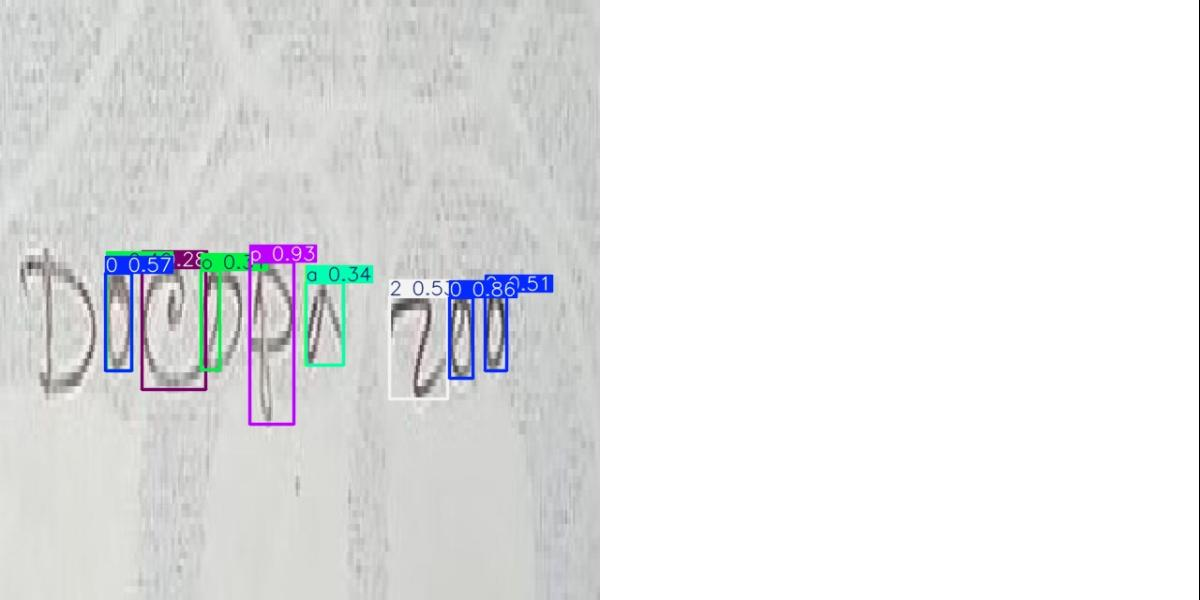

Saved result for 290945419_3291494881085935_1745412728668588753_n-3-_jpg.rf.2088f685db4ac5cdae20a921d63cd264.jpg as result_290945419_3291494881085935_1745412728668588753_n-3-_jpg.rf.2088f685db4ac5cdae20a921d63cd264.jpg


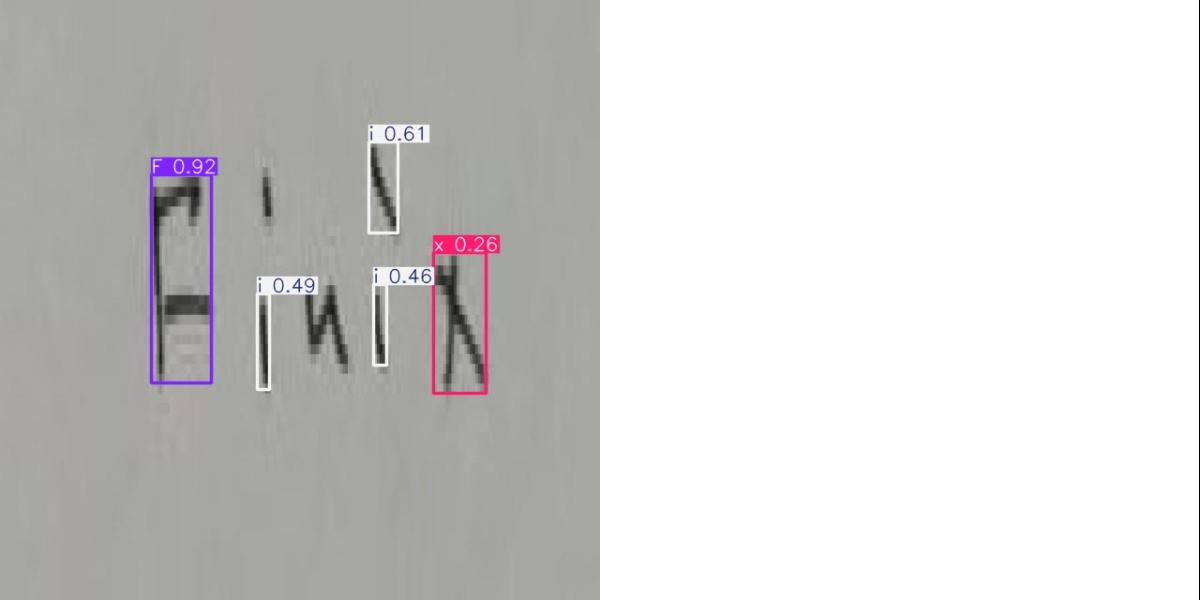

Saved result for result_338396026_576325830925951_5395258132265372565_n-3-_jpg.rf.b1baf16d6c76382843fcc0387e6f692e.jpg as result_result_338396026_576325830925951_5395258132265372565_n-3-_jpg.rf.b1baf16d6c76382843fcc0387e6f692e.jpg


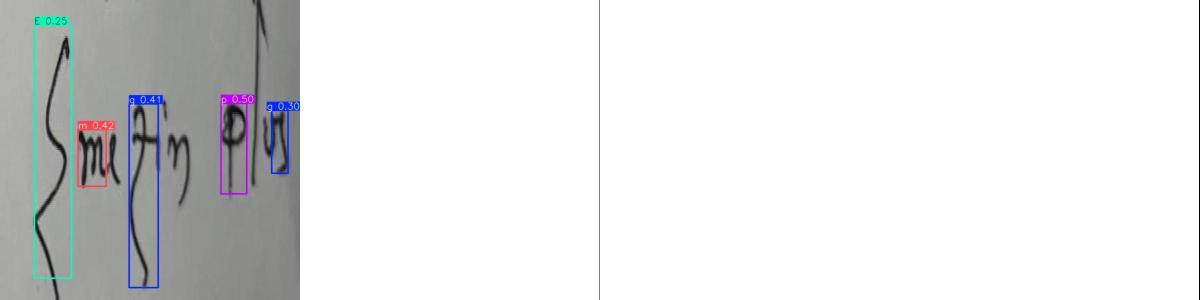

Saved result for 290749457_3291495041085919_4703804703928375461_n-2-_jpg.rf.24a8458ca8cac1d0c99ed1f6f4bc2418.jpg as result_290749457_3291495041085919_4703804703928375461_n-2-_jpg.rf.24a8458ca8cac1d0c99ed1f6f4bc2418.jpg


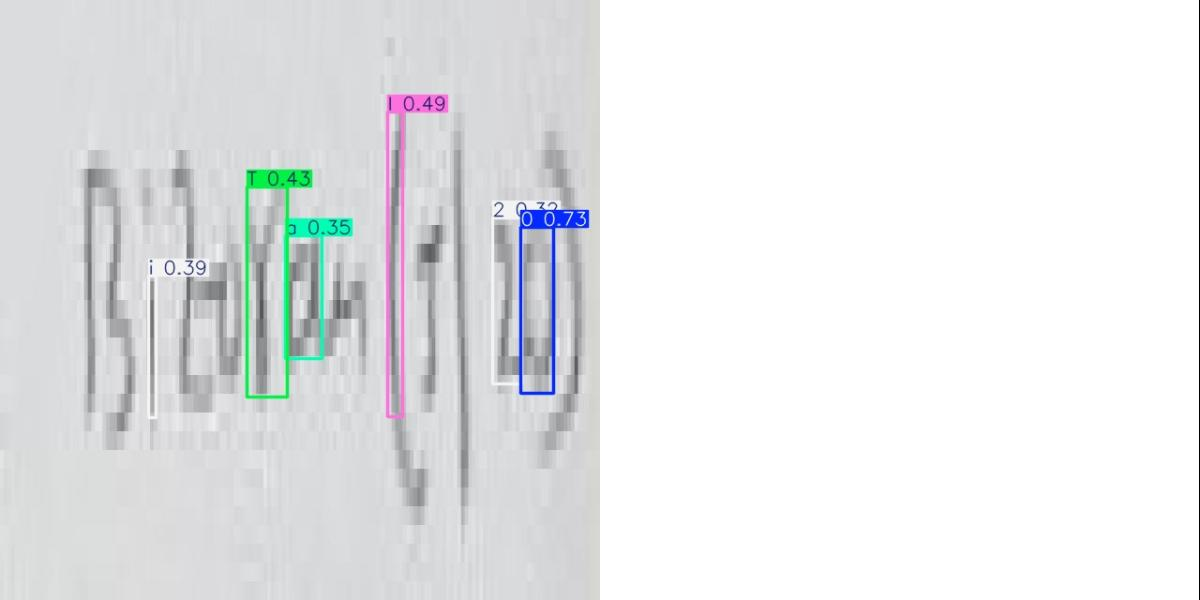

Saved result for result_336798535_184697054350202_6379440742421364684_n-2-_jpg.rf.f7656e439c5b8e62eb0d4b8e3c7e814e.jpg as result_result_336798535_184697054350202_6379440742421364684_n-2-_jpg.rf.f7656e439c5b8e62eb0d4b8e3c7e814e.jpg


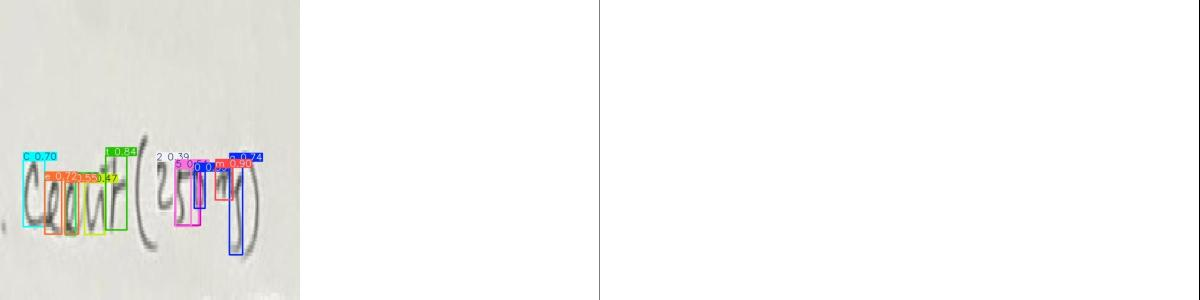

Saved result for 294624053_3303885279846895_4843588743980871721_n-6-_jpg.rf.e643b8fb42ab9d6d4a4bd01ed2a77a9a.jpg as result_294624053_3303885279846895_4843588743980871721_n-6-_jpg.rf.e643b8fb42ab9d6d4a4bd01ed2a77a9a.jpg


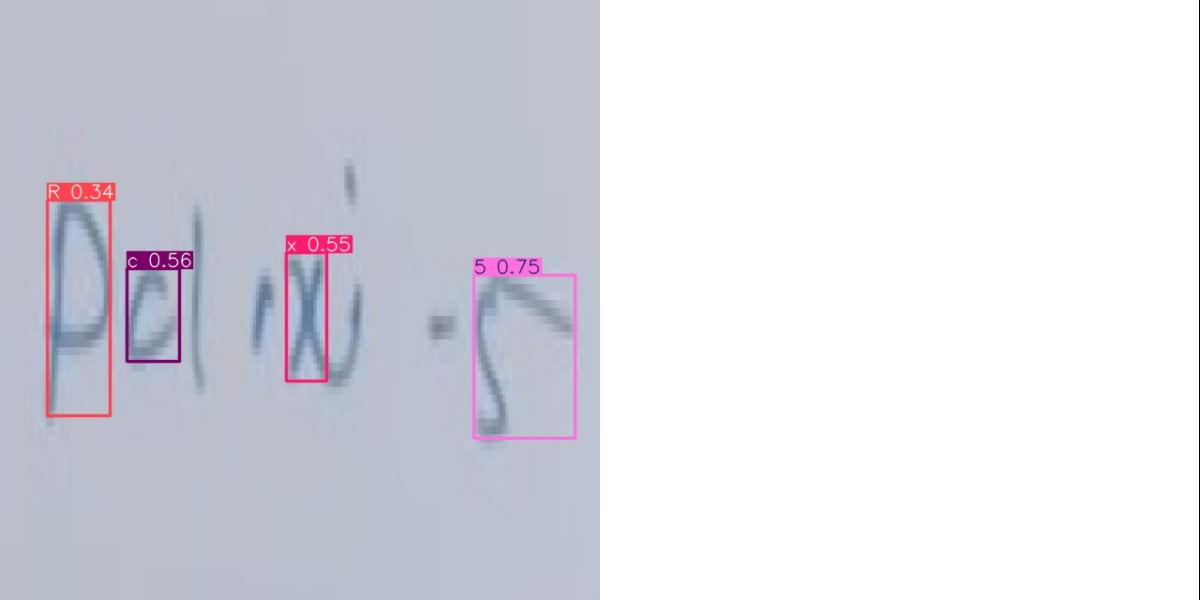

Saved result for result_337198228_761519635689554_4333244564276877836_n-2-_jpg.rf.65ae1cf15af06f73a2654e3a2cf61e63.jpg as result_result_337198228_761519635689554_4333244564276877836_n-2-_jpg.rf.65ae1cf15af06f73a2654e3a2cf61e63.jpg


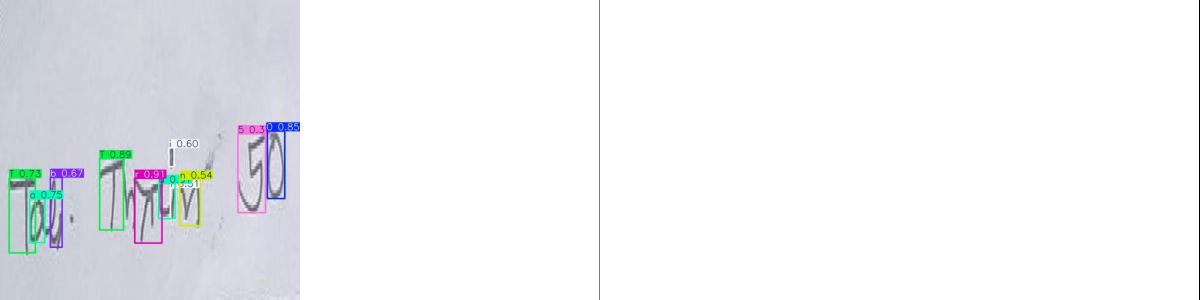

Saved result for 336777798_6640271502684283_5976461237597261744_n-9-_jpg.rf.c83febcdf3d1f56375e7ad2c4f42ae29.jpg as result_336777798_6640271502684283_5976461237597261744_n-9-_jpg.rf.c83febcdf3d1f56375e7ad2c4f42ae29.jpg


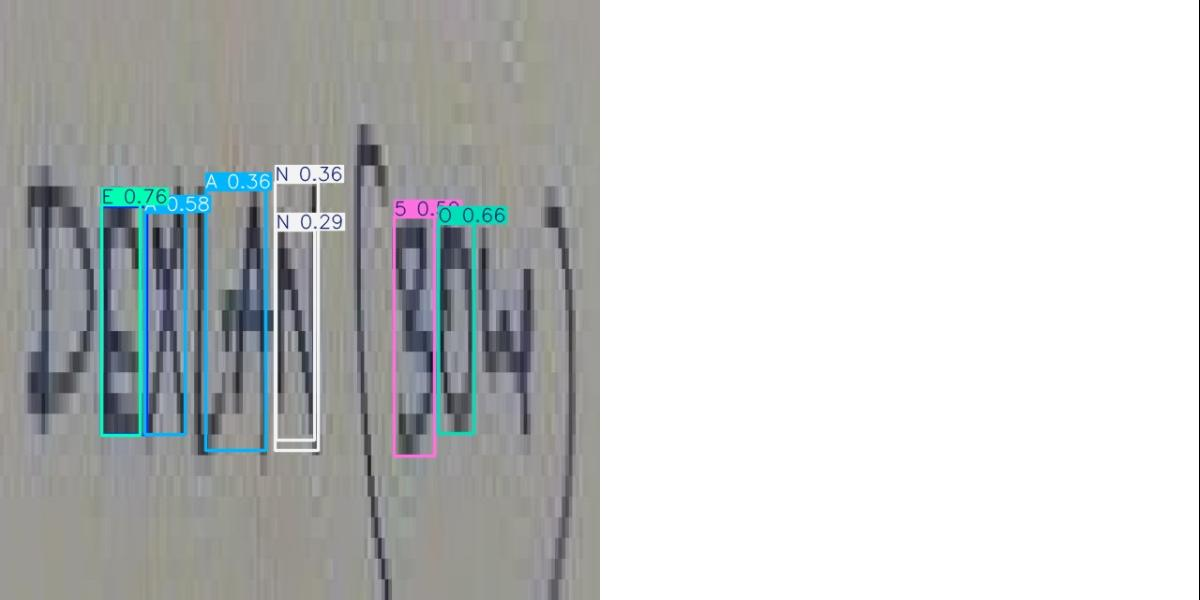

Saved result for result_20230314_201442-5-_jpg.rf.01e0e8cb82ade91a129cadf4b920a3c4.jpg as result_result_20230314_201442-5-_jpg.rf.01e0e8cb82ade91a129cadf4b920a3c4.jpg


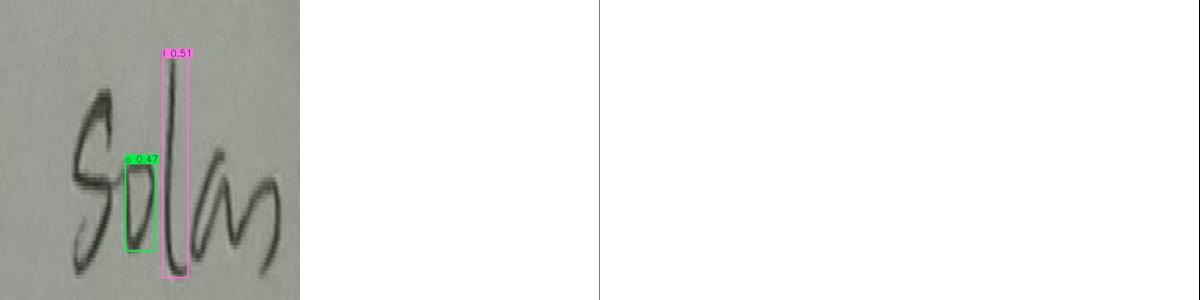

Saved result for 292021346_3291494787752611_7031030420345238571_n-4-_jpg.rf.ce842b201e88463a311d1ff1819038df.jpg as result_292021346_3291494787752611_7031030420345238571_n-4-_jpg.rf.ce842b201e88463a311d1ff1819038df.jpg


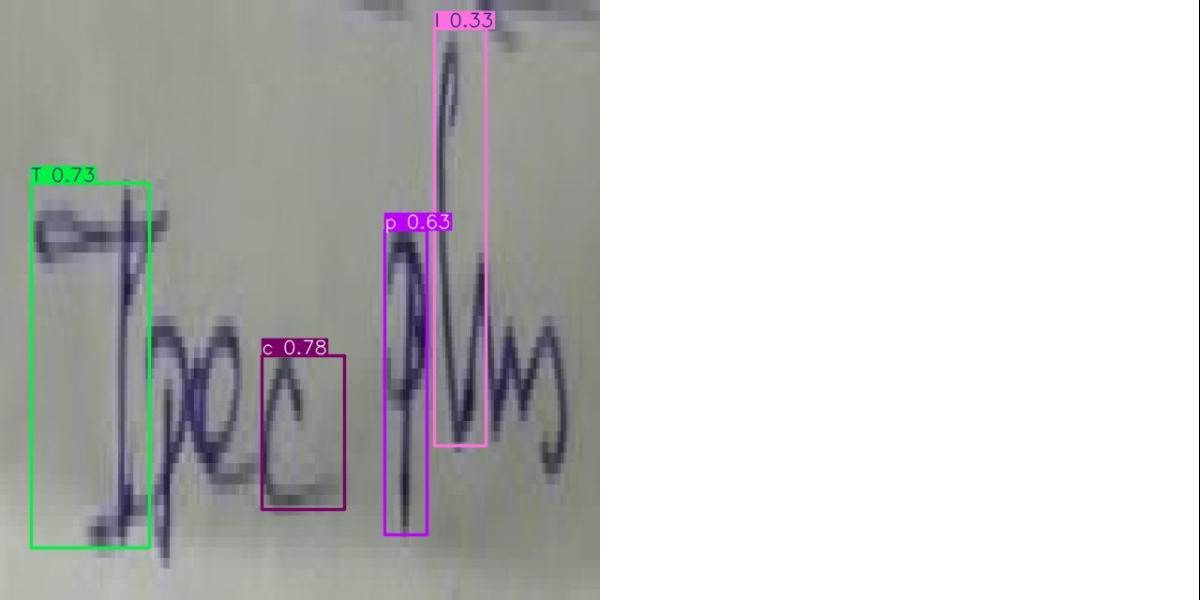

Saved result for 294102207_3303887066513383_6323161470553190259_n-2-_jpg.rf.b15fea714168d68122c15335bbcc14b4.jpg as result_294102207_3303887066513383_6323161470553190259_n-2-_jpg.rf.b15fea714168d68122c15335bbcc14b4.jpg


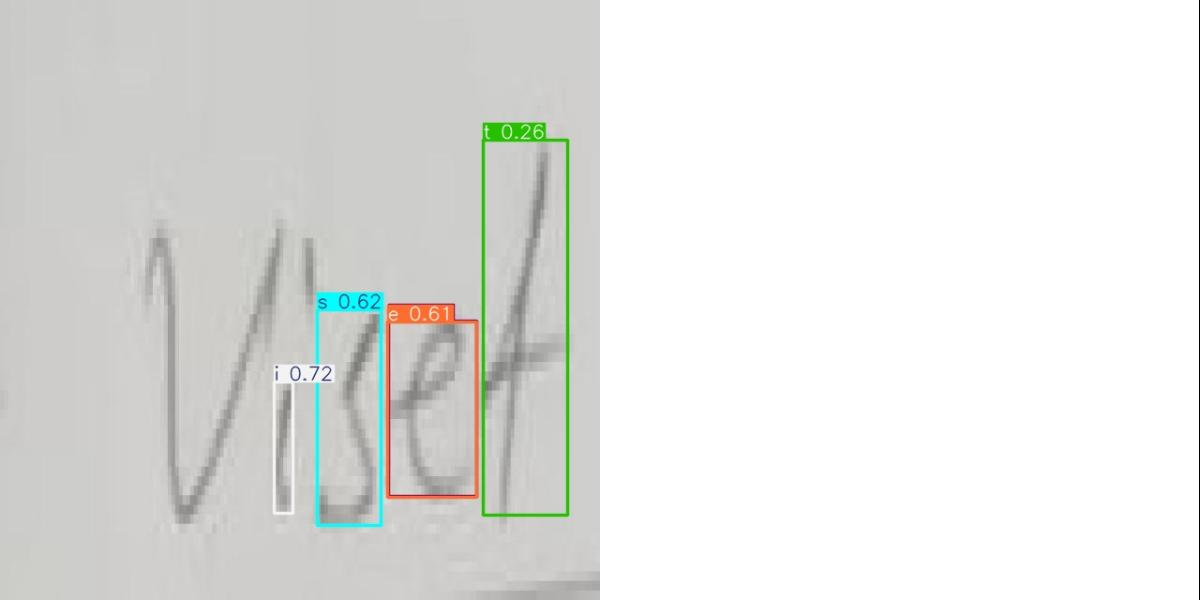

Saved result for 282149547_3255697671332323_5718310896827673305_n-3-_jpg.rf.d144a675d1122ce5aa2d6d6a96f81edf.jpg as result_282149547_3255697671332323_5718310896827673305_n-3-_jpg.rf.d144a675d1122ce5aa2d6d6a96f81edf.jpg


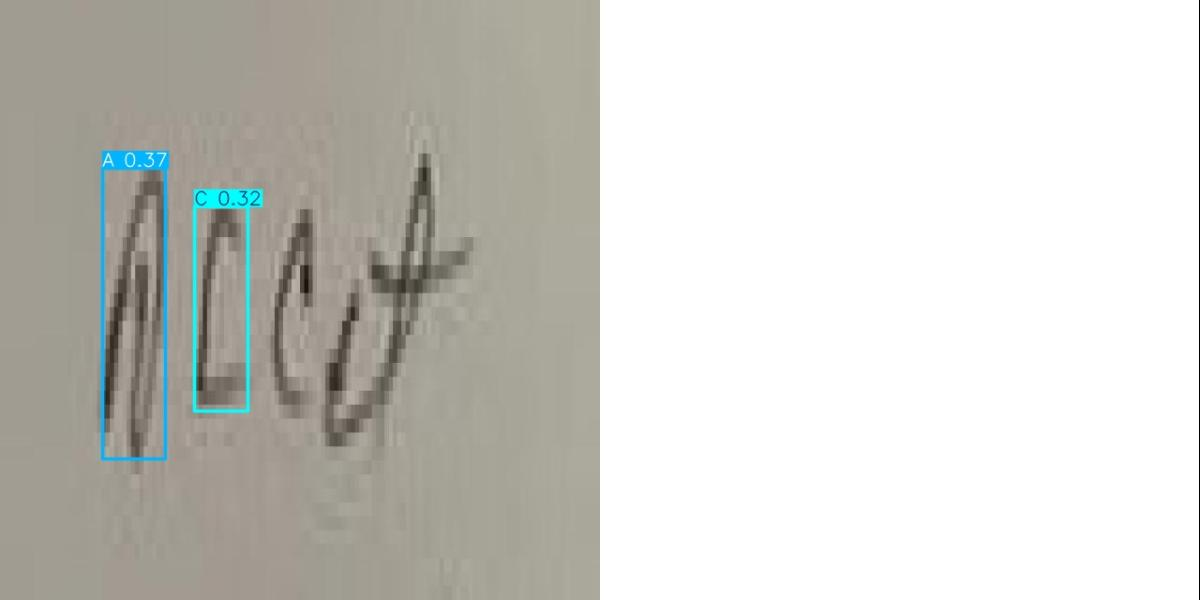

Saved result for result_336617298_743733530809455_1158936886485938123_n-2-_jpg.rf.7b4b8625e82379fb416cf316648bc14e.jpg as result_result_336617298_743733530809455_1158936886485938123_n-2-_jpg.rf.7b4b8625e82379fb416cf316648bc14e.jpg


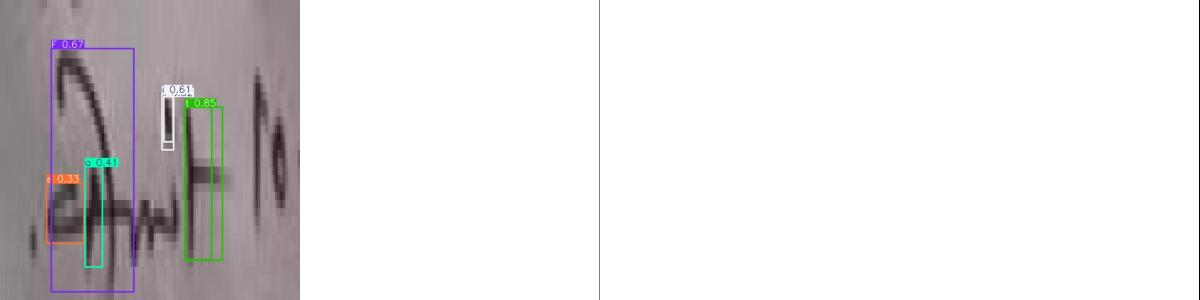

Saved result for result_338292852_773411784358746_4220674182585549160_n-2-_jpg.rf.41bb55f29313555aaacf8b743b811cc4.jpg as result_result_338292852_773411784358746_4220674182585549160_n-2-_jpg.rf.41bb55f29313555aaacf8b743b811cc4.jpg


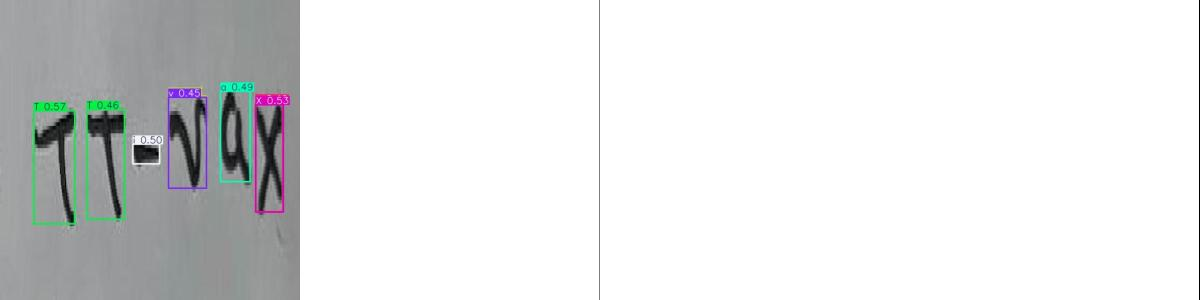

Saved result for result_338292852_773411784358746_4220674182585549160_n-4-_jpg.rf.e39578f3451eaa3373add9111fce45ba.jpg as result_result_338292852_773411784358746_4220674182585549160_n-4-_jpg.rf.e39578f3451eaa3373add9111fce45ba.jpg


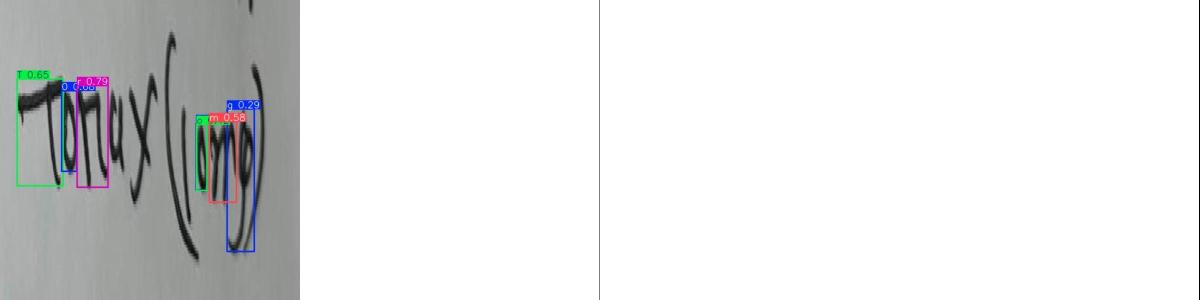

Saved result for 336624427_540415684845078_6169884838695696742_n-4-_jpg.rf.8f253a0b7c90ba4de5bac3893a73e410.jpg as result_336624427_540415684845078_6169884838695696742_n-4-_jpg.rf.8f253a0b7c90ba4de5bac3893a73e410.jpg


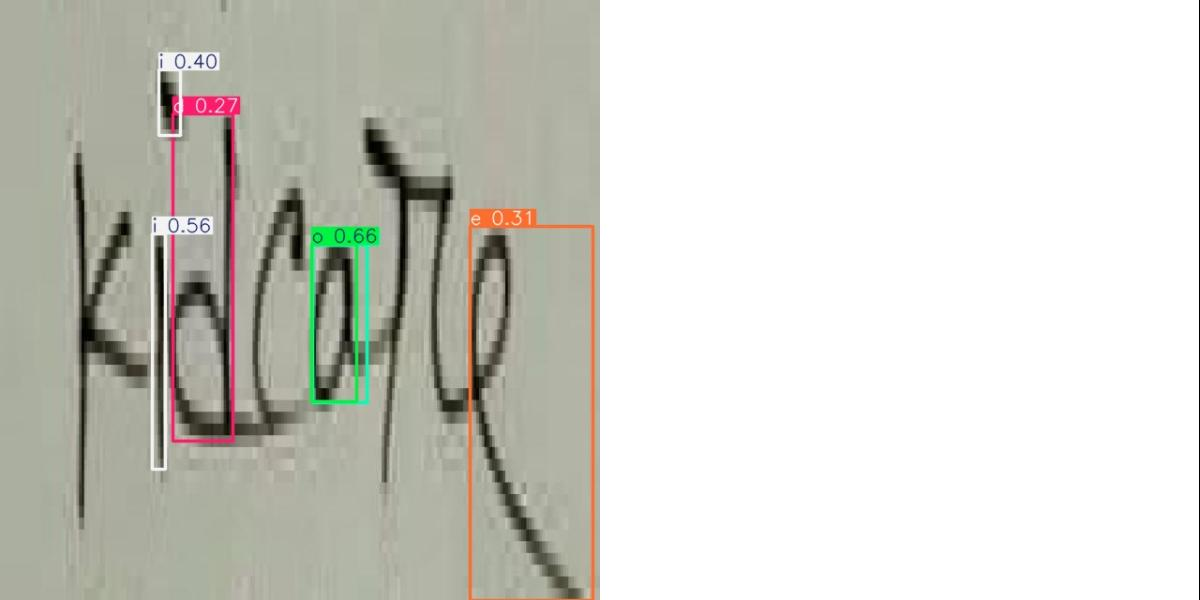

Saved result for WhatsApp-Image-2023-04-12-at-5-11-24-PM-3-_jpeg.rf.877edf6b6c84e5166d30ae18600fecf2.jpg as result_WhatsApp-Image-2023-04-12-at-5-11-24-PM-3-_jpeg.rf.877edf6b6c84e5166d30ae18600fecf2.jpg


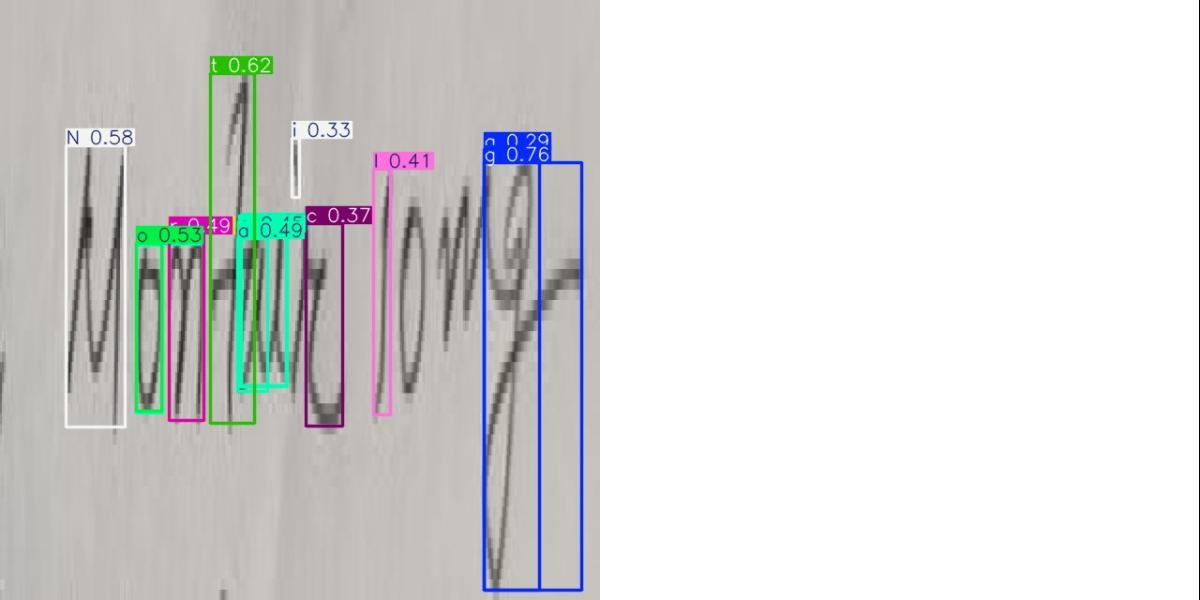

Saved result for result_292028471_3291495017752588_4424648733207410742_n-3-_jpg.rf.b261d9461c88d421ce11285bfee8b068.jpg as result_result_292028471_3291495017752588_4424648733207410742_n-3-_jpg.rf.b261d9461c88d421ce11285bfee8b068.jpg


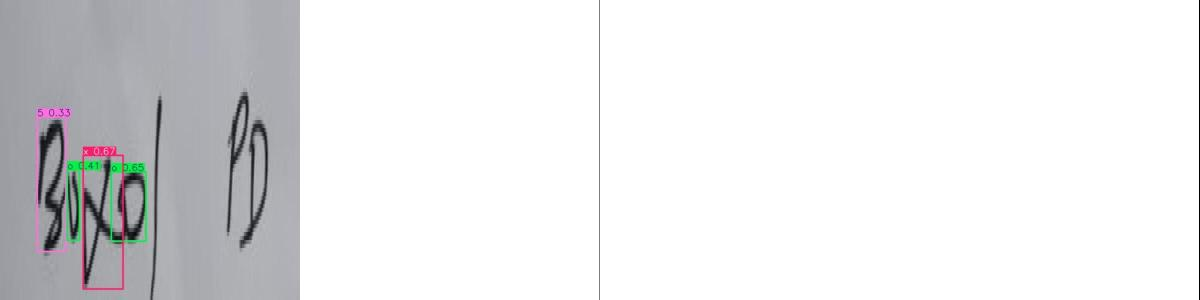

Saved result for result_336617298_743733530809455_1158936886485938123_n-3-_jpg.rf.409aeb973e10dad235aa284463363155.jpg as result_result_336617298_743733530809455_1158936886485938123_n-3-_jpg.rf.409aeb973e10dad235aa284463363155.jpg


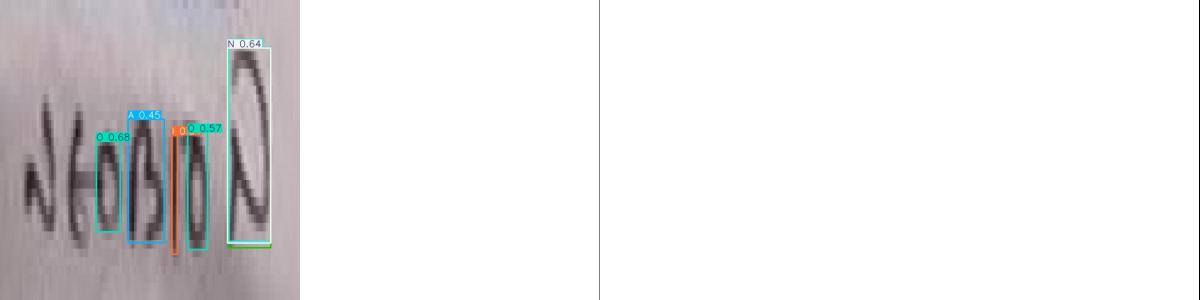

Saved result for 336666205_165423046001953_5589747433971270971_n-4-_jpg.rf.73065346600ebd2e4eb9d66cf03b1b81.jpg as result_336666205_165423046001953_5589747433971270971_n-4-_jpg.rf.73065346600ebd2e4eb9d66cf03b1b81.jpg


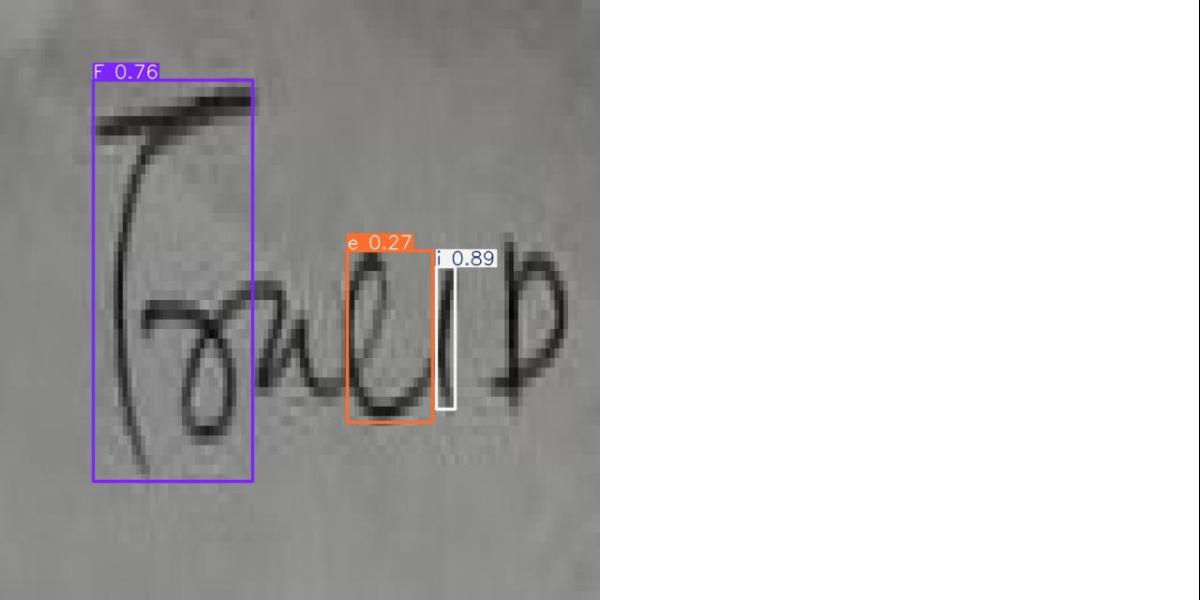

Saved result for result_338419745_232257936039644_4878129809961326059_n-3-_jpg.rf.2b5b3dbfacf934699d6495febba85818.jpg as result_result_338419745_232257936039644_4878129809961326059_n-3-_jpg.rf.2b5b3dbfacf934699d6495febba85818.jpg


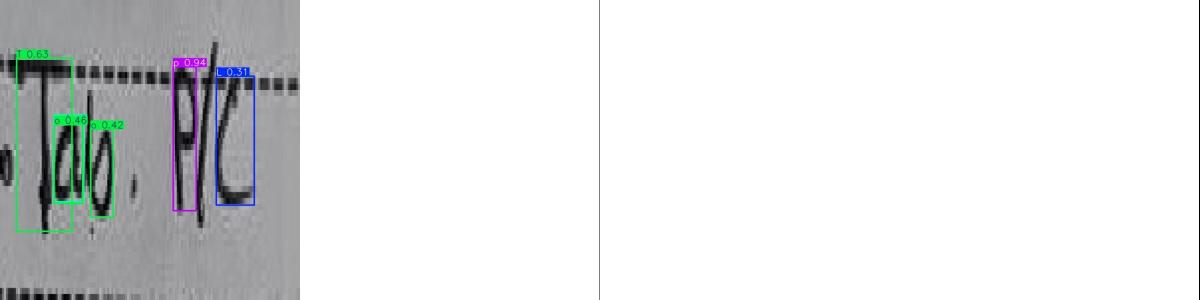

Saved result for result_334687951_127953783576835_9155742681542625913_n-2-_jpg.rf.e67337ac56057e136e203c0de7d60566.jpg as result_result_334687951_127953783576835_9155742681542625913_n-2-_jpg.rf.e67337ac56057e136e203c0de7d60566.jpg


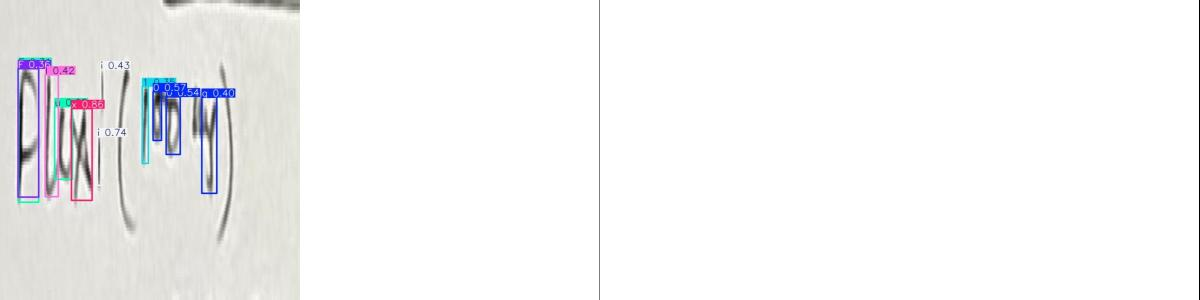

Saved result for result_WhatsApp-Image-2023-04-12-at-12-23-40-PM-3-_jpeg.rf.3accc74e55f2816762bcc5abd2acc0a3.jpg as result_result_WhatsApp-Image-2023-04-12-at-12-23-40-PM-3-_jpeg.rf.3accc74e55f2816762bcc5abd2acc0a3.jpg


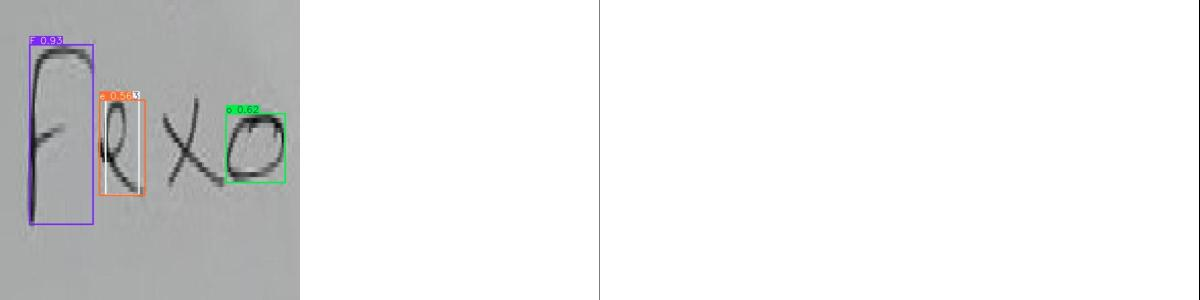

Saved result for 292028471_3291495017752588_4424648733207410742_n-3-_jpg.rf.b261d9461c88d421ce11285bfee8b068.jpg as result_292028471_3291495017752588_4424648733207410742_n-3-_jpg.rf.b261d9461c88d421ce11285bfee8b068.jpg


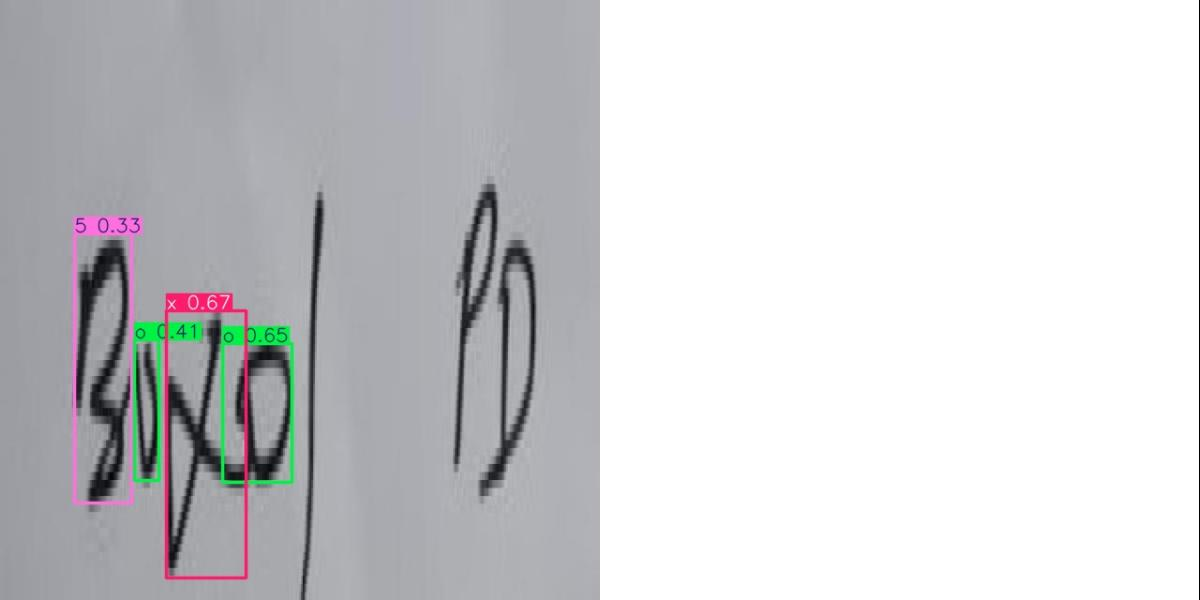

Saved result for WhatsApp-Image-2023-04-12-at-4-19-08-PM-5-_jpeg.rf.546a38b7217ffc13e5b84b918e2e49f0.jpg as result_WhatsApp-Image-2023-04-12-at-4-19-08-PM-5-_jpeg.rf.546a38b7217ffc13e5b84b918e2e49f0.jpg


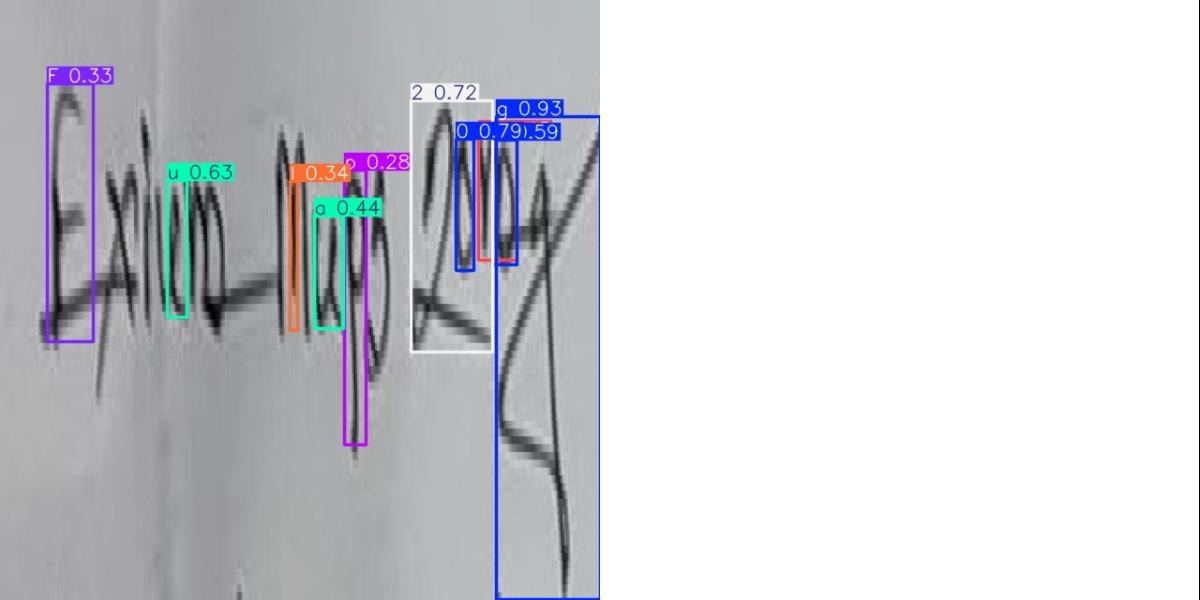

Saved result for 334572247_598284052354214_3777191584590917594_n-5-_jpg.rf.606fc421563cdfa5f57e0b65b49104e4.jpg as result_334572247_598284052354214_3777191584590917594_n-5-_jpg.rf.606fc421563cdfa5f57e0b65b49104e4.jpg


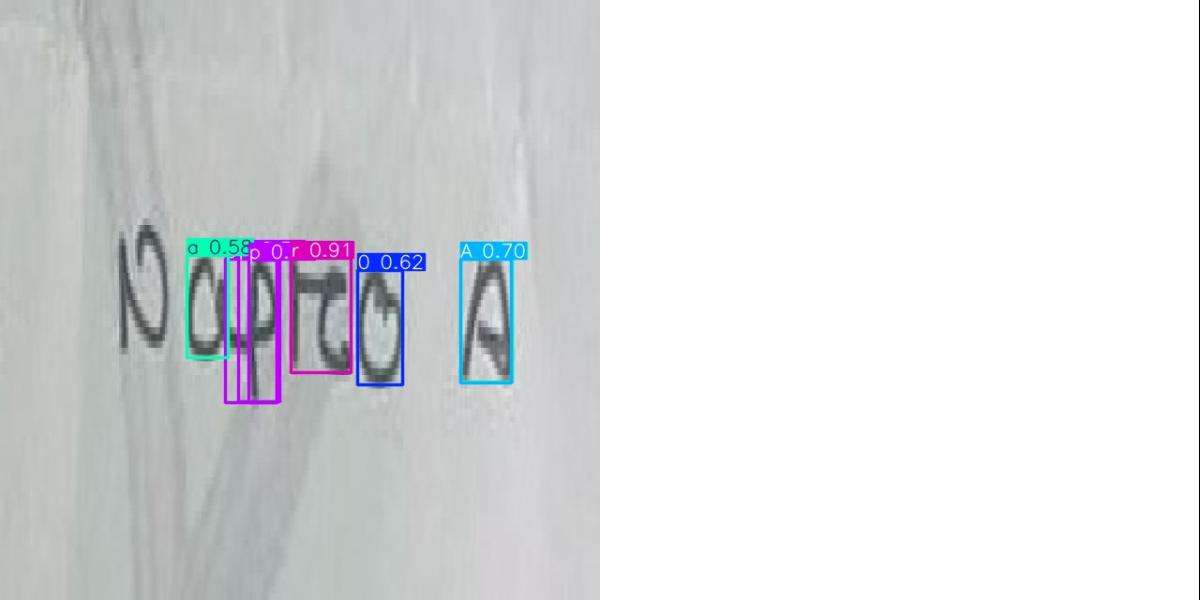

Saved result for 20230314_201442-5-_jpg.rf.01e0e8cb82ade91a129cadf4b920a3c4.jpg as result_20230314_201442-5-_jpg.rf.01e0e8cb82ade91a129cadf4b920a3c4.jpg


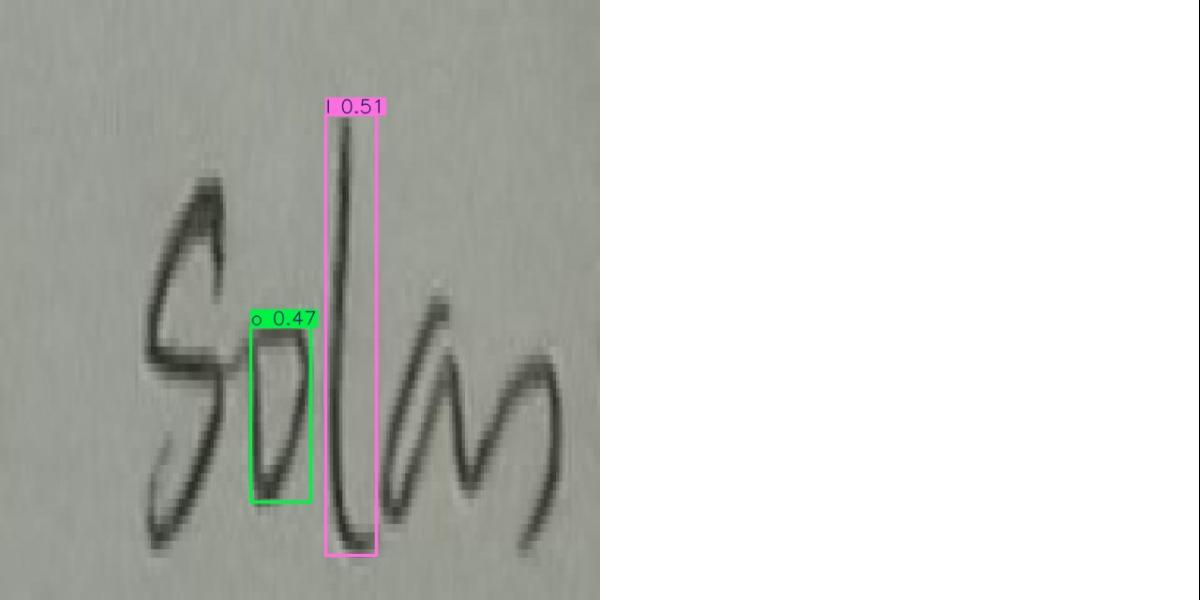

Saved result for result_336945884_1220194682221211_1044591277932825485_n-4-_jpg.rf.8bcf341432213b5ace1c6ed9b52b889b.jpg as result_result_336945884_1220194682221211_1044591277932825485_n-4-_jpg.rf.8bcf341432213b5ace1c6ed9b52b889b.jpg


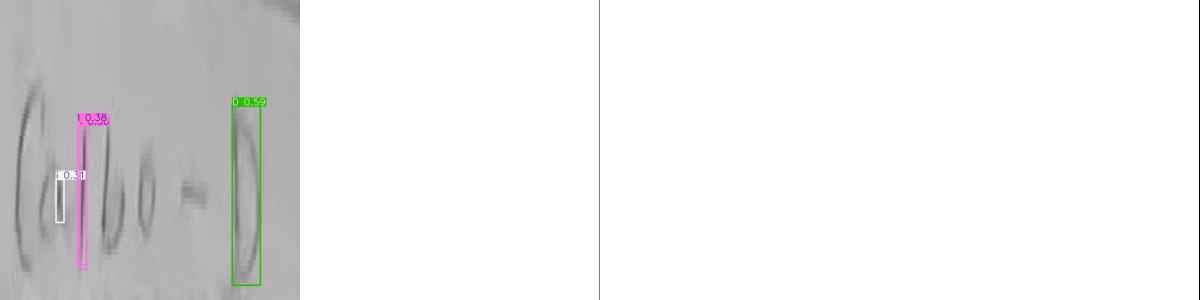

Saved result for result_294933413_3303886999846723_7979518029713183681_n-2-_jpg.rf.5eedb3cb027b257f6d510ba362ba532a.jpg as result_result_294933413_3303886999846723_7979518029713183681_n-2-_jpg.rf.5eedb3cb027b257f6d510ba362ba532a.jpg


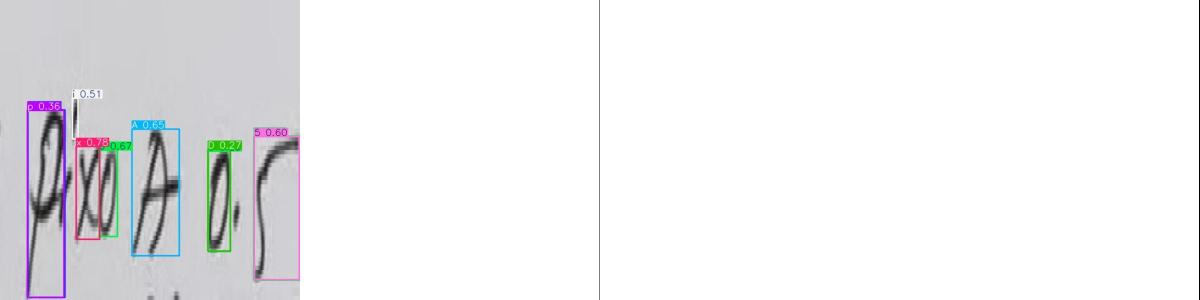

Saved result for 334687951_127953783576835_9155742681542625913_n-2-_jpg.rf.e67337ac56057e136e203c0de7d60566.jpg as result_334687951_127953783576835_9155742681542625913_n-2-_jpg.rf.e67337ac56057e136e203c0de7d60566.jpg


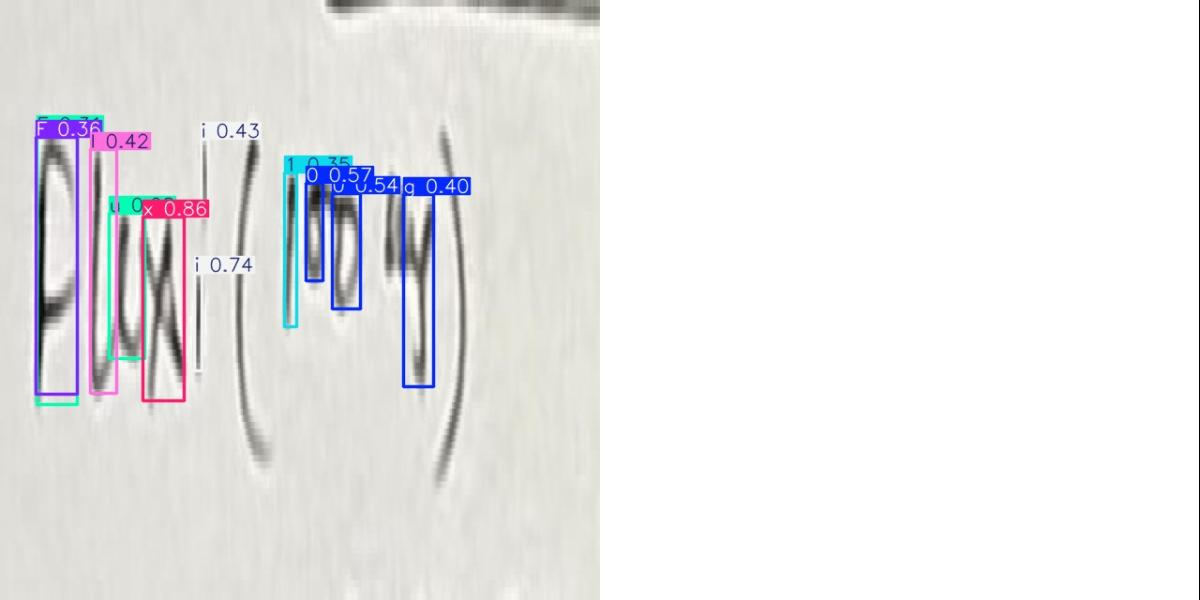

Saved result for result_334572247_598284052354214_3777191584590917594_n-5-_jpg.rf.606fc421563cdfa5f57e0b65b49104e4.jpg as result_result_334572247_598284052354214_3777191584590917594_n-5-_jpg.rf.606fc421563cdfa5f57e0b65b49104e4.jpg


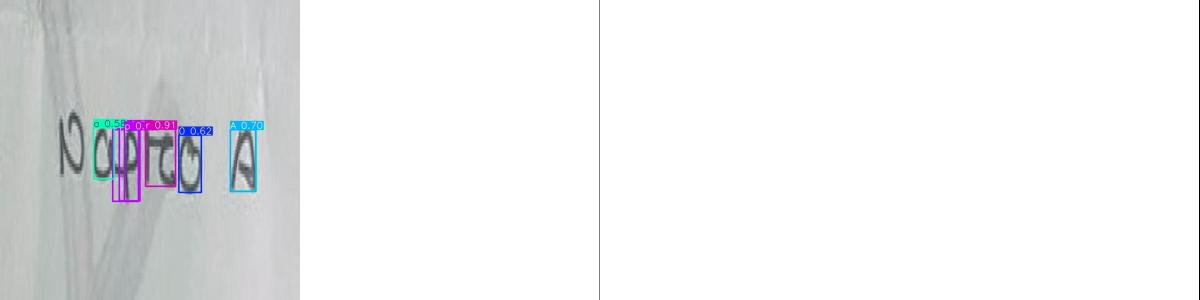

Saved result for result_337641997_1548338229025404_4622143931103678237_n-4-_jpg.rf.2e6e975bea650e4c3452177542bebd24.jpg as result_result_337641997_1548338229025404_4622143931103678237_n-4-_jpg.rf.2e6e975bea650e4c3452177542bebd24.jpg


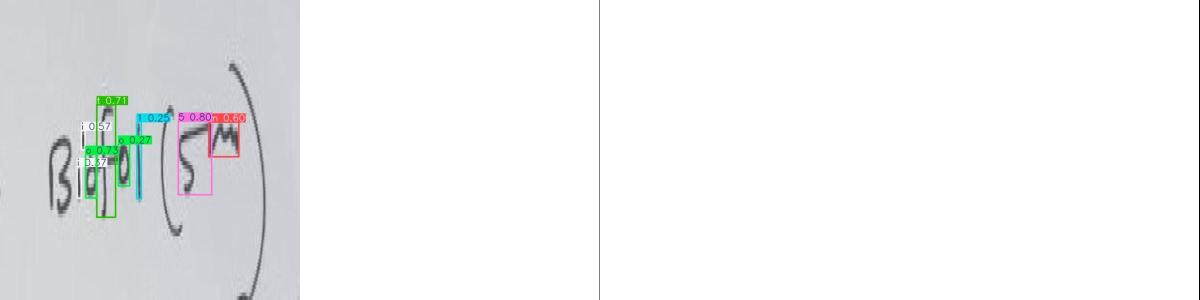

Saved result for result_336650112_741839600966025_1583784774976665785_n-4-_jpg.rf.e6738472e336ebc50159ab51710042b7.jpg as result_result_336650112_741839600966025_1583784774976665785_n-4-_jpg.rf.e6738472e336ebc50159ab51710042b7.jpg


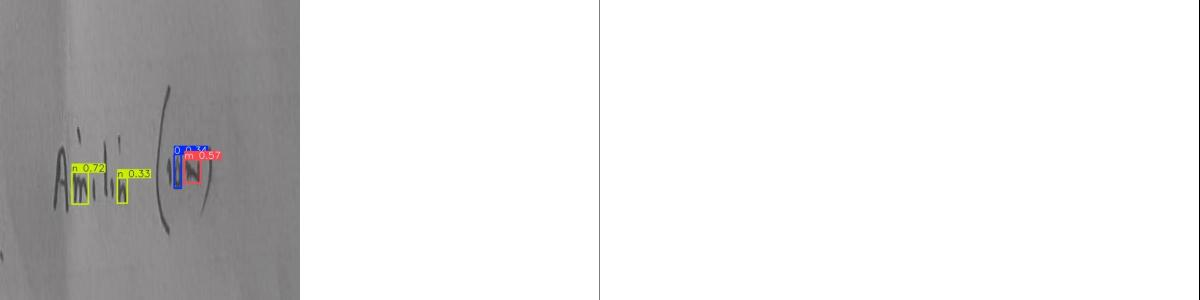

Saved result for 280119519_1343766579472393_2195751068597739040_n-3-_jpg.rf.0de2956026b338ebb5bfa61edebcefbf.jpg as result_280119519_1343766579472393_2195751068597739040_n-3-_jpg.rf.0de2956026b338ebb5bfa61edebcefbf.jpg


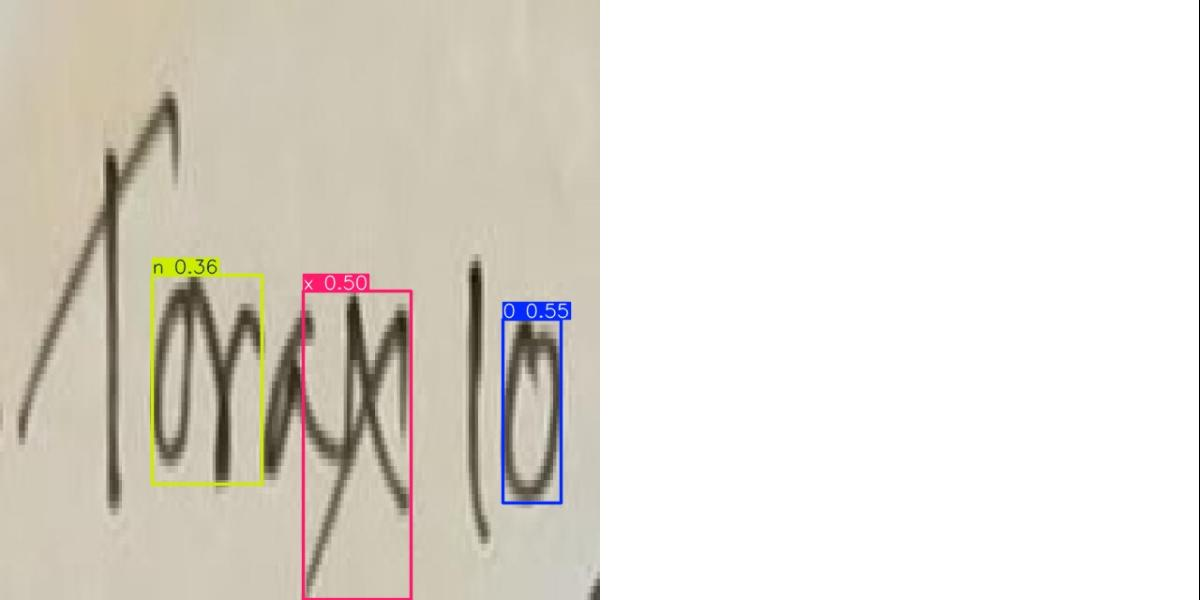

Saved result for result_294413730_3303885469846876_4793232637706943219_n-3-_jpg.rf.025351c89f087ebaa1b6913d3f57918f.jpg as result_result_294413730_3303885469846876_4793232637706943219_n-3-_jpg.rf.025351c89f087ebaa1b6913d3f57918f.jpg


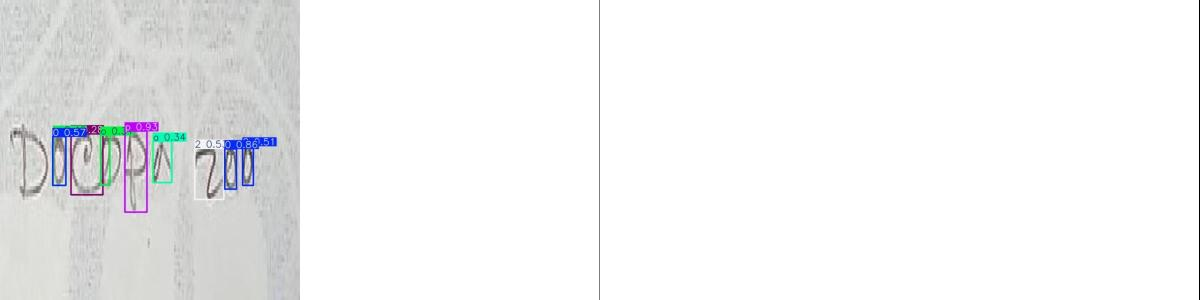

Saved result for 293981501_3303887199846703_6068089133062694014_n-3-_jpg.rf.b4865f77ef35bf3e7da20ce001c17c9e.jpg as result_293981501_3303887199846703_6068089133062694014_n-3-_jpg.rf.b4865f77ef35bf3e7da20ce001c17c9e.jpg


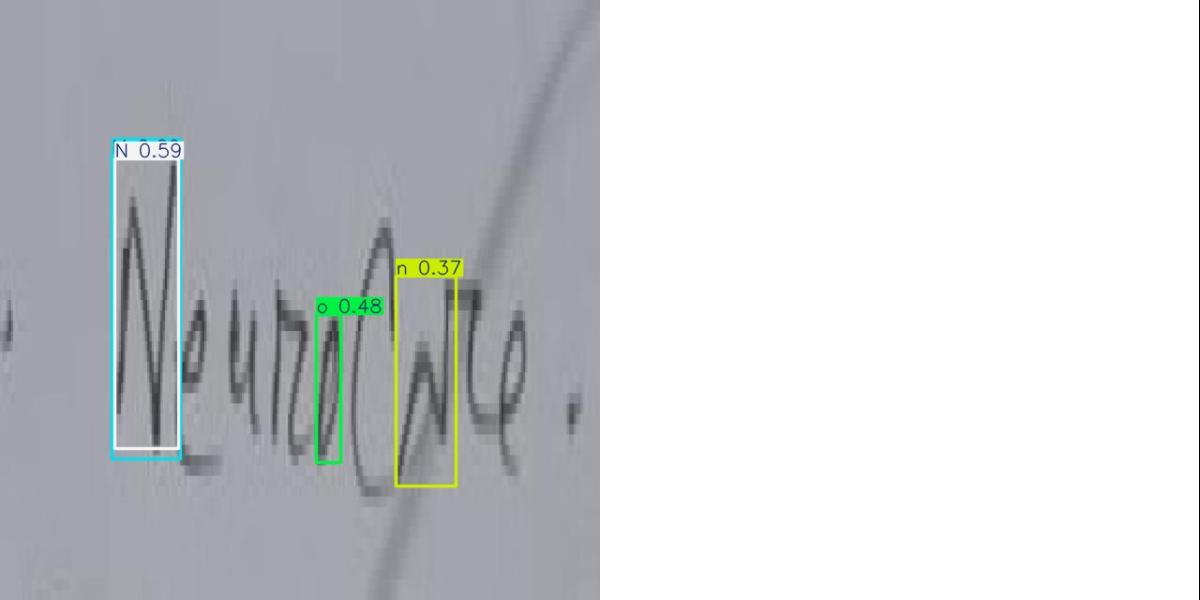

Saved result for result_20230314_201612-4-_jpg.rf.a45d0c9c55660917301533d51541411b.jpg as result_result_20230314_201612-4-_jpg.rf.a45d0c9c55660917301533d51541411b.jpg


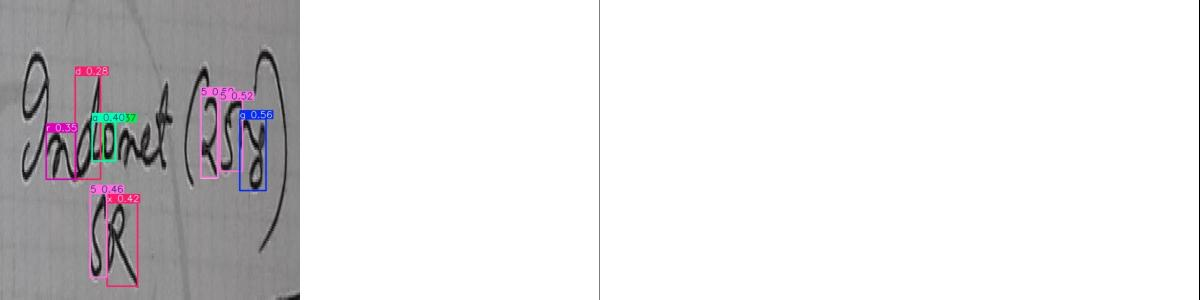

Saved result for WhatsApp-Image-2023-04-12-at-12-46-13-AM-2-_jpeg.rf.26c0508075df7ef8a3b19c5f0785e107.jpg as result_WhatsApp-Image-2023-04-12-at-12-46-13-AM-2-_jpeg.rf.26c0508075df7ef8a3b19c5f0785e107.jpg


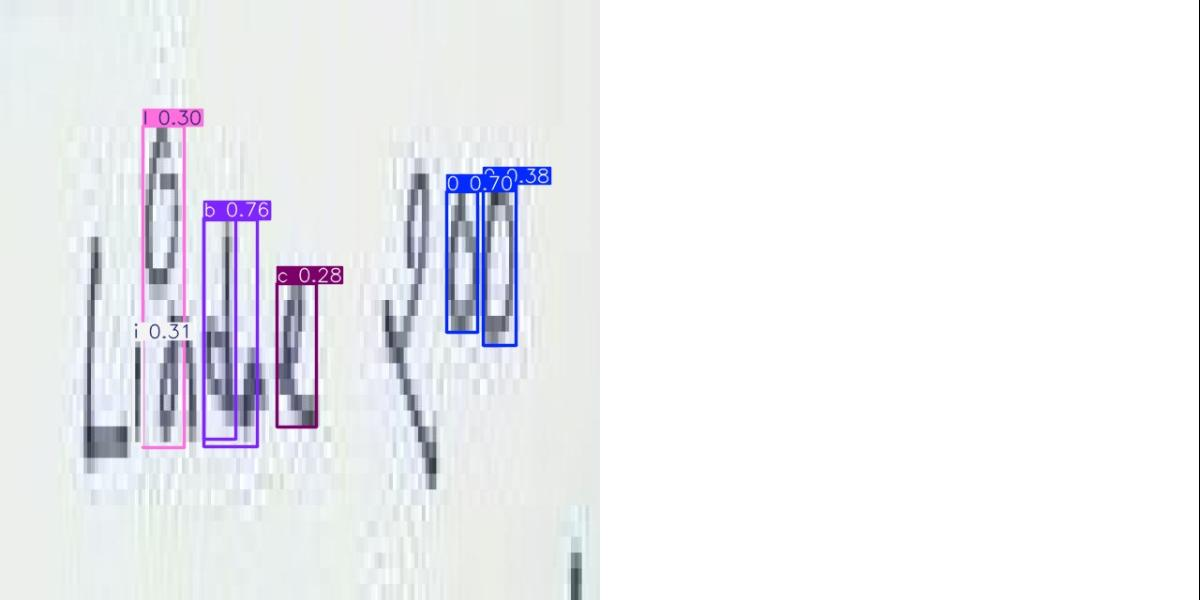

Saved result for 336620218_1890914087923335_8720012510105860918_n-5-_jpg.rf.75902b9a9dfabe0512ae041f8ce74452.jpg as result_336620218_1890914087923335_8720012510105860918_n-5-_jpg.rf.75902b9a9dfabe0512ae041f8ce74452.jpg


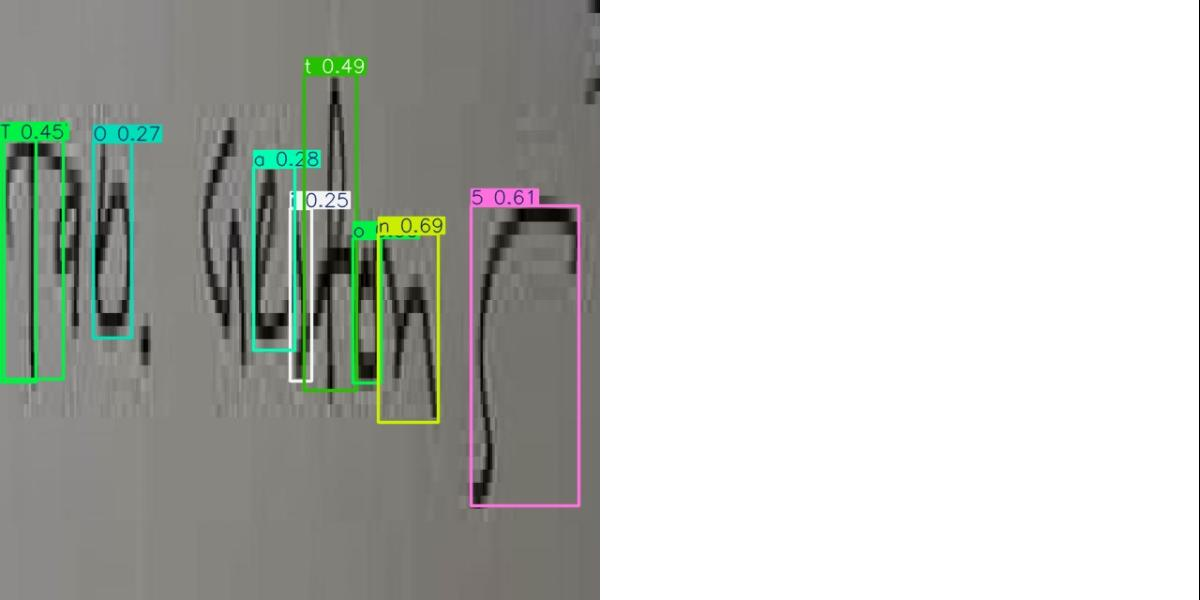

Saved result for 338292852_773411784358746_4220674182585549160_n-4-_jpg.rf.e39578f3451eaa3373add9111fce45ba.jpg as result_338292852_773411784358746_4220674182585549160_n-4-_jpg.rf.e39578f3451eaa3373add9111fce45ba.jpg


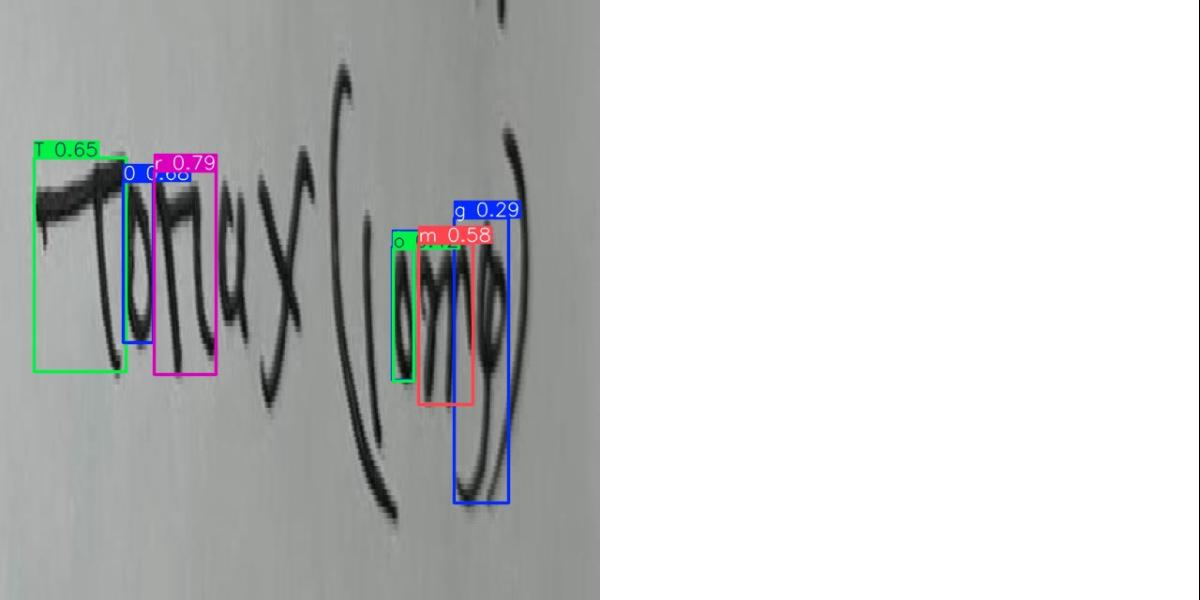

Saved result for result_336622886_3127739944191472_2809415070733729144_n-3-_jpg.rf.335b5a443153a25c8d40825b75fd0d06.jpg as result_result_336622886_3127739944191472_2809415070733729144_n-3-_jpg.rf.335b5a443153a25c8d40825b75fd0d06.jpg


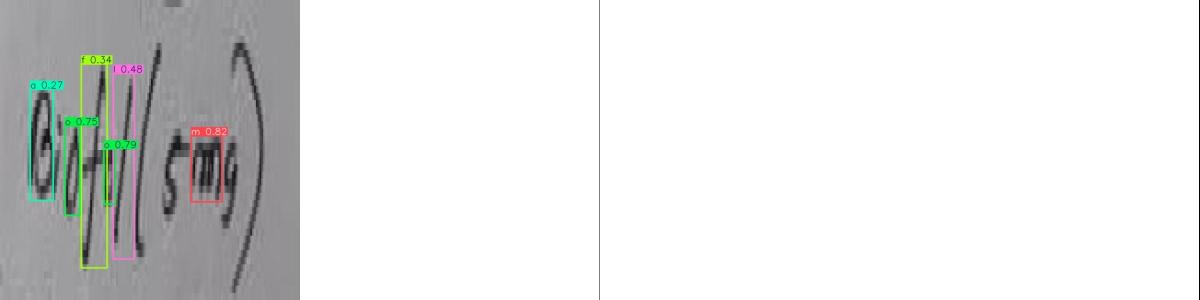

Saved result for result_336623473_888704692356367_3941721347640718296_n-3-_jpg.rf.f72f953f06aa6af2d5e92541da0f61bc.jpg as result_result_336623473_888704692356367_3941721347640718296_n-3-_jpg.rf.f72f953f06aa6af2d5e92541da0f61bc.jpg


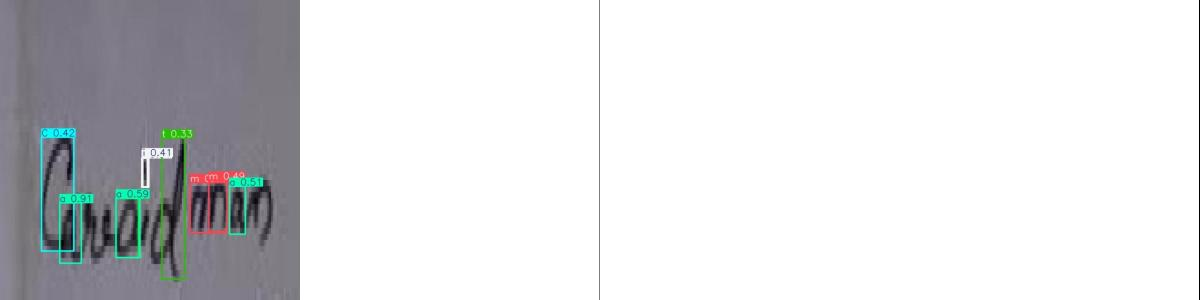

Saved result for result_282149547_3255697671332323_5718310896827673305_n-3-_jpg.rf.d144a675d1122ce5aa2d6d6a96f81edf.jpg as result_result_282149547_3255697671332323_5718310896827673305_n-3-_jpg.rf.d144a675d1122ce5aa2d6d6a96f81edf.jpg


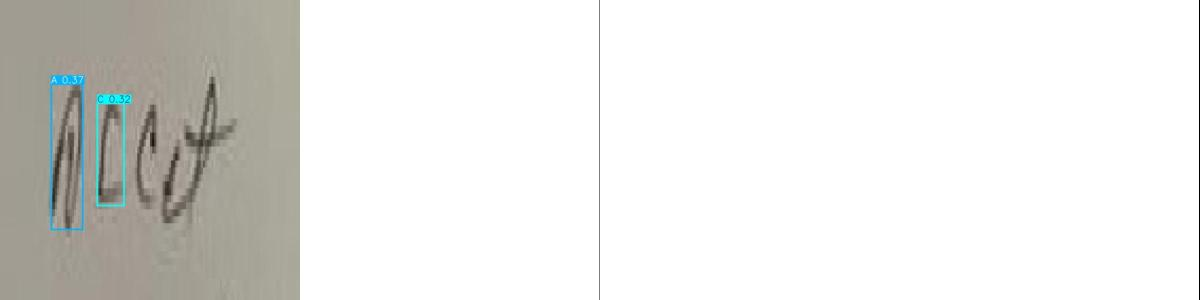

Saved result for 337198228_761519635689554_4333244564276877836_n-2-_jpg.rf.65ae1cf15af06f73a2654e3a2cf61e63.jpg as result_337198228_761519635689554_4333244564276877836_n-2-_jpg.rf.65ae1cf15af06f73a2654e3a2cf61e63.jpg


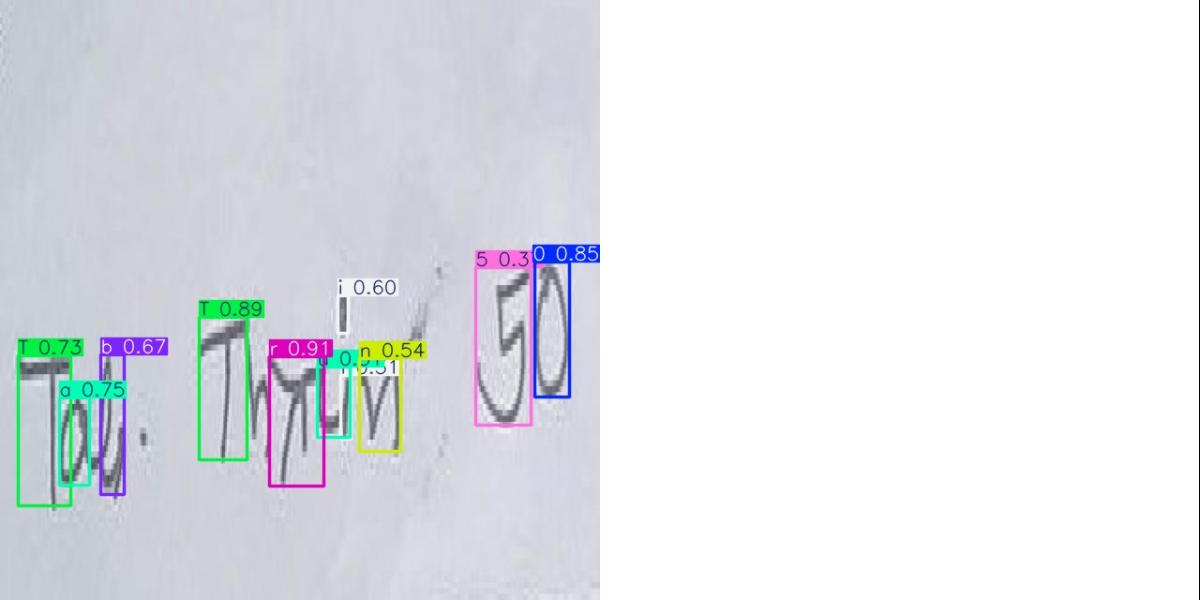

In [14]:
from IPython.display import display, Image as IPythonImage
import os
from PIL import Image, ImageDraw, ImageFont
import cv2

# Define the directory containing the images
folder_path = "/content/runs/detect/predict8"

# Iterate over each file in the directory
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Construct the full path to the image
        img_path = os.path.join(folder_path, filename)

        # Open the image using OpenCV
        img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)

        # Convert the OpenCV image to PIL format
        image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

        # Check if 'result' is empty or not
        if not result:
            print(f"Error: 'result' list is empty for image {filename}")
        else:
            # Extract OCR results
            boxes = [line[0] for line in result]
            txts = [line[1][0] if len(line) > 1 else "" for line in result]
            scores = [line[1][1] if len(line) > 1 and isinstance(line[1][1], float) else 0 for line in result]

            # Use a default font
            font = ImageFont.load_default()

            # Assuming 'draw_ocr' function draws the OCR results on the image
            im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor.ttf')

            # Convert the NumPy array back to a PIL Image object
            im_show_pil = Image.fromarray(im_show)

            # Save the result image with a filename based on the original image
            result_filename = f"result_{filename}"
            result_path = os.path.join(folder_path, result_filename)
            im_show_pil.save(result_path)
            print(f"Saved result for {filename} as {result_filename}")

            # Display the result image
            display(IPythonImage(filename=result_path))
